In [1]:
import numpy as np
import updated_library as gbc

import seaborn as sns
sns.set()
#sns.set_style("whitegrid", {'axes.grid' : False})


import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [2]:
# file paths

bumps_family = "../newdat/bumps_by_r/"

wall_family = "../newdat/bumps_by_h/"

wall_family_W = "../newdat/bumps_by_w/"

wall_over_bumps = "../newdat/wall_over_bumps/"

semicirc_family = "../newdat/semicircles/"

semicirc_focus_family = "../newdat/semicircles_focus/"

paper_family = "../newdat/two_competing_curves/"

three_bumps_family = "../newdat/three_bumps/"

bumps_with_flat = "../newdat/bumps_with_flat/"

In [3]:
# observables
sph_obs = lambda x: 2*x - np.pi
cha_obs = lambda x, rad, cut: np.clip(a=2*rad/np.tan(x), a_min=-cut, a_max=cut)
#cha_obs = lambda x, rad, cut: cut if 2*rad/np.tan(x)>cut else (-cut if 2*rad/np.tan(x)<-cut else 2*rad/np.tan(x)>cut)
c_ = 5*(10**4)
#c_ = 5
knudsen_channel = gbc.channel_var(c_, 1/2)

img_path_ = "../../AllWriteUps/Thesis/imgs/"

# Three Bumps

In [4]:
#---first values---#
P_stacks = np.load(three_bumps_family + "p_mats.npy", allow_pickle=False)
params = np.load(three_bumps_family + "keys.npy", allow_pickle=False)
theta_partition = np.load(three_bumps_family + "theta_partition.npy", allow_pickle=False)

In [5]:
radius_list = params[:,0]

In [6]:
svar_vals_, cvar_vals_, spectral_gap_ = [], [], []
for P in P_stacks:
    # compute the variance
    svar_ = gbc.var_from_P(P_=P, angle_bins_=theta_partition, observable_f=sph_obs)
    cvar_ = gbc.var_from_P(P_=P, angle_bins_=theta_partition,
                           observable_f=lambda x: cha_obs(x, cut=c_, rad=1/2))
    # compute the spectral gap
    spectrum = np.sort(np.real(np.linalg.eigvals(P)))
    second_eig = spectrum[-2]

    # write to inner array
    svar_vals_.append(svar_)
    cvar_vals_.append(cvar_)
    spectral_gap_.append(1-second_eig)
    
svar_vals_, cvar_vals_, spectral_gap_ = np.array(svar_vals_), np.array(cvar_vals_), np.array(spectral_gap_)

In [7]:
s_acc_coeff_, c_acc_coeff_ = svar_vals_/(np.pi**2 - 8), cvar_vals_/knudsen_channel

### Three Bumps: Spectral Gap

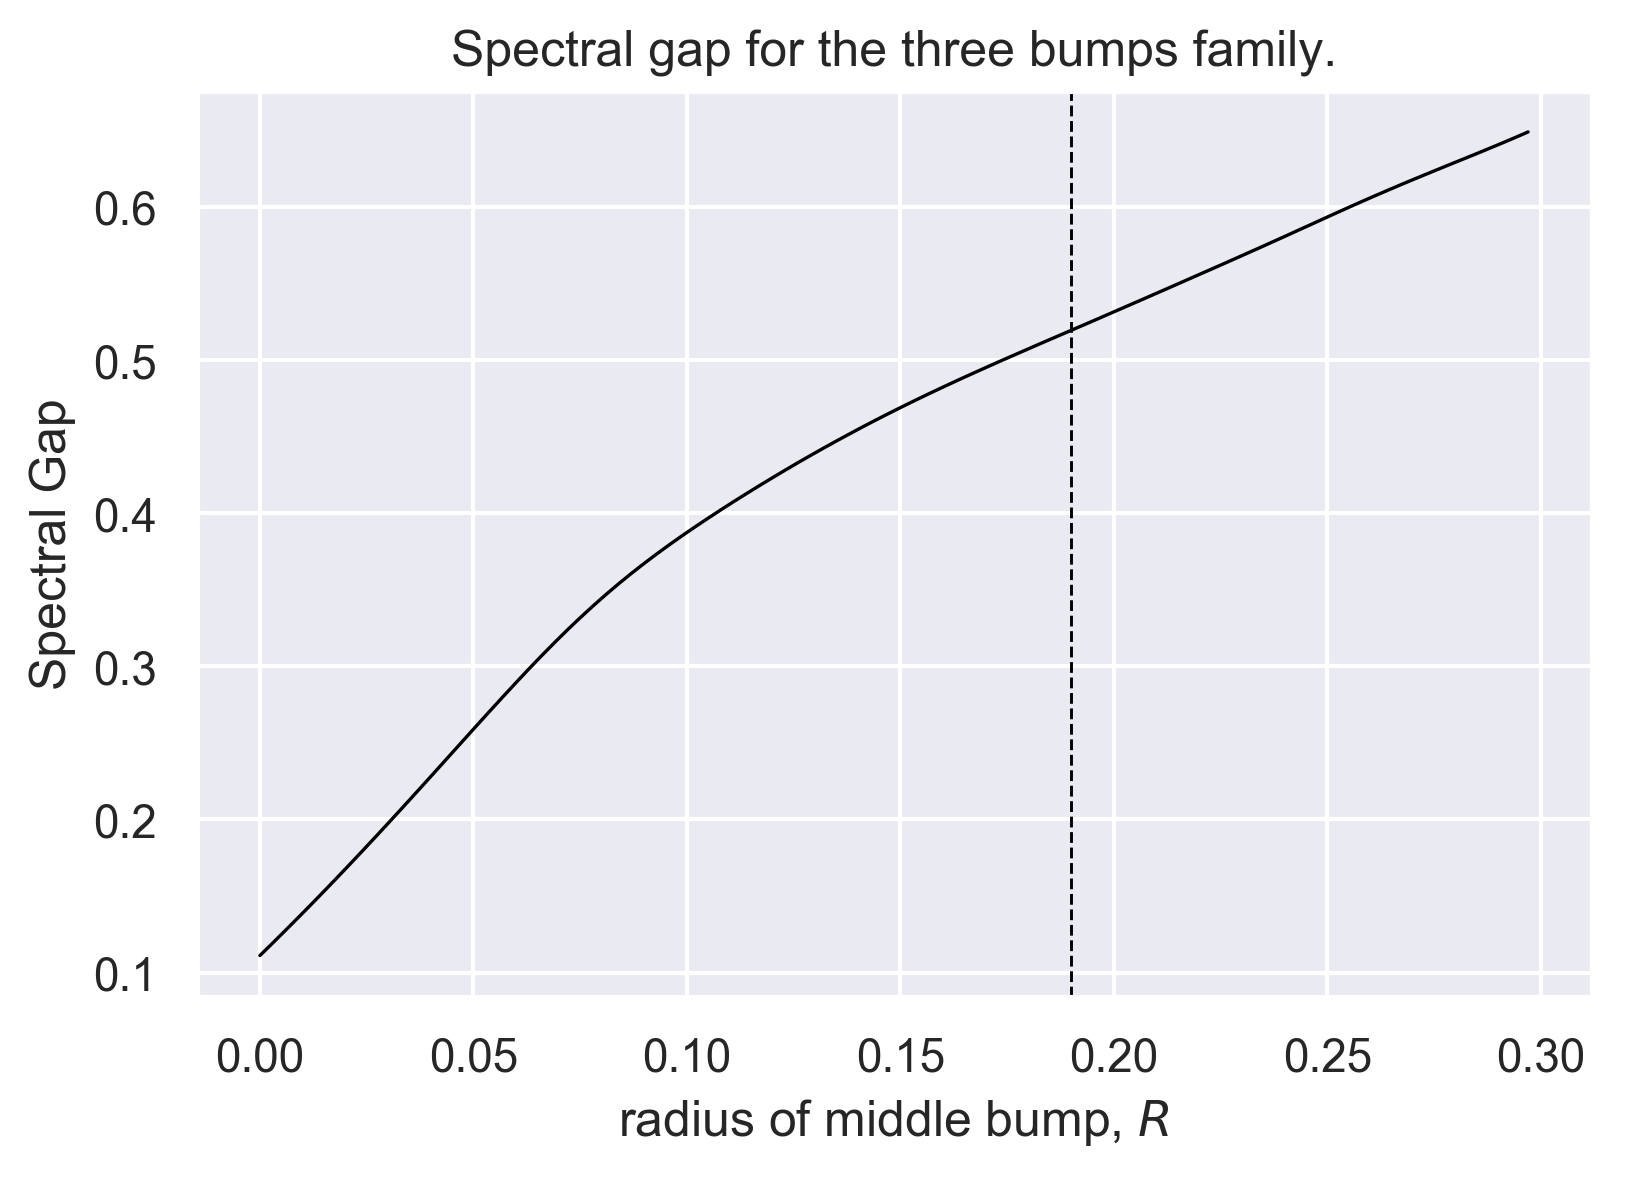

In [8]:
plt.plot(
    radius_list,
    spectral_gap_,
    color="black",
    fillstyle="none",
    lw=0.8
)
plt.xlabel(r"radius of middle bump, $R$")
plt.ylabel("Spectral Gap")  
plt.axvline(0.19, ls="--", c="black", lw=0.7)

plt.title("Spectral gap for the three bumps family.")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig(filename=img_path_+"three_bumps_gap.eps")
plt.show()

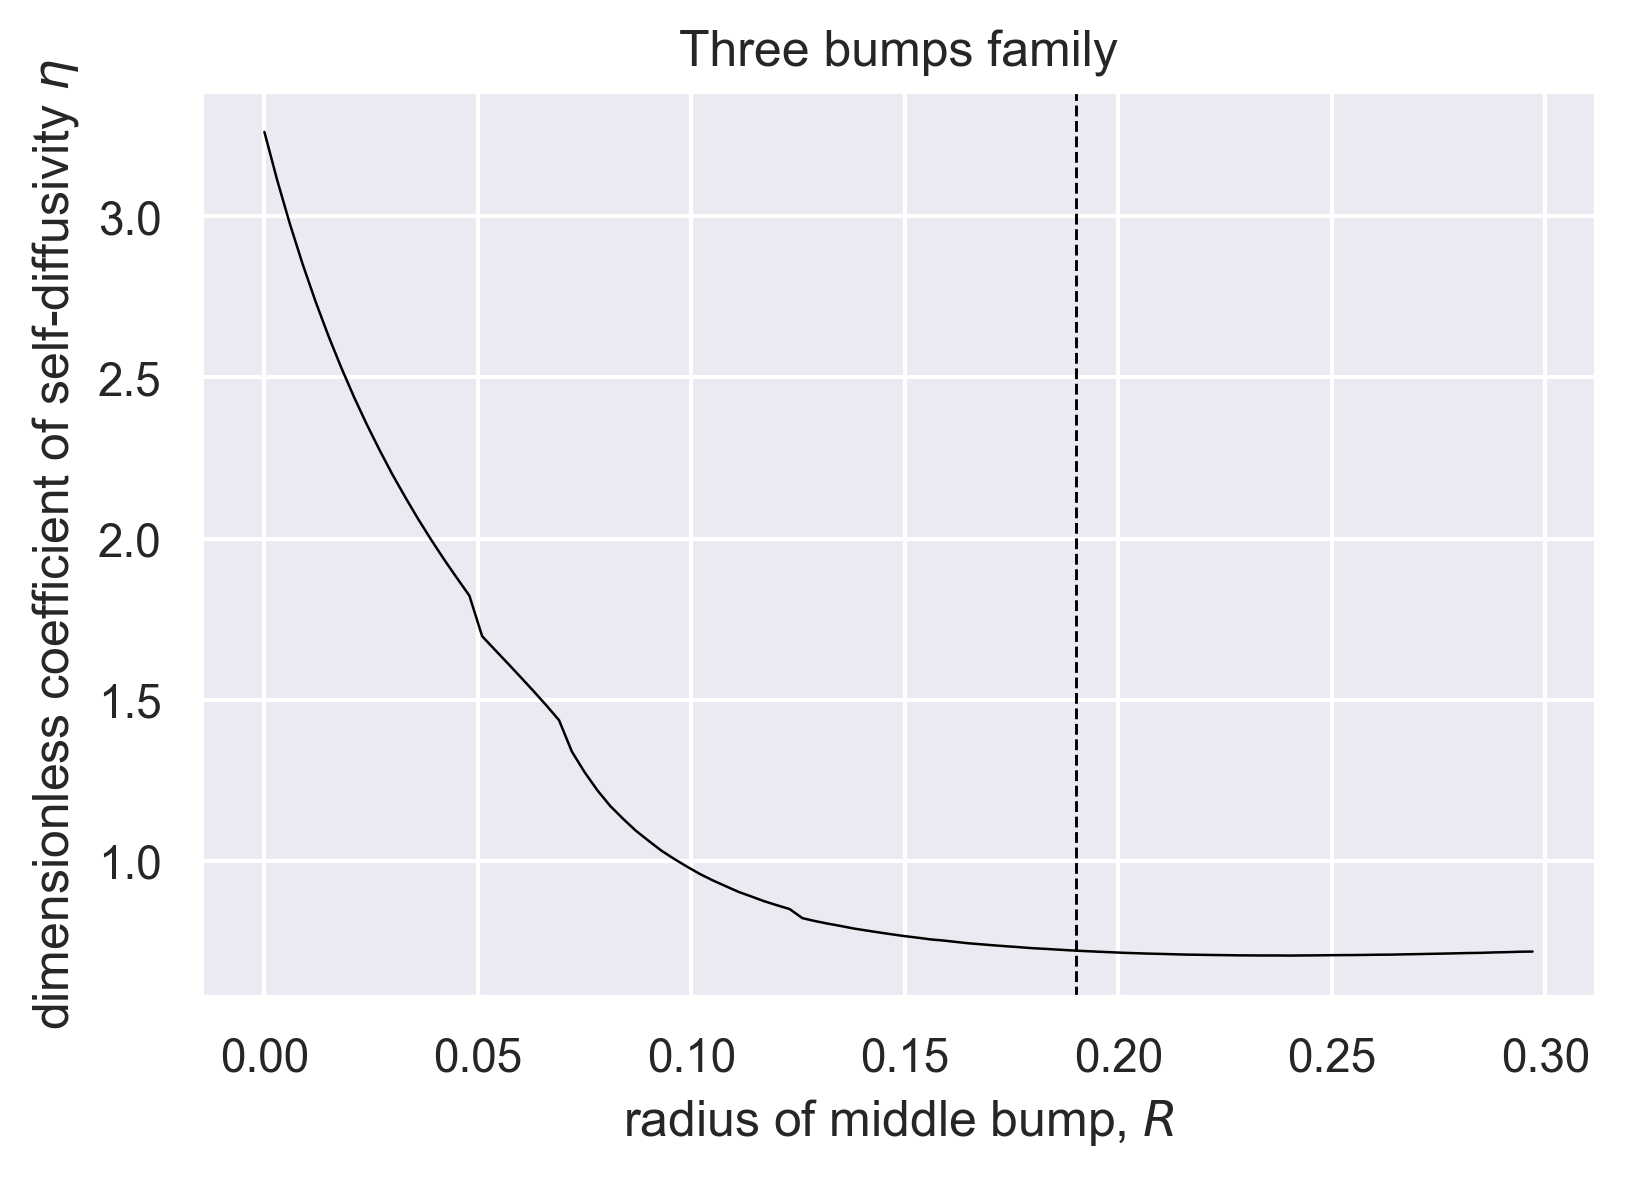

In [9]:
plt.plot(
    radius_list,
    c_acc_coeff_,
    #label=f"Bumps Family",
    fillstyle="none",
    color="black",
        linewidth=0.6

)
plt.axvline(0.19, ls="--", c="black", lw=0.7)


plt.xlabel(r"radius of middle bump, $R$")
plt.ylabel(r"dimensionless coefficient of self-diffusivity $\eta$")   
plt.title("Three bumps family")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig(filename=img_path_+"three_bumps_acc_coeff_channel.eps", bbox_inches='tight')

plt.show()

# Bumps with Flat component

In [4]:
#---first values---#
L = 2
P_stacks = np.load(bumps_with_flat + "p_mats.npy", allow_pickle=False)[::-1][L:]
alphas = np.load(bumps_with_flat + "keys.npy", allow_pickle=False)[L:]
theta_partition = np.load(bumps_with_flat + "theta_partition.npy", allow_pickle=False)

In [ ]:
new_alphas = 

In [5]:
svar_vals_, cvar_vals_, spectral_gap_ = [], [], []
for P in P_stacks:
    # compute the variance
    svar_ = gbc.var_from_P(P_=P, angle_bins_=theta_partition, observable_f=sph_obs)
    cvar_ = gbc.var_from_P(P_=P, angle_bins_=theta_partition,
                           observable_f=lambda x: cha_obs(x, cut=c_, rad=1/2))
    # compute the spectral gap
    spectrum = np.sort(np.real(np.linalg.eigvals(P)))
    second_eig = spectrum[-2]

    # write to inner array
    svar_vals_.append(svar_)
    cvar_vals_.append(cvar_)
    spectral_gap_.append(1-second_eig)
    
svar_vals_, cvar_vals_, spectral_gap_ = np.array(svar_vals_), np.array(cvar_vals_), np.array(spectral_gap_)

In [6]:
s_acc_coeff_, c_acc_coeff_ = svar_vals_/(np.pi**2 - 8), cvar_vals_/knudsen_channel

### Bumps with flat: Spectral Gap

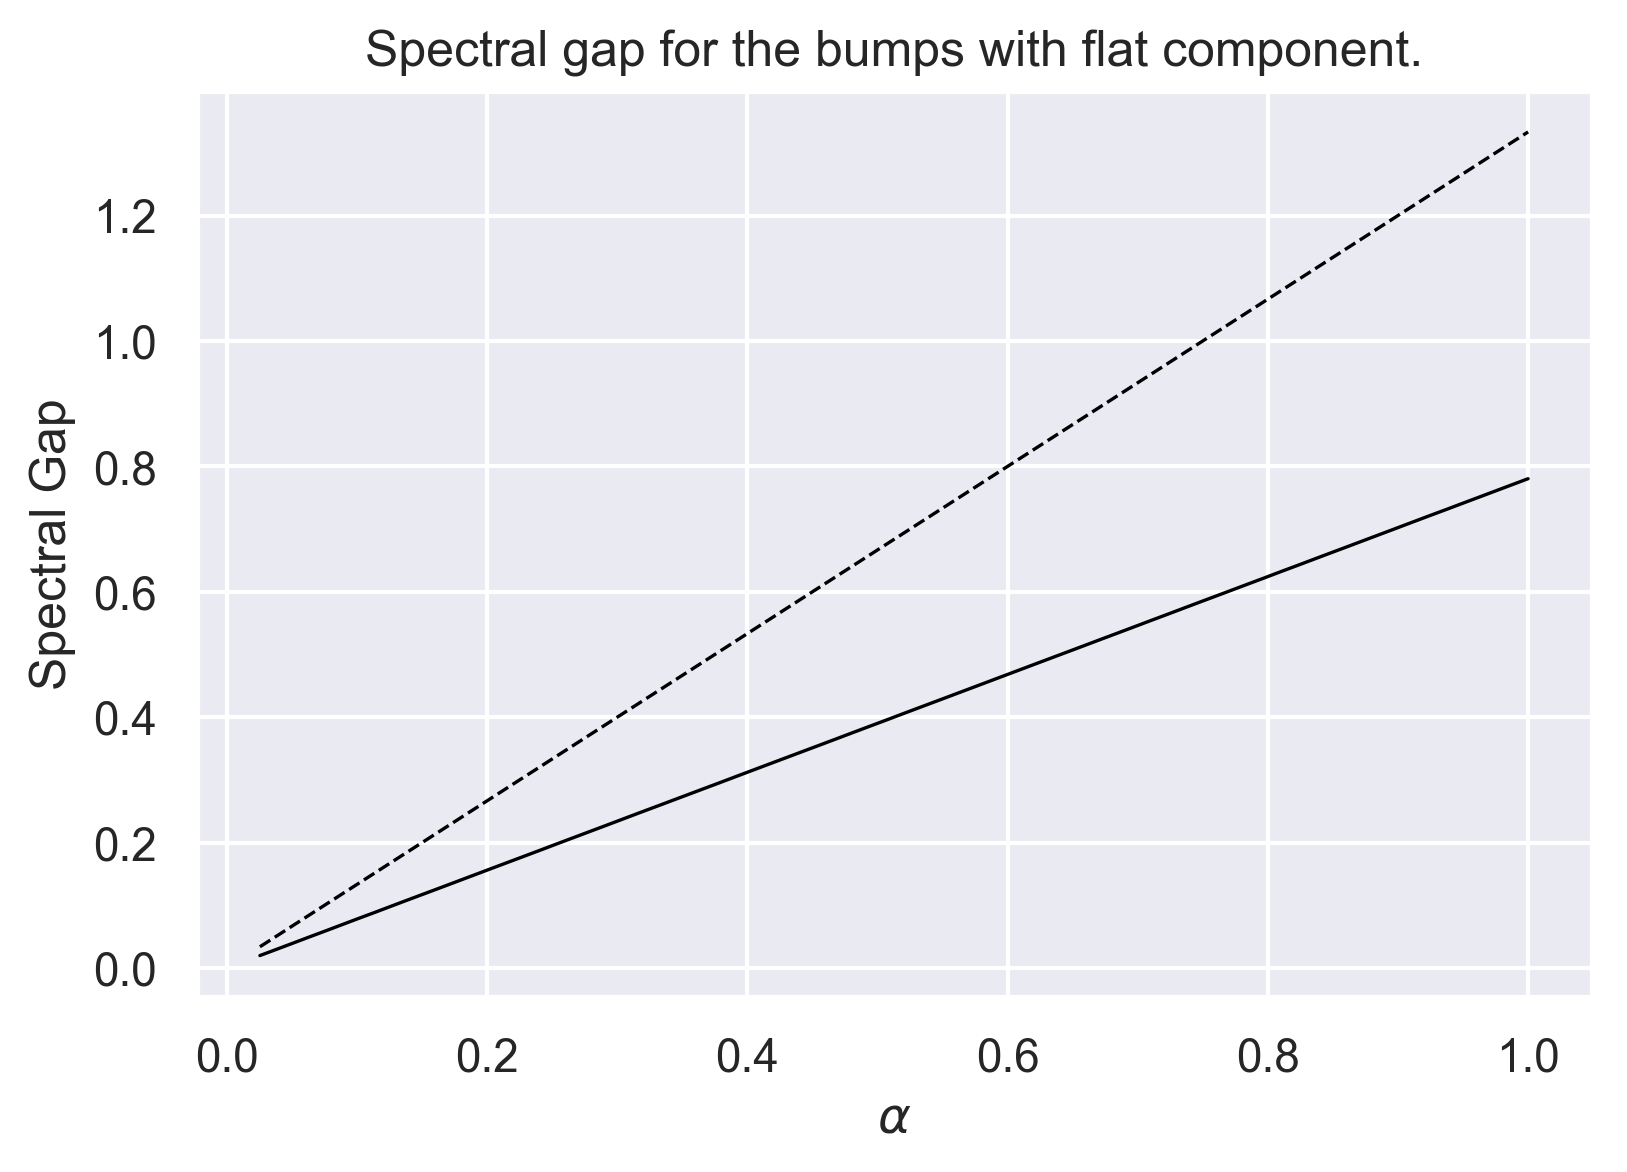

In [7]:
plt.plot(
    alphas,
    spectral_gap_,
    color="black",
    fillstyle="none",
    lw=0.8
)

plt.plot(
    alphas,
    alphas*(4/3),
    color="black",
    fillstyle="none",
    lw=0.8,
    ls="--"
)

plt.xlabel(r"$\alpha$")
plt.ylabel("Spectral Gap")  

plt.title("Spectral gap for the bumps with flat component.")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig(filename=img_path_+"bumps_with_flat_gap.eps")
plt.show()

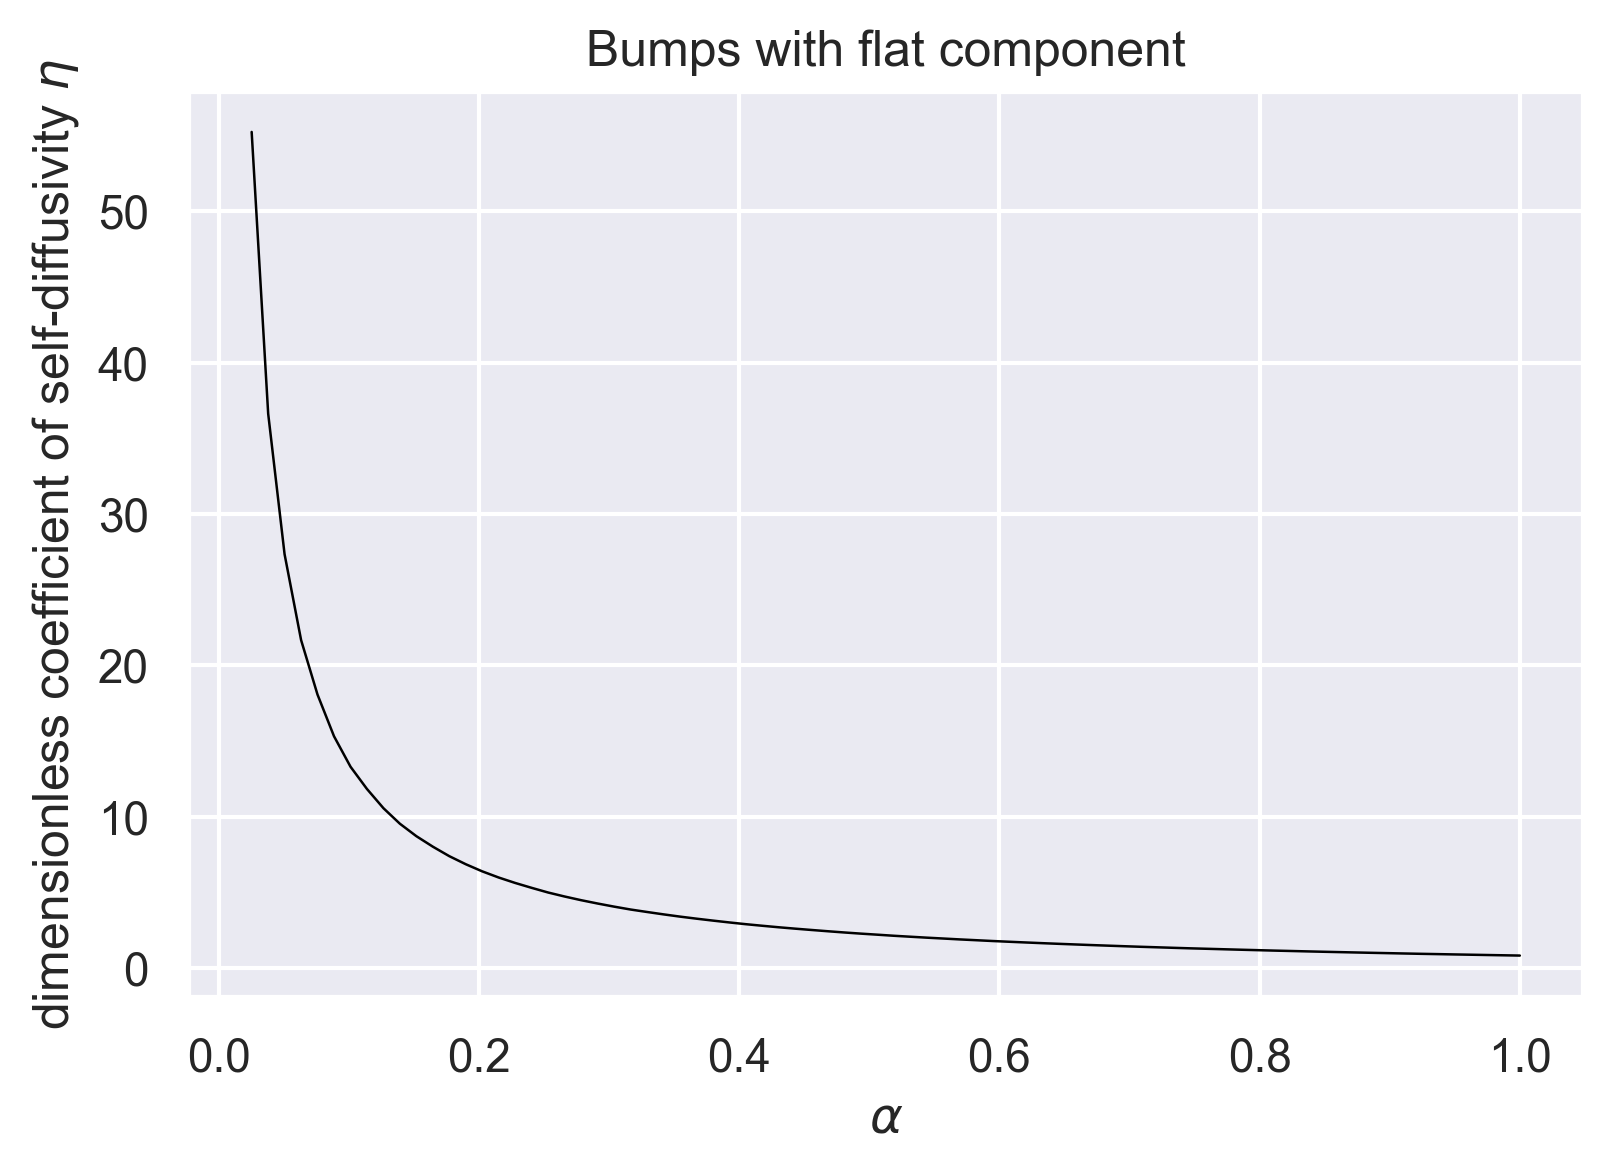

In [18]:
plt.plot(
    alphas,
    c_acc_coeff_,
    #label=f"Bumps Family",
    fillstyle="none",
    color="black",
    linewidth=0.6
)


# plt.plot(
#     alphas,
#     ((3/knudsen_channel)-alphas)/alphas,
#     #label=f"Bumps Family",
#     fillstyle="none",
#     color="black",
#     linewidth=0.6,
#     ls=":"
# )

plt.xlabel(r"$\alpha$")
plt.ylabel(r"dimensionless coefficient of self-diffusivity $\eta$")   
plt.title("Bumps with flat component")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(filename=img_path_+"bumps_with_flat_acc_coeff_channel.eps", bbox_inches='tight')

plt.show()

# Three Bumps

In [19]:
#---first values---#
P_stacks = np.load(three_bumps_family + "p_mats.npy", allow_pickle=False)
params = np.load(three_bumps_family + "keys.npy", allow_pickle=False)
theta_partition = np.load(three_bumps_family + "theta_partition.npy", allow_pickle=False)

In [20]:
radius_list = params[:,0]

In [21]:
svar_vals_, cvar_vals_, spectral_gap_ = [], [], []
for P in P_stacks:
    # compute the variance
    svar_ = gbc.var_from_P(P_=P, angle_bins_=theta_partition, observable_f=sph_obs)
    cvar_ = gbc.var_from_P(P_=P, angle_bins_=theta_partition,
                           observable_f=lambda x: cha_obs(x, cut=c_, rad=1/2))
    # compute the spectral gap
    spectrum = np.sort(np.real(np.linalg.eigvals(P)))
    second_eig = spectrum[-2]

    # write to inner array
    svar_vals_.append(svar_)
    cvar_vals_.append(cvar_)
    spectral_gap_.append(1-second_eig)
    
svar_vals_, cvar_vals_, spectral_gap_ = np.array(svar_vals_), np.array(cvar_vals_), np.array(spectral_gap_)

In [22]:
s_acc_coeff_, c_acc_coeff_ = svar_vals_/(np.pi**2 - 8), cvar_vals_/knudsen_channel

### Three Bumps: Spectral Gap

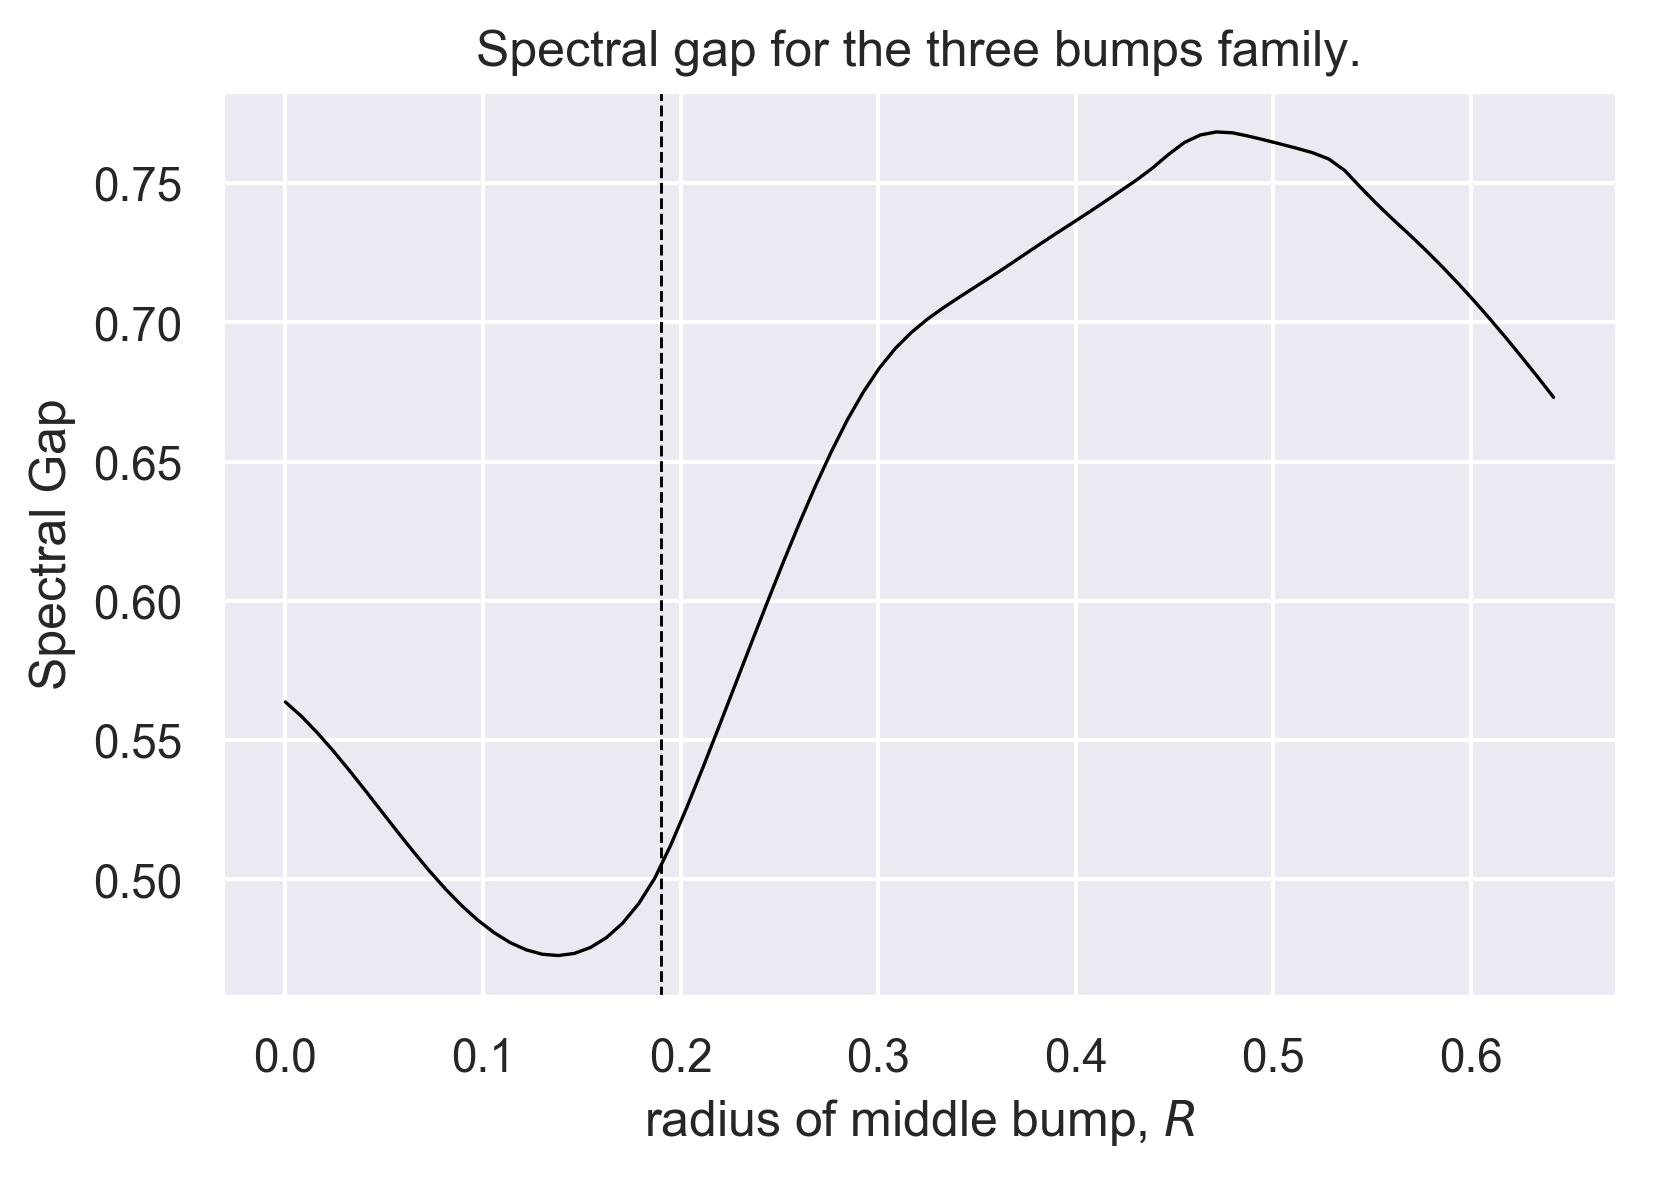

In [23]:

plt.plot(
    radius_list,
    spectral_gap_,
    color="black",
    fillstyle="none",
    lw=0.8
)
plt.xlabel(r"radius of middle bump, $R$")
plt.ylabel("Spectral Gap")  
plt.axvline(0.19, ls="--", c="black", lw=0.7)

plt.title("Spectral gap for the three bumps family.")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(filename=img_path_+"three_bumps_gap.eps")
plt.show()

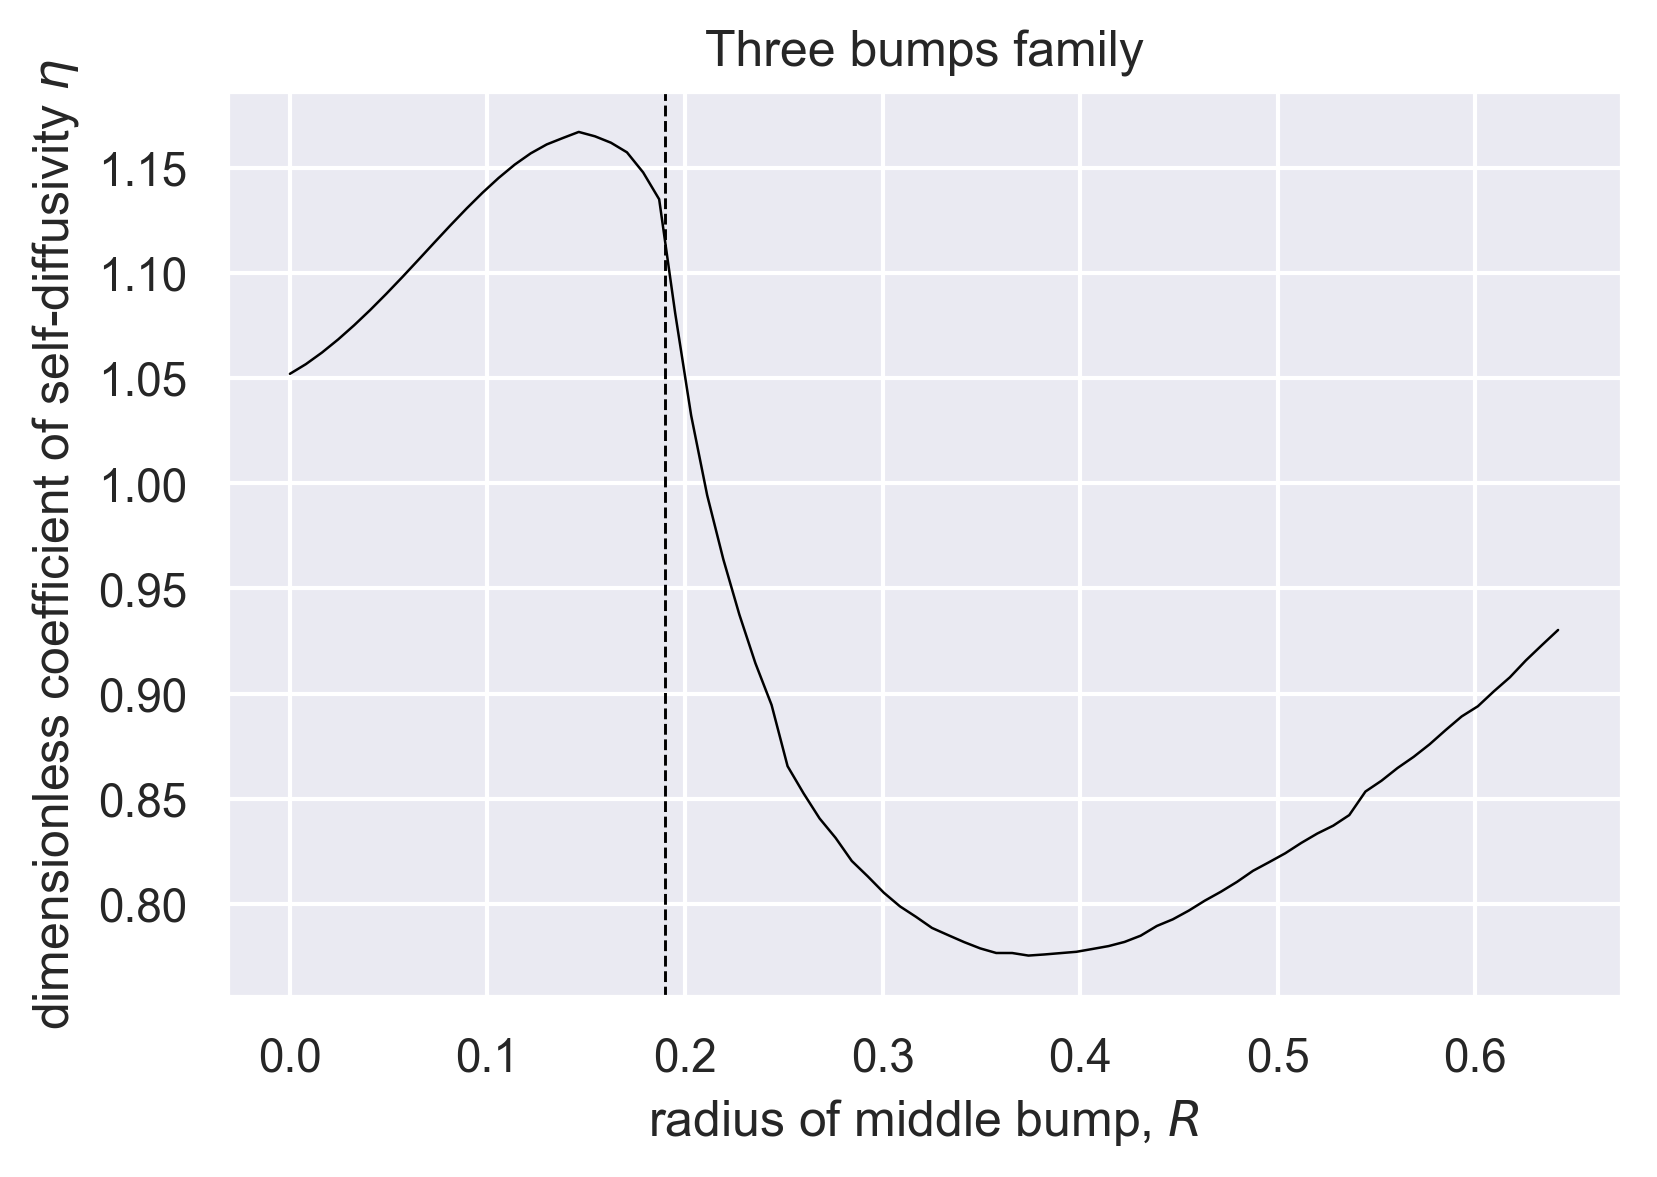

In [24]:
plt.plot(
    radius_list,
    c_acc_coeff_,
    #label=f"Bumps Family",
    fillstyle="none",
    color="black",
        linewidth=0.6

)
plt.axvline(0.19, ls="--", c="black", lw=0.7)


plt.xlabel(r"radius of middle bump, $R$")
plt.ylabel(r"dimensionless coefficient of self-diffusivity $\eta$")   
plt.title("Three bumps family")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(filename=img_path_+"three_bumps_acc_coeff_channel.eps", bbox_inches='tight')

plt.show()

# Bumps Family

In [4]:
#---first values---#
P_stacks = np.load(bumps_family + "p_mats.npy", allow_pickle=False)
params = np.load(bumps_family + "keys.npy", allow_pickle=False)
theta_partition = np.load(bumps_family + "theta_partition.npy", allow_pickle=False)

In [5]:
radius_list = params[:,0]

In [6]:
K_list = 1/radius_list

In [7]:
cvar_vals_, spectral_gap_ = [], []
for P in P_stacks:
    # compute the variance
    cvar_ = gbc.var_from_P(P_=P, angle_bins_=theta_partition,
                           observable_f=lambda x: cha_obs(x, cut=c_, rad=1/2))
    # compute the spectral gap
    spectrum = np.sort(np.real(np.linalg.eigvals(P)))
    second_eig = spectrum[-2]

    # write to inner array
    cvar_vals_.append(cvar_)
    spectral_gap_.append(1-second_eig)
    
cvar_vals_, spectral_gap_ = np.array(cvar_vals_), np.array(spectral_gap_)

In [8]:
c_acc_coeff_ = cvar_vals_/knudsen_channel

### Bumps Family: Spectral Gap

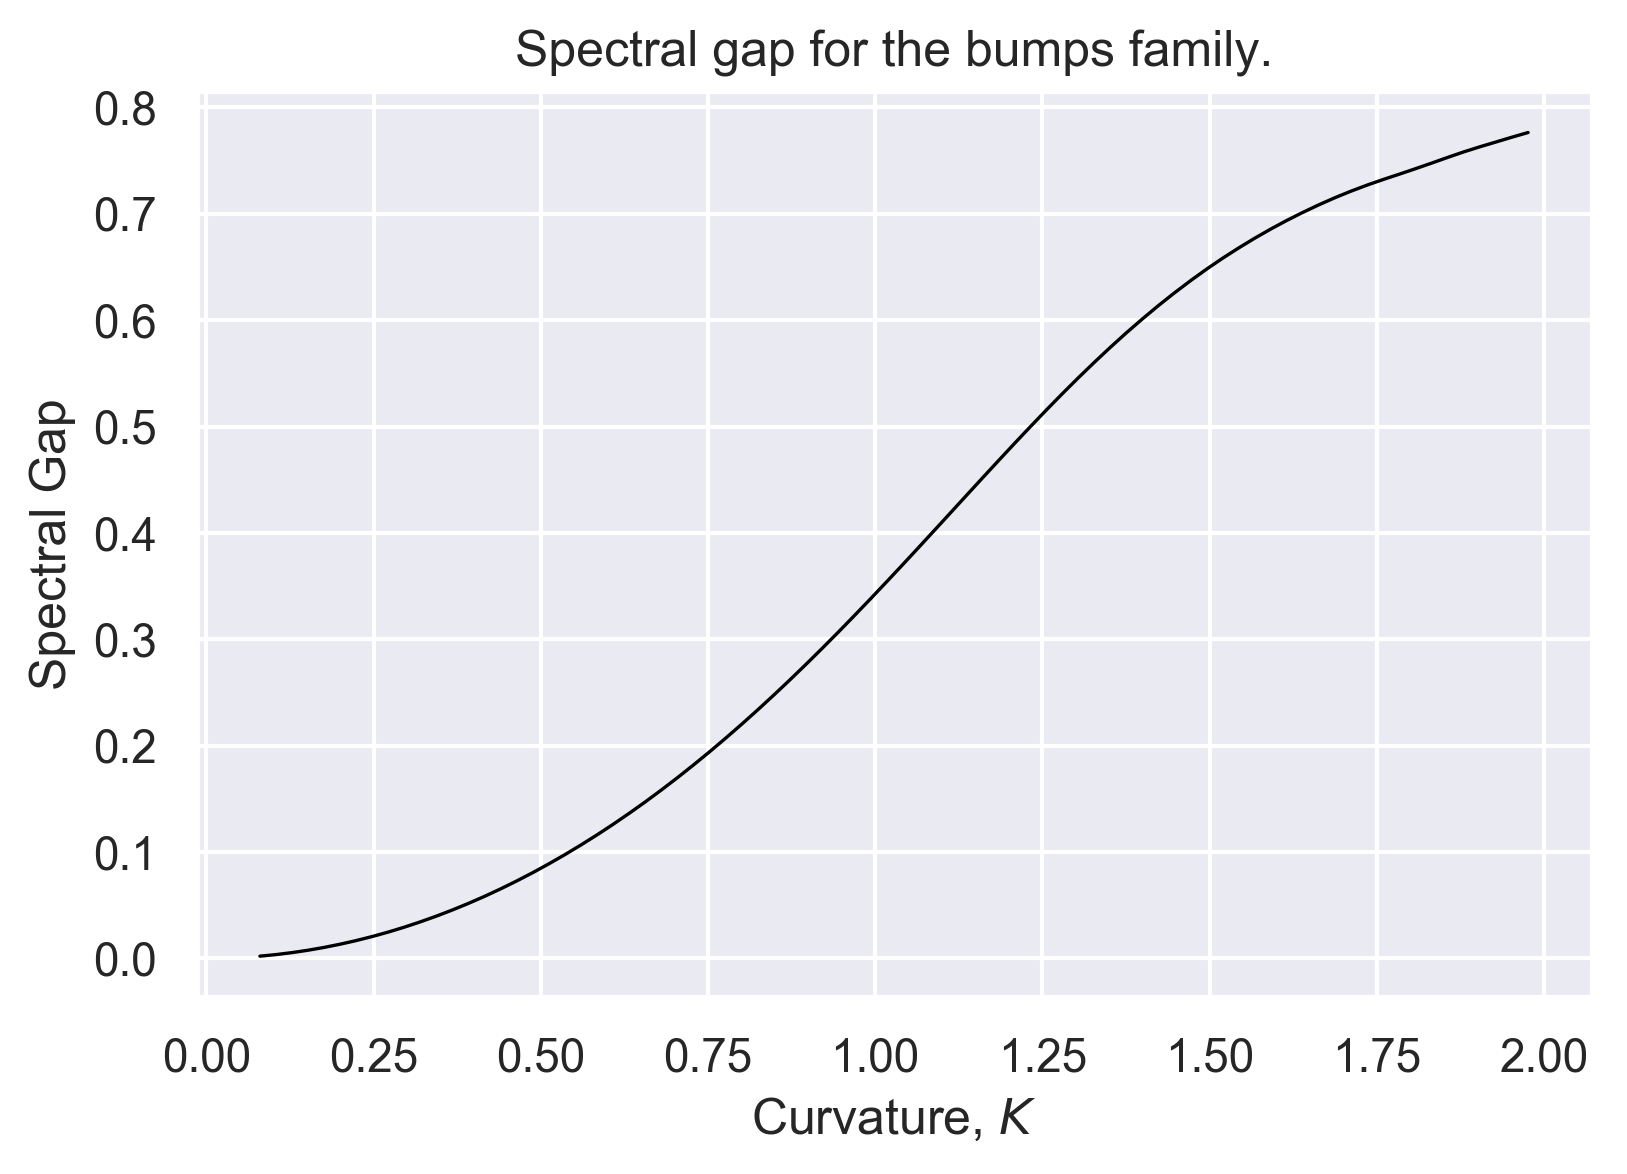

In [30]:
plt.plot(
    K_list,
    spectral_gap_,
    color="black",
    fillstyle="none",
    lw=0.8
)
plt.xlabel(r"Curvature, $K$")
plt.ylabel("Spectral Gap")    

plt.title("Spectral gap for the bumps family.")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig(filename=img_path_+"bumps_spectral_gap.eps")
plt.show()

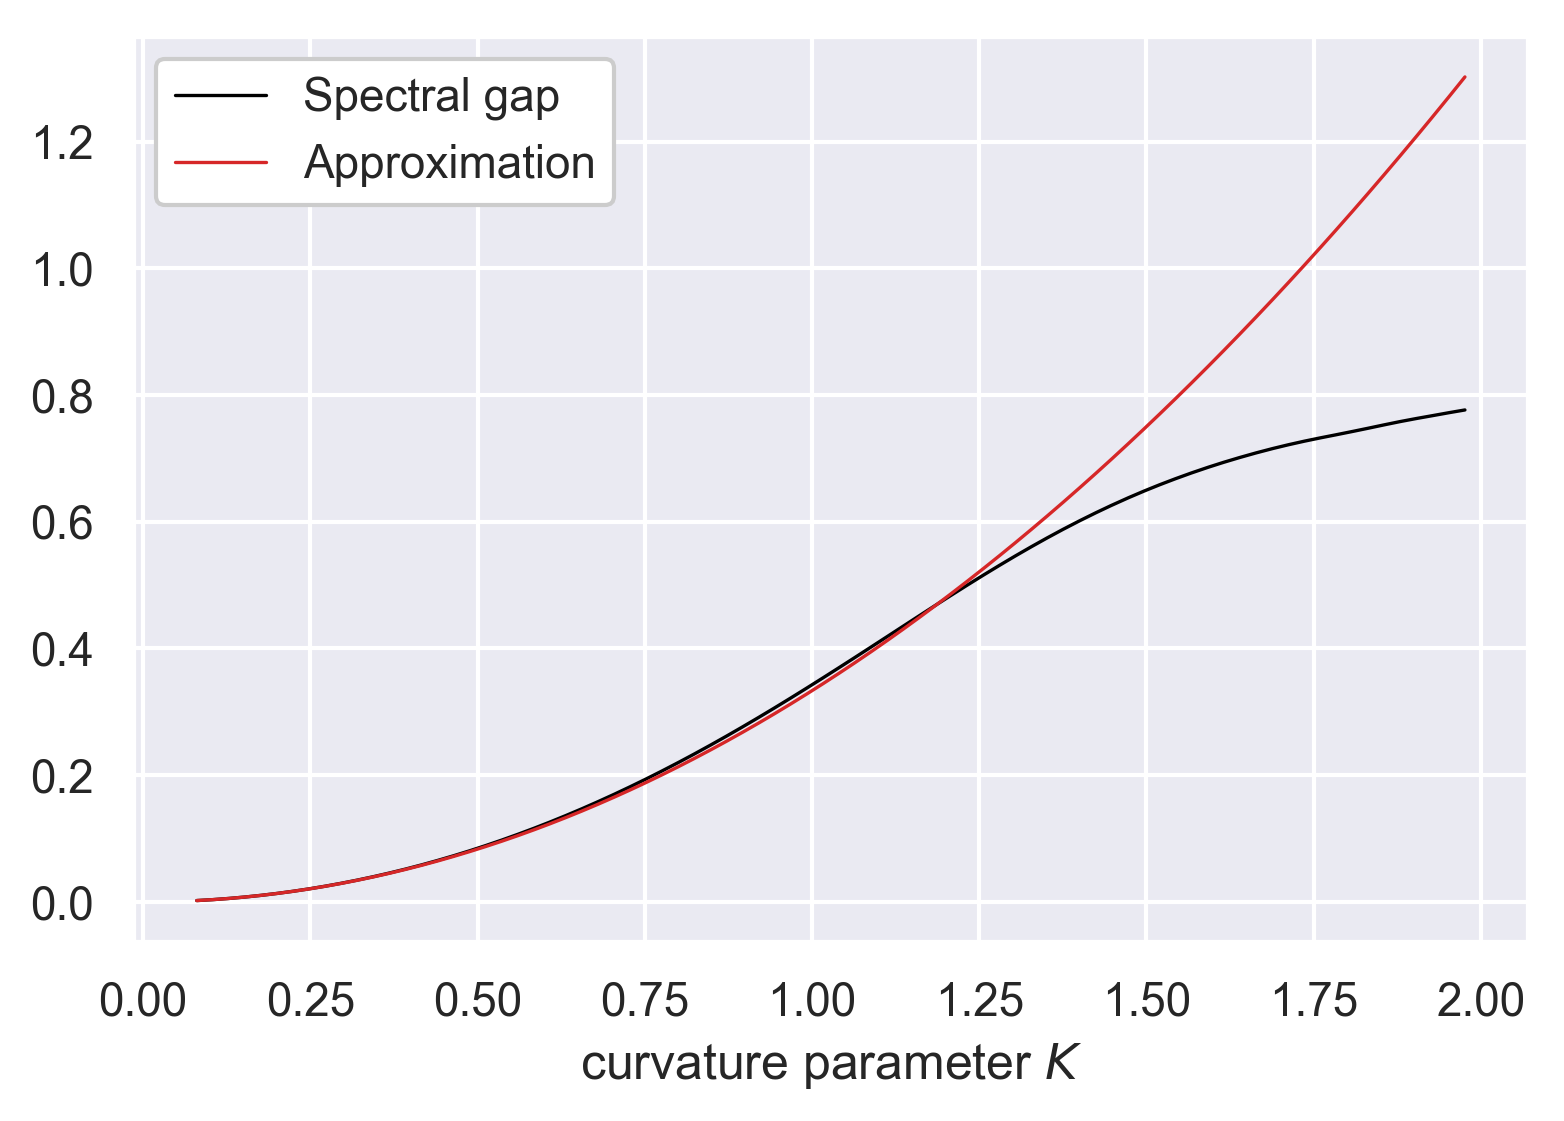

In [24]:
# for THESIS talk
plt.plot(
    K_list,
    spectral_gap_,
    label=f"Spectral gap",
    color="black",
    fillstyle="none",
    lw=0.8
)

plt.plot(
    K_list,
    K_list**2/3,
    label=r"Approximation",
    color="tab:red",
    fillstyle="none",
    ls="-",
    lw=0.8
)
plt.xlabel(r"curvature parameter $K$")
#plt.ylabel("Spectral Gap")    

#plt.title("Spectral gap for the bumps family.")
plt.legend(facecolor="white", framealpha=1)
plt.savefig(filename=img_path_+"defense_bumps_gap_K.eps", bbox_inches='tight')
plt.show()

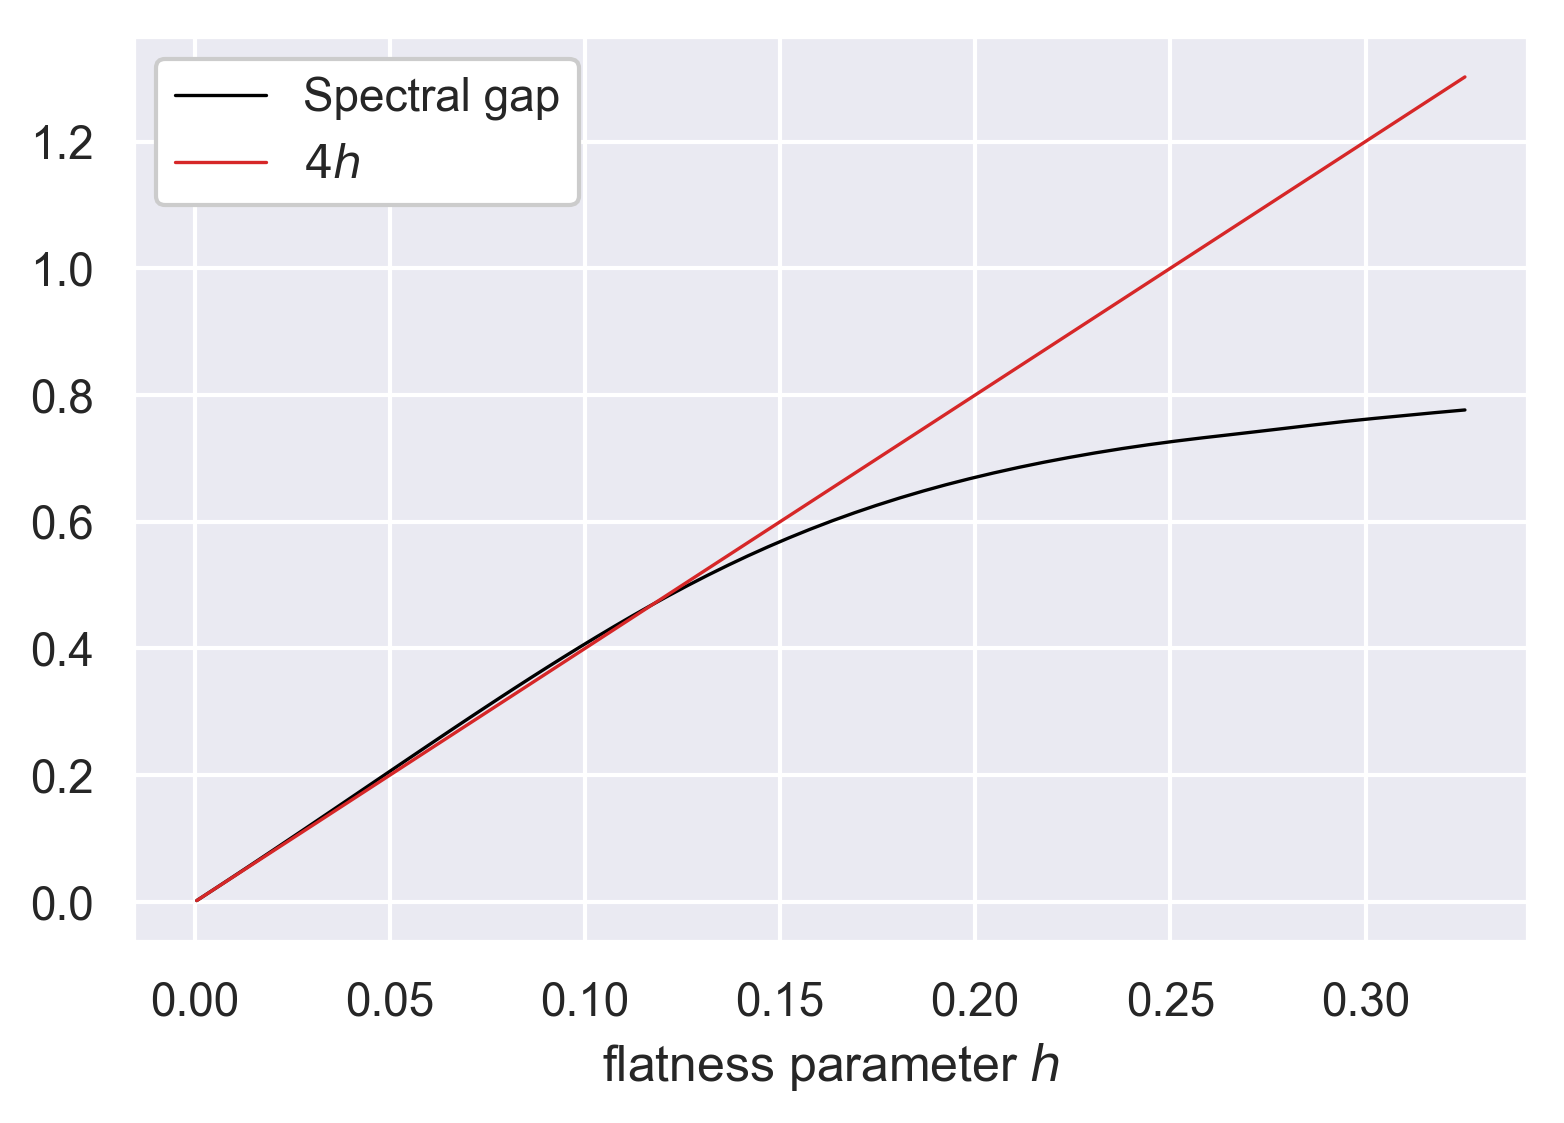

In [25]:
# for THESIS talk
h_list = (K_list**2)/12
plt.plot(
    h_list,
    spectral_gap_,
    label=f"Spectral gap",
    color="black",
    fillstyle="none",
    lw=0.8
)

plt.plot(
    h_list,
    h_list*4,
    label=r"$4h$",
    color="tab:red",
    fillstyle="none",
    ls="-",
    lw=0.8
)
plt.xlabel(r"flatness parameter $h$")
#plt.ylabel("Spectral Gap")    

#plt.title("Spectral gap for the bumps family.")
plt.legend(facecolor="white", framealpha=1)
plt.savefig(filename=img_path_+"defense_bumps_gap_h.eps", bbox_inches='tight')
plt.show()

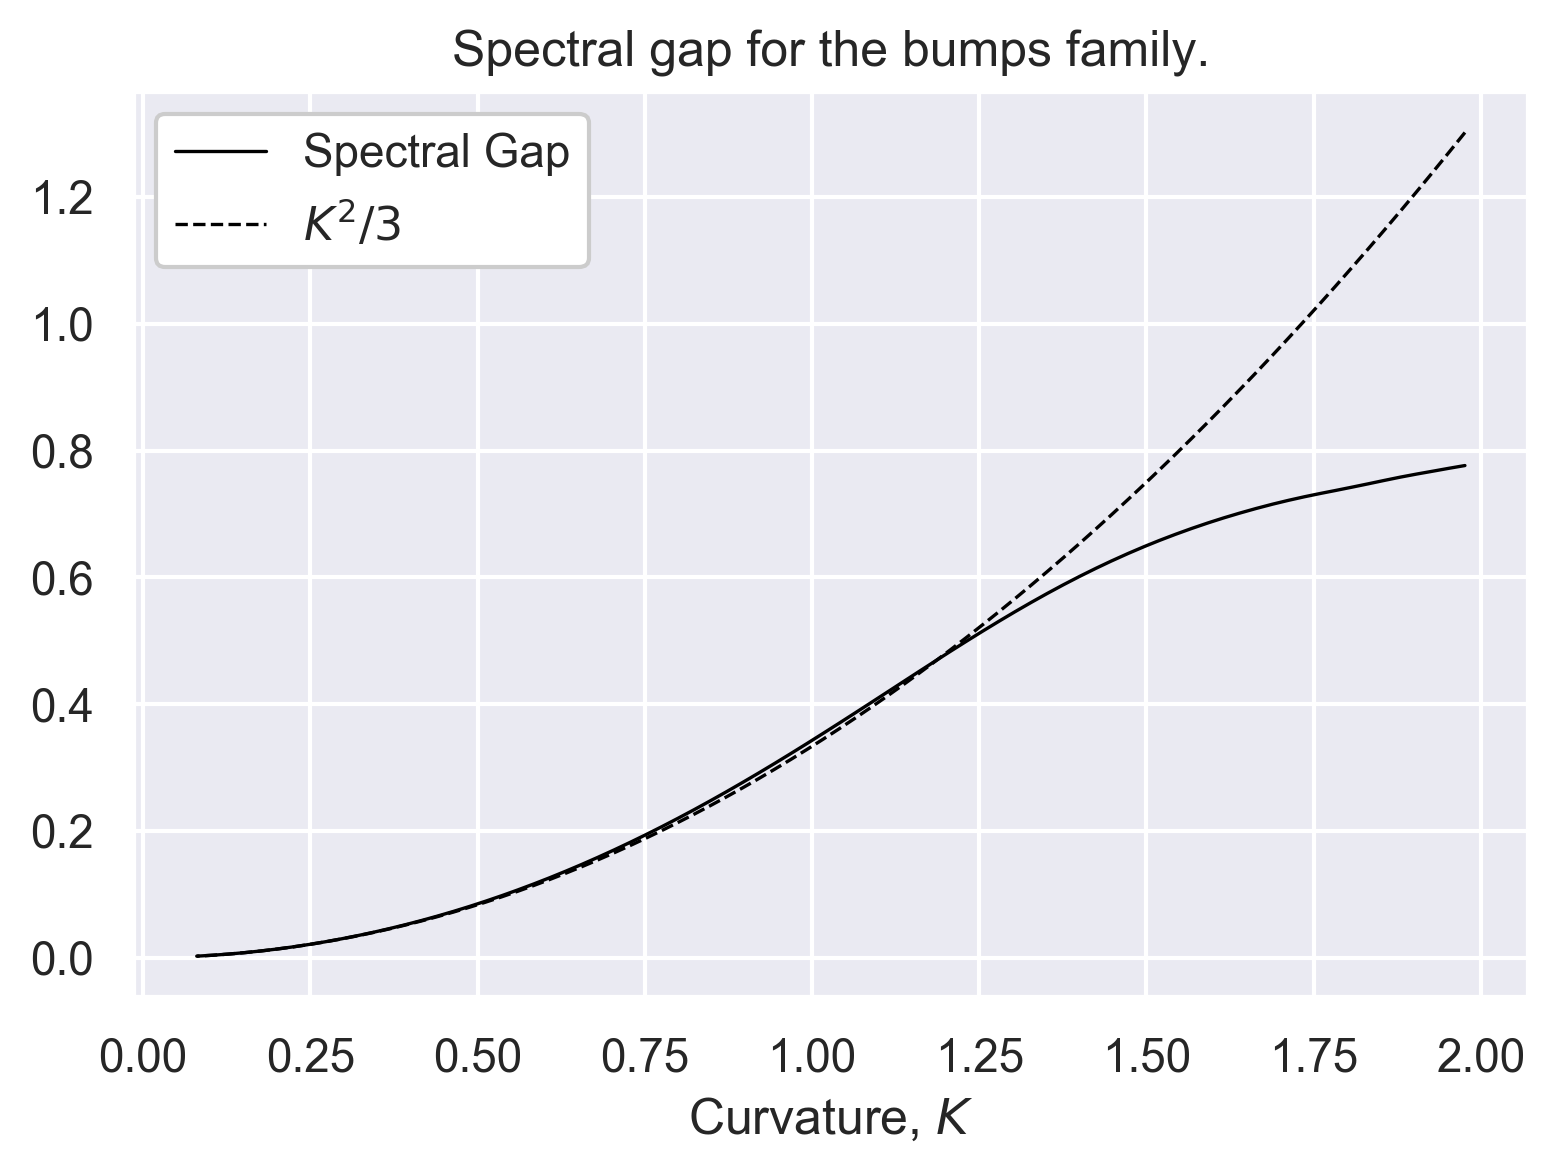

In [34]:

plt.plot(
    K_list,
    spectral_gap_,
    label=f"Spectral Gap",
    color="black",
    fillstyle="none",
    lw=0.8
)

plt.plot(
    K_list,
    K_list**2/3,
    label=r"$K^2 /3$",
    color="black",
    fillstyle="none",
    ls="--",
    lw=0.8
)
plt.xlabel(r"Curvature, $K$")
#plt.ylabel("Spectral Gap")    

plt.title("Spectral gap for the bumps family.")
plt.legend(facecolor="white", framealpha=1)
plt.savefig(filename=img_path_+"bumps_spectral_gap_w_approx.eps", bbox_inches='tight')
plt.show()

### Bumps Family: Accomodation Coefficient (disk)

The observable is $$f(x)=2x-\pi$$

In [10]:
guess_ = (2-spectral_gap_)/spectral_gap_#(4-K_list**2.2)/(K_list**2.2)

In [11]:
plt.plot(
    K_list,
    s_acc_coeff_,
    #label=r"Acc. coeff. (disk)",
    fillstyle="none",
    color="black")

# plt.plot(
#     K_list,
#     guess_,
#     label=f"Estimate",
#     ls="-.",
#     color="yellow")
    
plt.xlabel("Curvature, K")
plt.ylabel("Accomodation Coefficient (disk)")   
plt.title("Bumps Family with radius 1/2 .")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig(filename=img_path_+"bumps_acc_coeff_disk.svg")
#plt.savefig(filename=img_path_+"bumps_acc_coeff_disk.png")
plt.show()

NameError: name 's_acc_coeff_' is not defined

In [ ]:
guess_ = (2-spectral_gap_)/spectral_gap_#(4-K_list**2.2)/(K_list**2.2)

In [ ]:
plt.plot(
    K_list,
    s_acc_coeff_,
    label=r"Acc. coeff. (disk)",
    fillstyle="none",
    color="black",
    linewidth="0.6"
)

plt.plot(
    K_list,
    guess_,
    label=r"$\frac{2-s}{s}$",
    ls="-.",
    color="black",
    marker="*",
    markevery=list(np.arange(len(K_list))[::6]) + [-1, -2, -3],
    linewidth=0.5
)
    
plt.xlabel("Curvature, K")
#plt.ylabel("Accomodation Coefficient (disk)")   
plt.title("Accomodation coefficient for the bumps family.")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.savefig(filename=img_path_+"bumps_acc_coeff_disk_compare.eps", bbox_inches='tight')
#plt.savefig(filename=img_path_+"bumps_acc_coeff_disk_compare.png", bbox_inches='tight')
plt.show()

### Bumps Family: Accomodation Coefficient (Channel)
The observable is 
    $$f(x, r, c)=2r\cot(x),$$
where $r$ is the radius of the channel and $c$ is the maximum distance we cut. Here we take $r=1/2$ and $c=7$. 

In [14]:
#guess_ = (2-spectral_gap_**(1))/spectral_gap_**(1) #(4-K_list**2.2)/(K_list**2.2)
guess_ = (12/knudsen_channel-(K_list**2))/(K_list**2) #+K_list**(3/2)

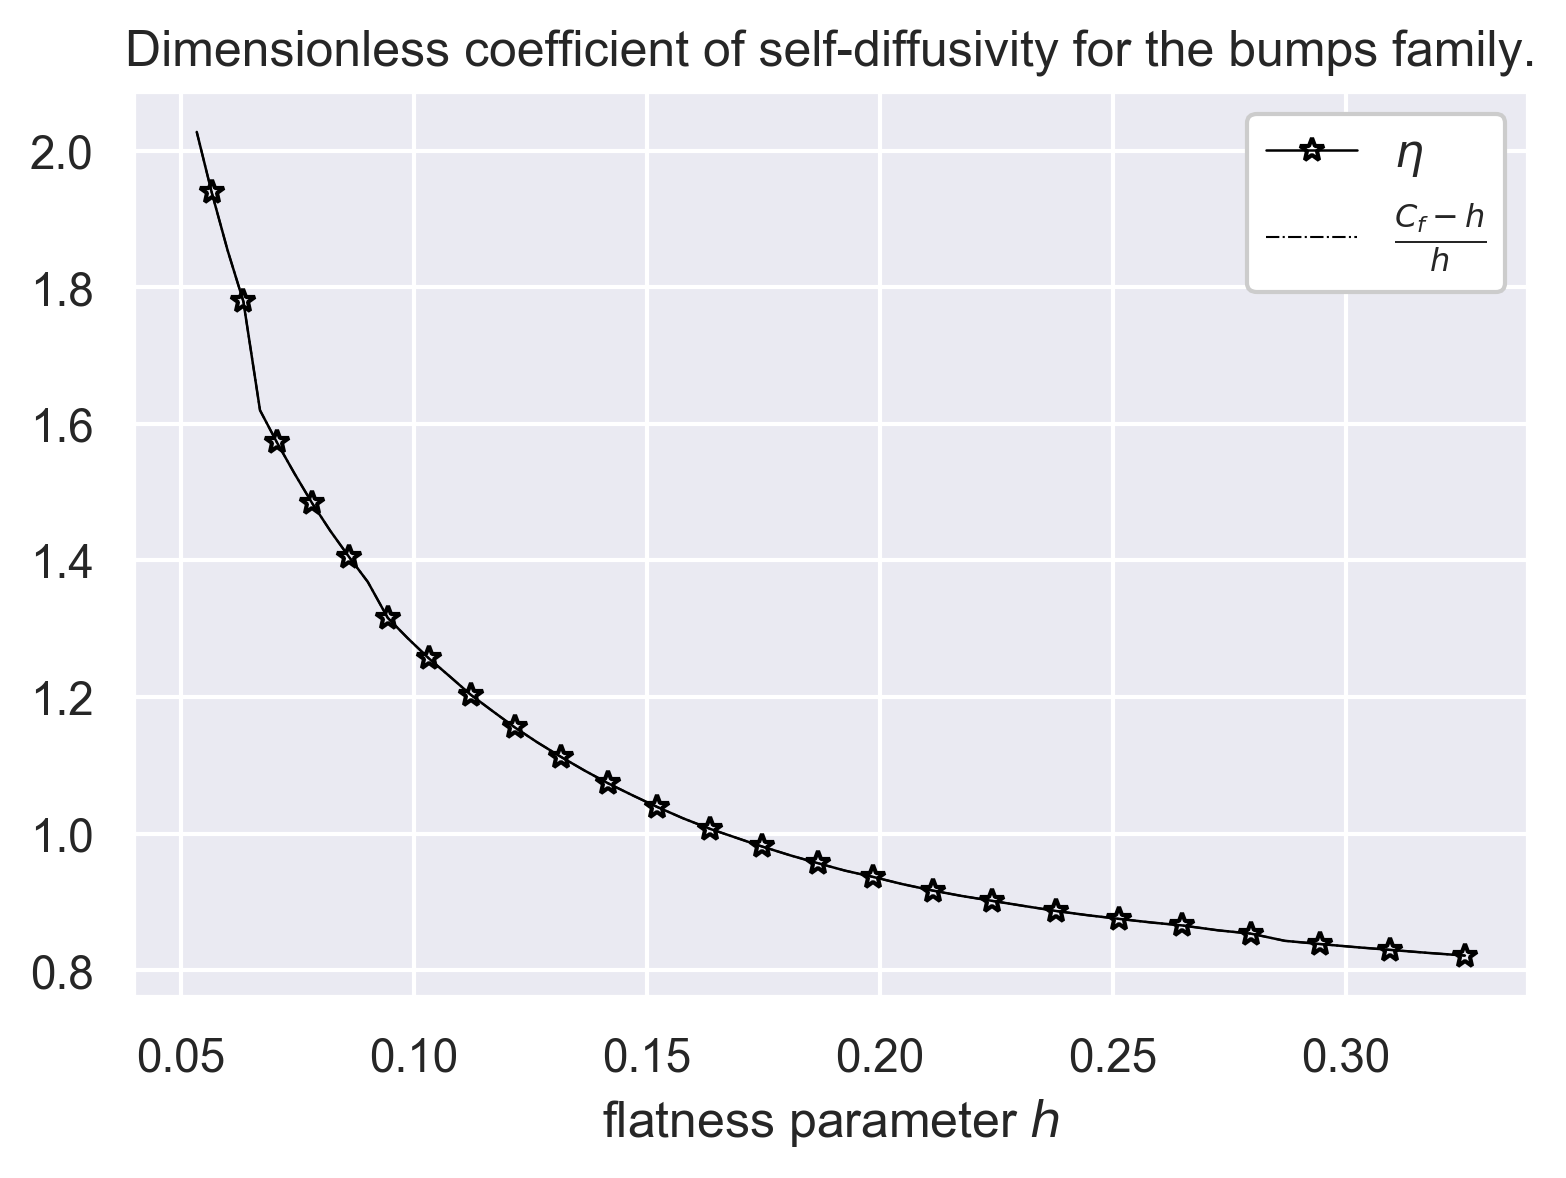

In [38]:
L = 50

plt.plot(
    ((K_list**2)/12)[:L],
    c_acc_coeff_[:L],
    label=f"$\eta$",
    fillstyle="none",
    color="black",
    linewidth=0.6,
    marker="*",
    markevery=2,
)

fix_ = c_acc_coeff_[:L].copy()

plt.plot(
    ((K_list**2)/12)[:L],
    fix_,
    label=r"$\frac{C_f-h}{h}$",
    ls="-.",
    color="black",
    linewidth=0.5
)
    
plt.xlabel(r"flatness parameter $h$")
#plt.ylabel("Accomodation Coefficient (channel)")   
plt.title("Dimensionless coefficient of self-diffusivity for the bumps family.")

plt.legend(facecolor='white', framealpha=1)

#plt.savefig(filename=img_path_+"bumps_acc_coeff_channel_compare.eps", bbox_inches='tight')

plt.show()

In [ ]:
Lrange = np.arange(10**6,7*(10**6))
Cvec = np.array([6/gbc.channel_var(L_, 1/2) for L_ in Lrange])

In [ ]:
plt.plot(Lrange, Cvec)
plt.show()

###### Both Variance and Spectral Gap

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Distance between bumps, h')
ax1.set_ylabel('Spectral Gap')

ax1.plot(
    heights_,
    gap_by_width[0],
    color="black",
    label="Spectral Gap"
)
ax1.tick_params(axis='y', labelcolor="black")
ax1.legend(loc='center left')



ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.grid(False)

color = 'tab:blue'
ax2.set_ylabel('Variance')  # we already handled the x-label with ax1
ax2.plot(
    heights_,
    sph_var_by_width[0],
    color="black", 
    ls="-.",
    label="Variance"
)
ax2.tick_params(axis='y', labelcolor="black")
ax2.legend(loc='center right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title("Spectral gap and variance for bumps with wall")

plt.show()

# Bumps with Wall

In [4]:
#---first values---#
P_stacks = np.load(wall_family + "p_mats.npy", allow_pickle=False)
params = np.load(wall_family + "keys.npy", allow_pickle=False)
theta_partition = np.load(wall_family + "theta_partition.npy", allow_pickle=False)

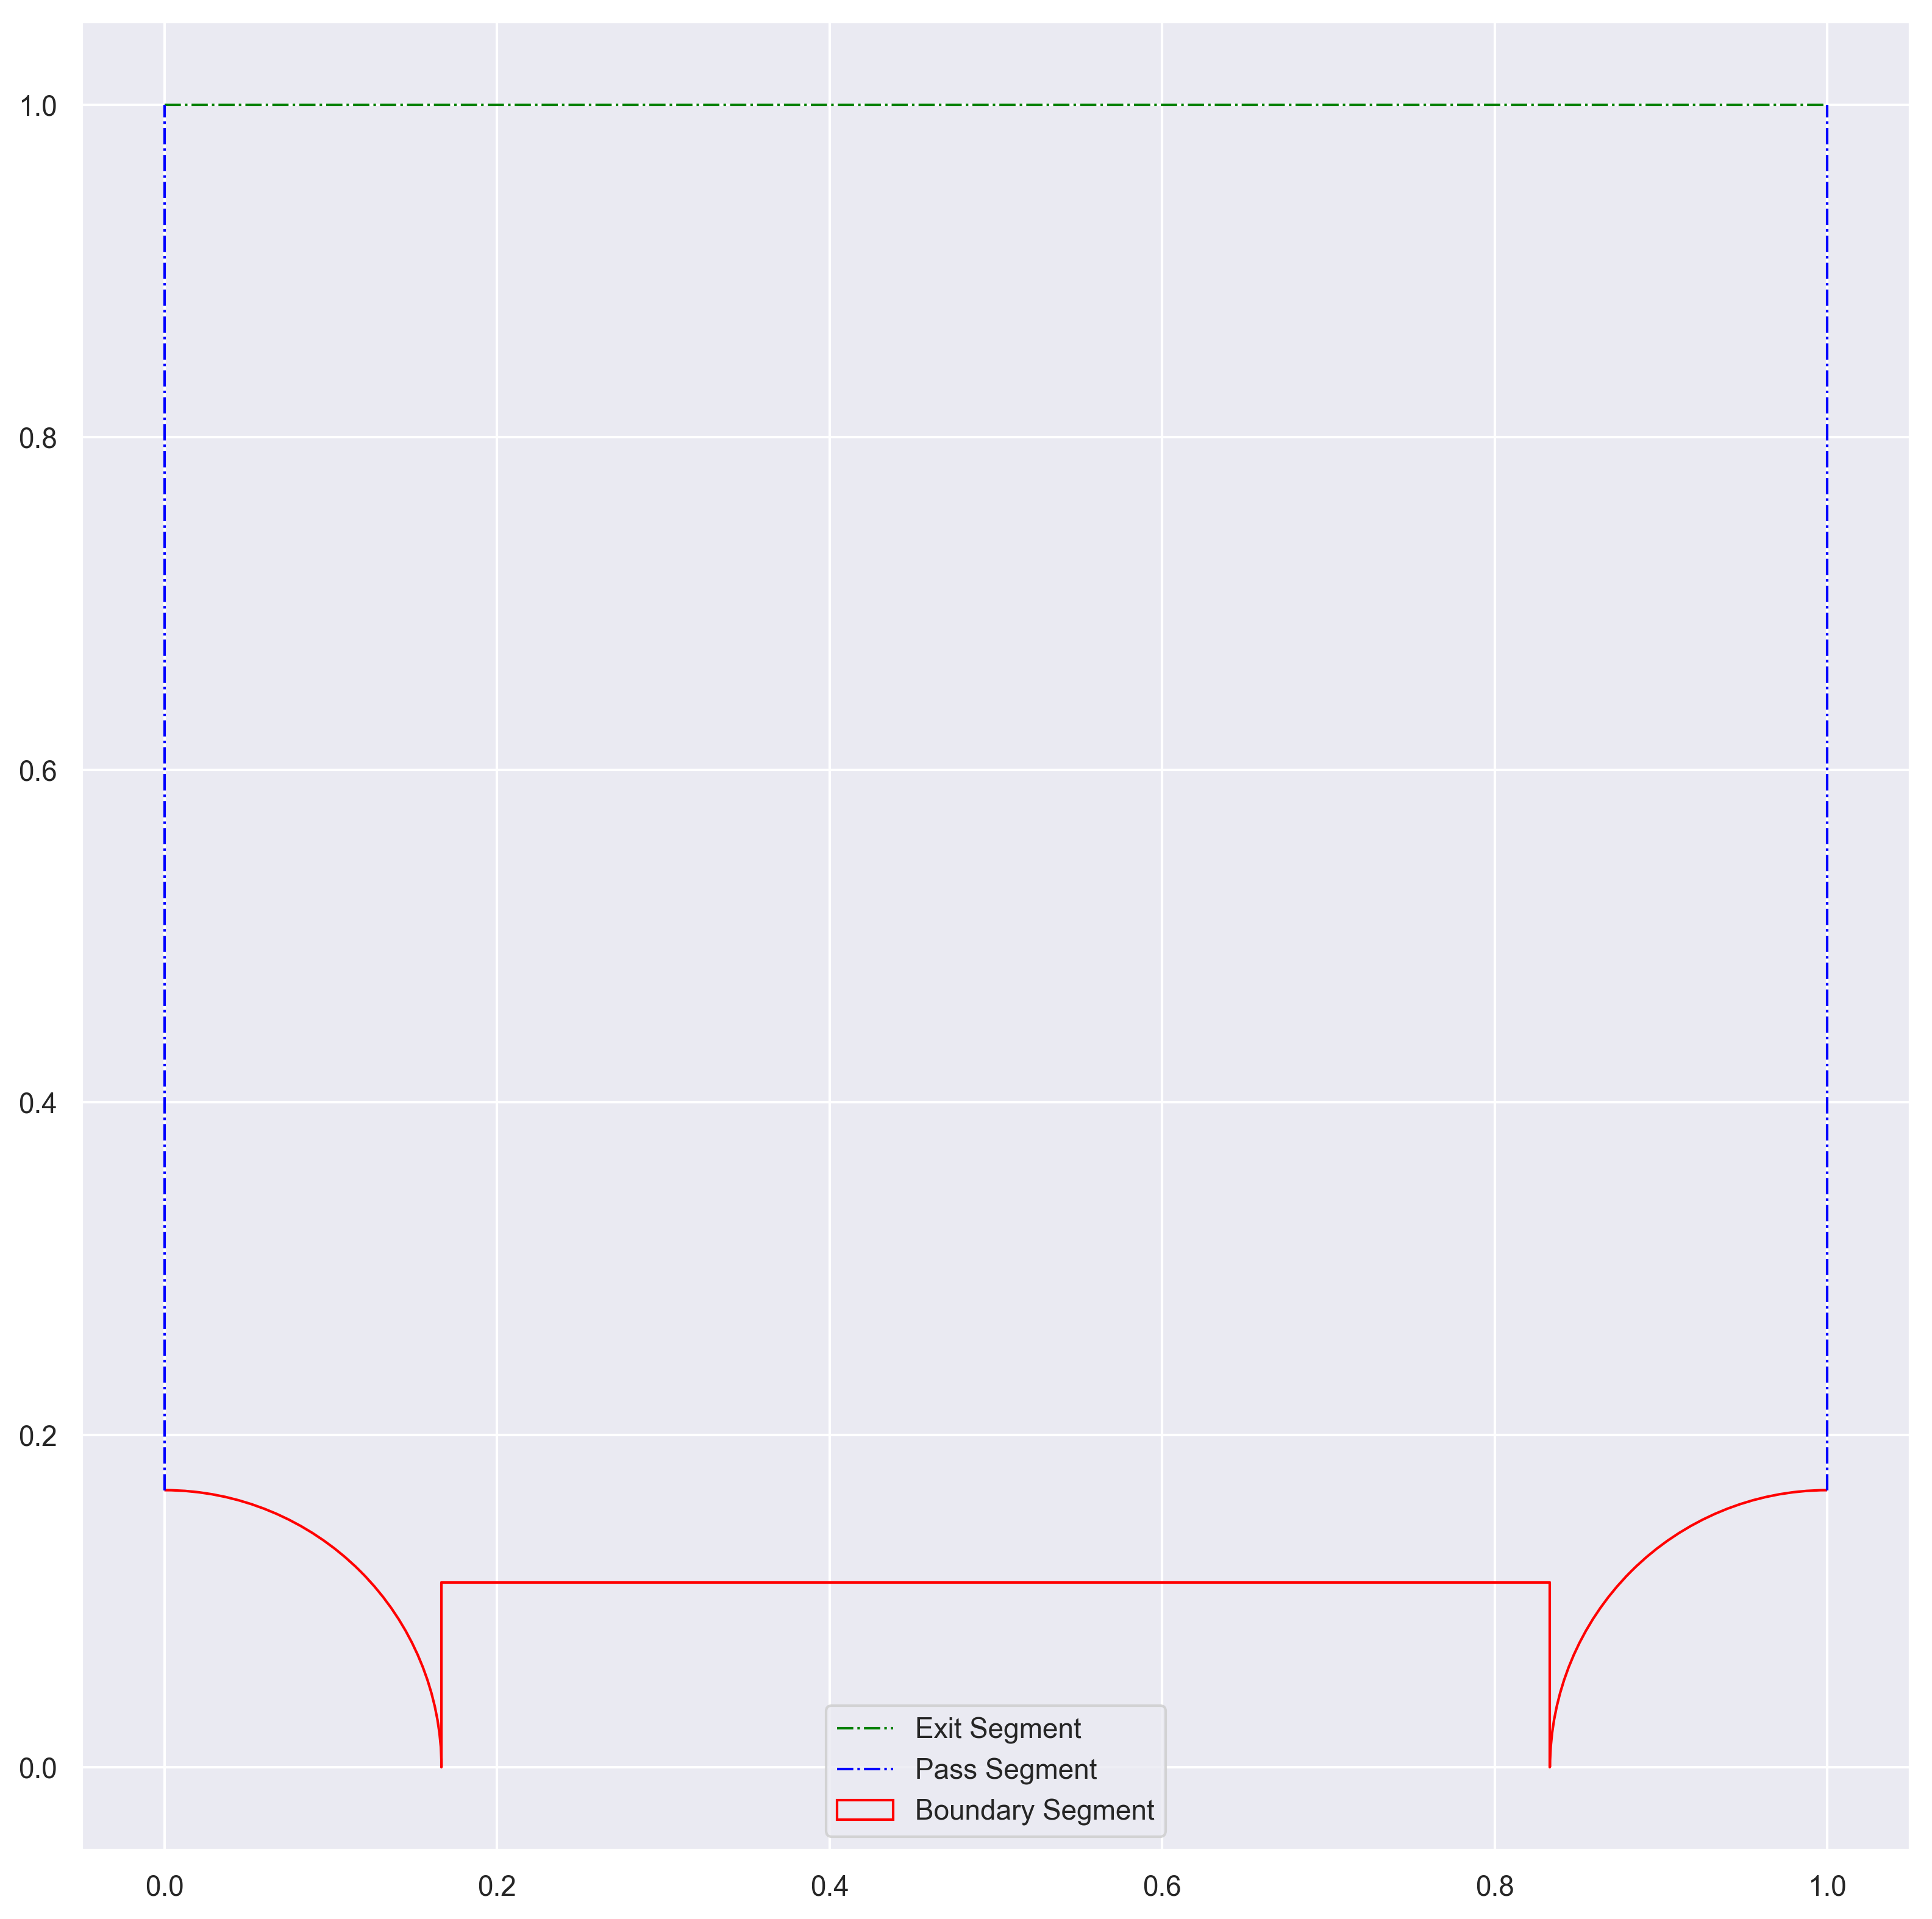

In [5]:
gbc.plot_segments(gbc.bumps_with_wall(radius_=0.75, wall_width_=3, wall_height_=0.5, even_=True))

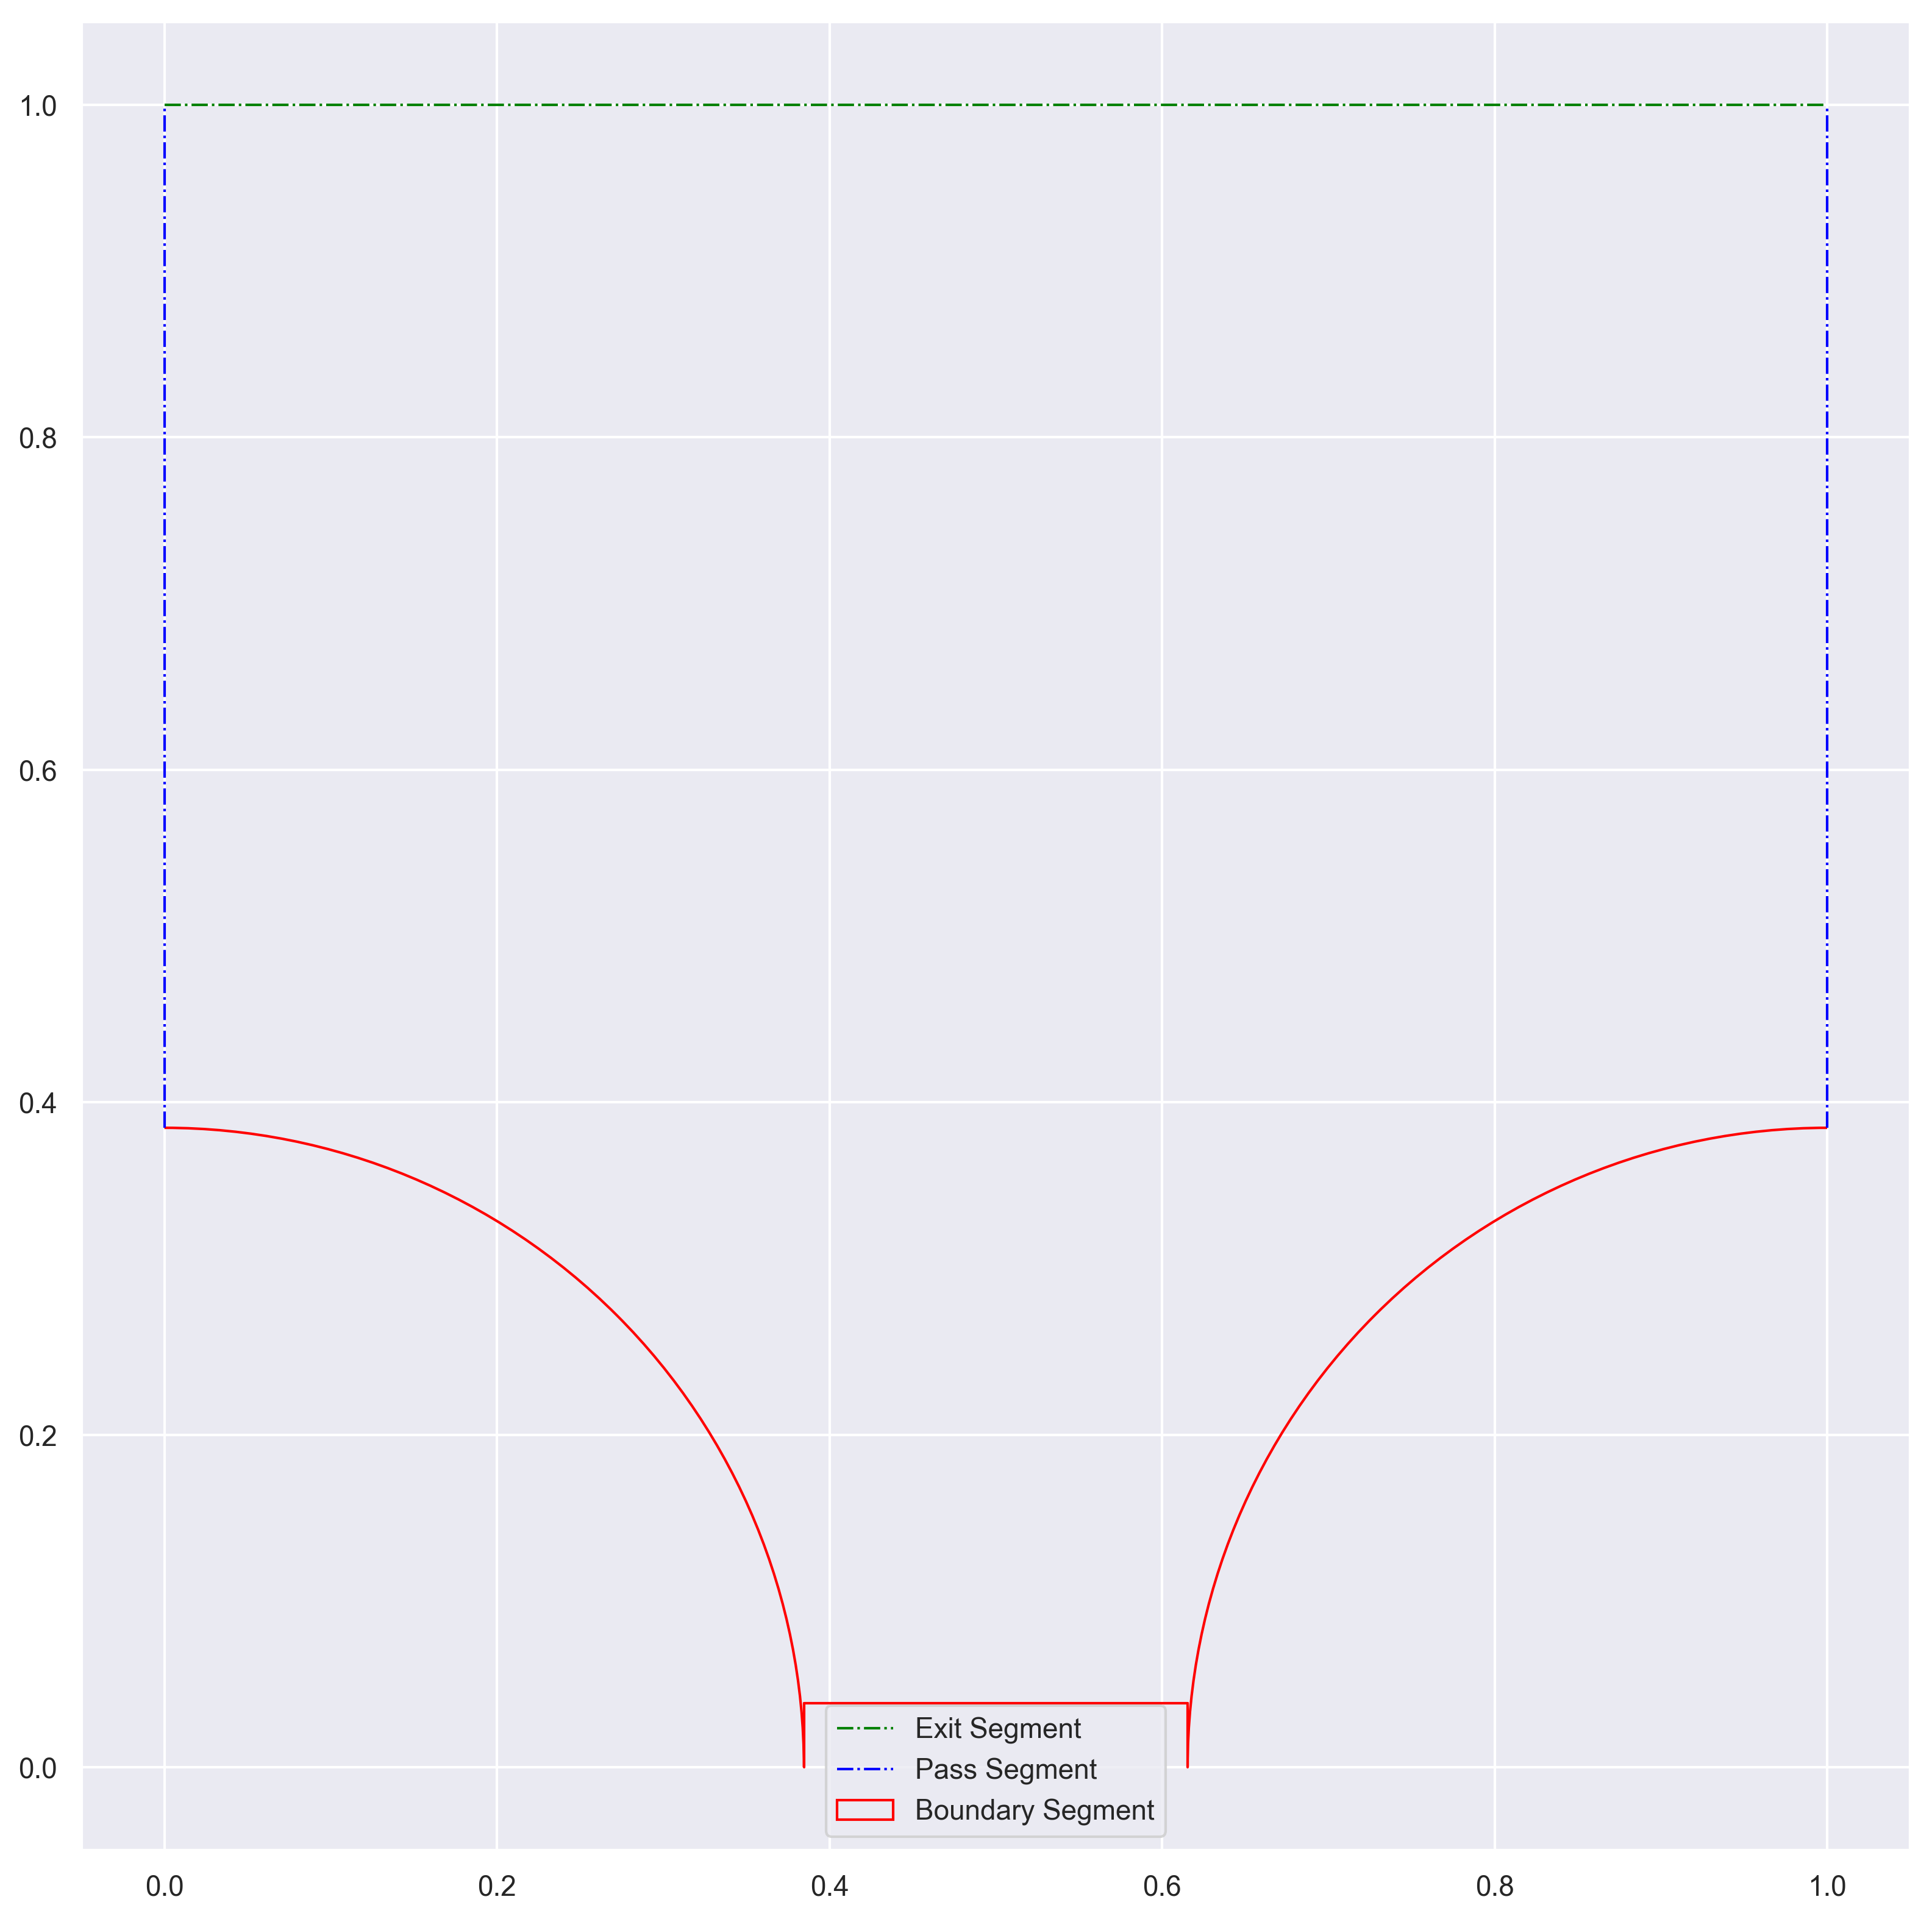

In [12]:
gbc.plot_segments(gbc.bumps_with_wall(radius_=5, wall_width_=3, wall_height_=0.5, even_=True))

In [5]:
# parameters of width
idx_no_width, idx_low_width, idx_hi_width = np.split(params, 3)

heights_ = idx_no_width[:,0]

#heights_ = (2*heights_*(1/2))/(1-heights_)

In [6]:
unit_widths_ = np.array([0, 0.01, 0.1])
arg_widths_ = (2*unit_widths_*0.5)/(1-unit_widths_)
arg_widths_

array([0.        , 0.01010101, 0.11111111])

for w_ in [0, 0.01, 0.1]:
    gbc.plot_segments(
        gbc.bumps_with_wall(
            radius_=1/2,
            wall_width_=w_,
            wall_height_=0.50))

for r in np.linspace(start=0.1, stop=0.13, num=4, endpoint=False)[1:]:
    for a in np.linspace(start=0.1, stop=0.14, num=8, endpoint=False)[1:]:
        print(f"position={round(r, 3)}, angle={round(r, 3)}")
        gbc.plot_billiard_cell(
            position_=r,
            init_angle_=a,
            boundary_=gbc.bumps_with_wall(
                    radius_=1/2,
                    wall_width_=0.1,
                    wall_height_=0.35))

In [7]:
sph_var_by_width, cha_var_by_width, gap_by_width = [], [], []
for idx_arr in np.split(np.arange(len(params)), 3):
    svar_vals_, cvar_vals_, spectral_gaps_ = [], [], []
    for P in P_stacks[idx_arr]:
        # compute the variance
        svar_ = gbc.var_from_P(P_=P, angle_bins_=theta_partition, observable_f=sph_obs)
        cvar_ = gbc.var_from_P(P_=P, angle_bins_=theta_partition,
                               observable_f=lambda x: cha_obs(x, cut=c_, rad=1/2))
        # compute the spectral gap
        spectrum = np.sort(np.real(np.linalg.eigvals(P)))
        second_eig = spectrum[-2]
        
        # write to inner array
        svar_vals_.append(svar_)
        cvar_vals_.append(cvar_)
        spectral_gaps_.append(1-second_eig)
        
    # save to array
    sph_var_by_width.append(np.array(svar_vals_))
    cha_var_by_width.append(np.array(cvar_vals_))
    gap_by_width.append(np.array(spectral_gaps_))

In [8]:
real_h = np.linspace(start=0, stop=1.8, num=11)
real_h

array([0.  , 0.18, 0.36, 0.54, 0.72, 0.9 , 1.08, 1.26, 1.44, 1.62, 1.8 ])

In [9]:
func_h = real_h/(1+0.01010101)
func_h

array([0.    , 0.1782, 0.3564, 0.5346, 0.7128, 0.891 , 1.0692, 1.2474,
       1.4256, 1.6038, 1.782 ])

In [10]:
unit_widths_ = np.array([0, 0.01, 0.1])
arg_widths_ = (2*unit_widths_*0.5)/(1-unit_widths_)
arg_widths_

array([0.        , 0.01010101, 0.11111111])

## Spectral Gap

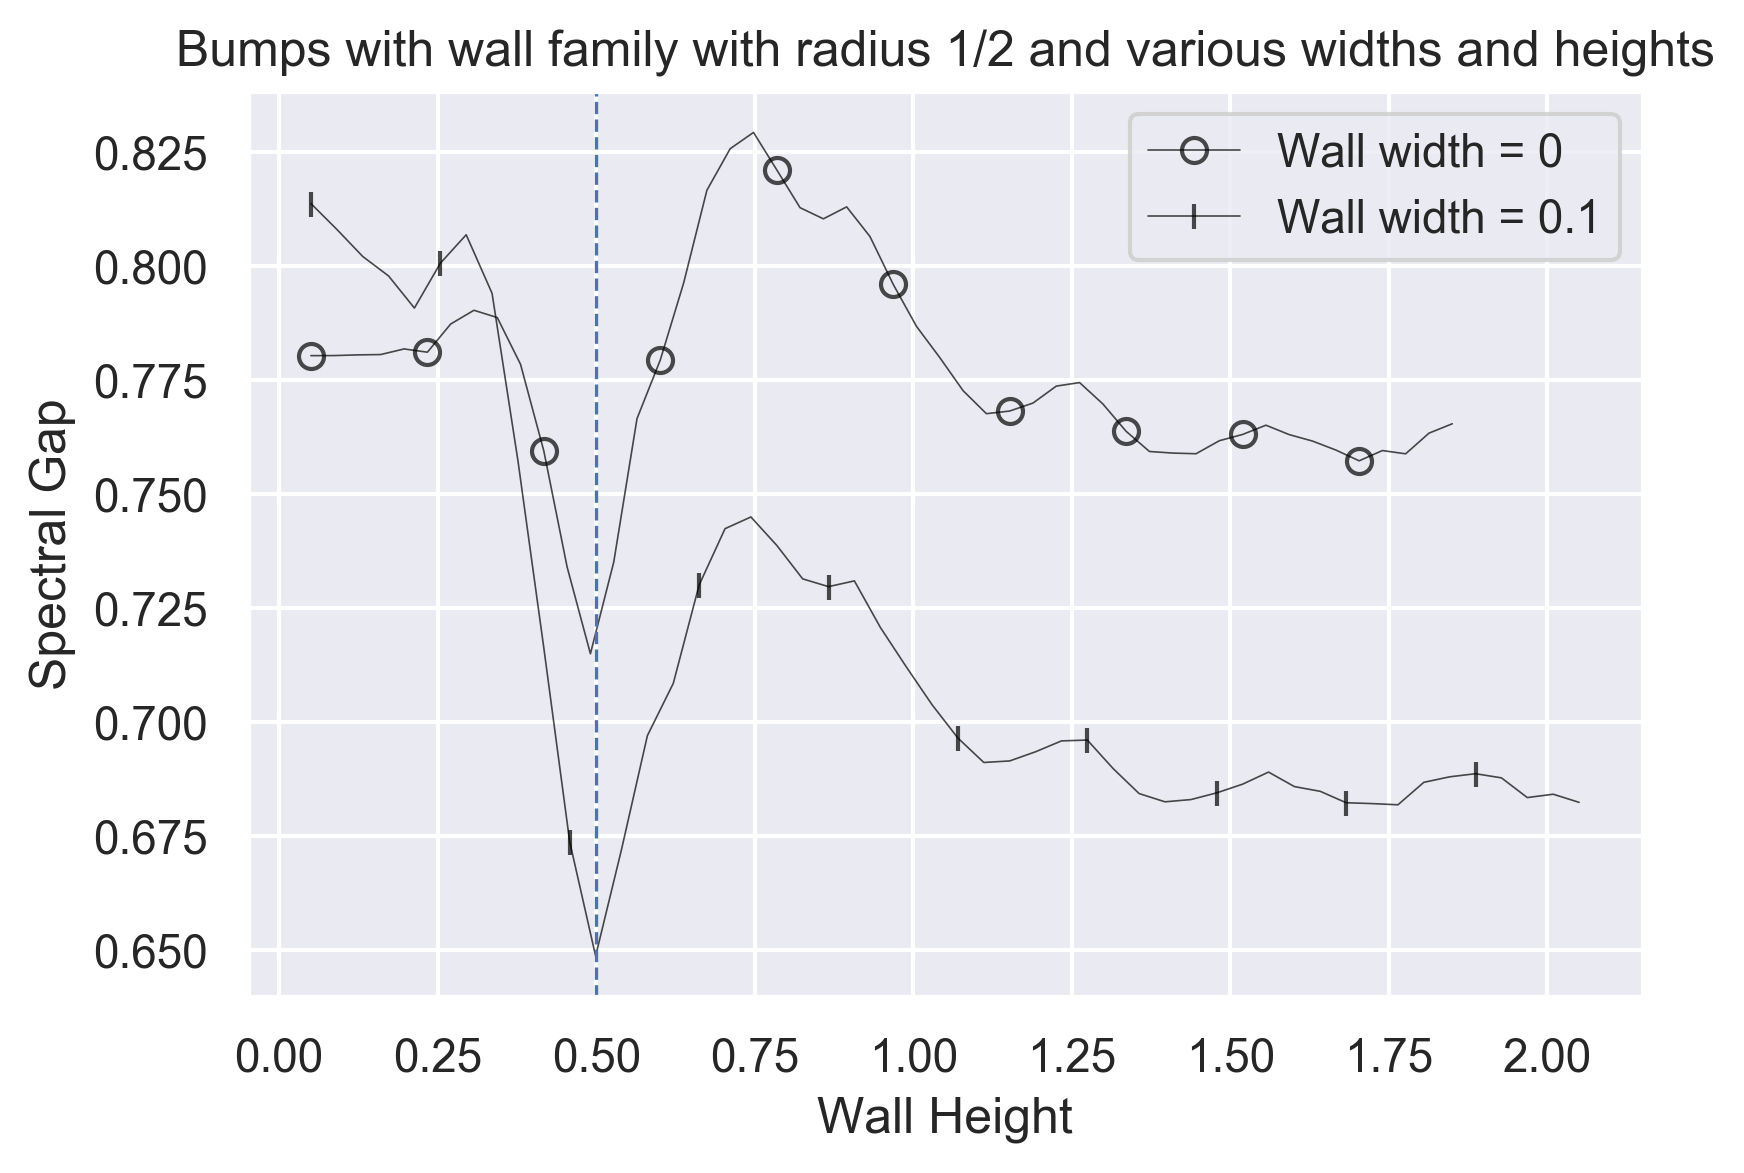

In [11]:
# spectral gap comparison
dot_label = "Sampled Points"

markers = ["1", "o", "x", "|", "_"]
m_idx = list(np.arange(len(heights_))[::5])
i_ = 0 
for gap_array in zip(gap_by_width, [0, 0.01, 0.1], [0.        , 0.01010101, 0.11111111]):
    #plt.plot(heights_, gap_array[0], '.', c="firebrick", label=dot_label)
    i_+=1
    if i_==2:
        continue
    plt.plot(
        heights_*(1+gap_array[2])+0.050,
        gap_array[0],
        label=f"Wall width = {gap_array[1]}",
        color="black",
        fillstyle="none",
        linewidth=0.4, 
        alpha=0.7,
        marker=markers[i_],
        markevery=m_idx
    )
    plt.xlabel("Wall Height")
    plt.ylabel("Spectral Gap")    
    dot_label = "_nolegend_"
plt.plot()
plt.axvline(0.5, ls="--", lw=0.8)
plt.title("Bumps with wall family with radius 1/2 and various widths and heights")
plt.legend()
#plt.savefig(filename=img_path_+"bumps_with_wall_spectralgap.eps", bbox_inches='tight')
plt.show()

In [ ]:
dot_label = "Sampled Points"

markers = ["1", "o", "x", "|", "_"]
m_idx = list(np.arange(len(heights_))[::5])
i_ = 0 
for gap_array in zip(gap_by_width, [0, 0.01, 0.1], [0.        , 0.01010101, 0.11111111]):
    #plt.plot(heights_, gap_array[0], '.', c="firebrick", label=dot_label)
    plt.plot(
        heights_*(1+gap_array[2])+0.050,
        gap_array[0],
        label=f"Wall width = {gap_array[1]}",
        color="black",
        fillstyle="none",
        linewidth=0.4, 
        alpha=0.7,
        marker=markers[i_],
        markevery=m_idx
    )
    i_+=1
    plt.xlabel("Wall Height")
    plt.ylabel("Spectral Gap")    
    dot_label = "_nolegend_"
plt.axvline(0.5, ls="--", lw=0.8)
plt.title("Bumps with wall family with radius 1/2 and various widths and heights")
plt.legend()
plt.savefig(filename=img_path_+"bumps_with_wall_spectralgap.eps", bbox_inches='tight')
plt.show()

In [ ]:
for g in gap_by_width:
    print(min(g))
    print(f"Index of min {np.argmin(g)}")
    print(f"Height at min {heights_[np.argmin(g)]}\n")

In [ ]:
gbc.plot_segments(
    gbc.bumps_with_wall(
        radius_=0.5,
        wall_width_=0,
        wall_height_=0.5,
        even_=True))

In [ ]:
dot_label = "Sampled Points"

markers = ["1", "o", "x", "|", "_"]
m_idx = list(np.arange(len(heights_))[::5])
i_ = 0 
for gap_array in zip(gap_by_width, [0, 0.01, 0.1]):
    #plt.plot(heights_, gap_array[0], '.', c="firebrick", label=dot_label)
    plt.plot(
        heights_+0.05,
        gap_array[0],
        label=f"Width = {gap_array[1]}",
        color="black",
        fillstyle="none",
        linewidth=0.4, 
        alpha=0.7,
        marker=markers[i_],
        markevery=m_idx
    )
    i_+=1
    plt.xlabel("Height")
    plt.ylabel("Spectral Gap")    
    dot_label = "_nolegend_"
plt.axvline(0.5, label="Wall Height = Bump", ls="--", lw=0.8)
plt.title("Bumps with wall family with radius 1/2 and various widths and heights")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
heights_

In [ ]:
unit_widths_ = np.array([0, 0.01, 0.1])
arg_widths_ = (2*unit_widths_*0.5)/(1-unit_widths_)
arg_widths_

In [ ]:
plt.plot(
        heights_/(1+0.01010101),
        gap_by_width[1],
        label=f"Width = 0",
        color="black",
        fillstyle="none",
        linewidth=0.4, 
        alpha=0.7,
        marker=markers[i_])
plt.xlabel("Height")
plt.ylabel("Spectral Gap")    
plt.show()

In [ ]:
plt.plot(
        heights_/(1+0.11111111),
        gap_by_width[2],
        label=f"Width = 0",
        color="black",
        fillstyle="none",
        linewidth=0.4, 
        alpha=0.7,
        marker=markers[i_])
plt.xlabel("Height")
plt.ylabel("Spectral Gap")    
plt.show()

In [ ]:
plt.plot(
        heights_,
        gap_by_width[0],
        label=f"Width = 0",
        color="black",
        fillstyle="none",
        linewidth=0.4, 
        alpha=0.7,
        marker=markers[i_])
plt.xlabel("Height")
plt.ylabel("Spectral Gap")    
plt.show()

## Variance: disk observable

The observable is $$f(x)=2x-\pi$$

In [ ]:
dot_label = "Sampled Points"
i_=0
for gap_array in zip(sph_var_by_width, [0, 0.01, 0.1], [0.        , 0.01010101, 0.11111111]):
    #plt.plot(heights_, gap_array[0], '.', c="firebrick", label=dot_label)
    plt.plot(
        heights_*(1+gap_array[2])+0.05,
        gap_array[0],
        label=f"Width = {gap_array[1]}",
        linewidth=0.4,
        fillstyle="none",
        alpha=0.7,
        color="black",
        marker=markers[i_],
        markevery=m_idx
    )
    i_+=1
    dot_label = "_nolegend_"
    
plt.axvline(0.5, label="Wall Height = Bump Height", ls="--", lw=0.8)        
plt.xlabel("Height")
plt.ylabel("Variance (disk)")   
plt.title("Bumps with wall family with radius 1/2 and various widths and heights")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Variance: channel observable

The observable is 
    $$f(x, r, c)=2r\cot(x),$$
where $r$ is the radius of the channel and $c$ is the maximum distance we cut. Here we take $r=1/2$ and $c=7$. 

In [ ]:
dot_label = "Sampled Points"
i_=0
for gap_array in zip(cha_var_by_width, [0, 0.01, 0.1]):
    #plt.plot(heights_, gap_array[0], '.', c="firebrick", label=dot_label)
    plt.plot(
        heights_,
        gap_array[0]/17,
        label=f"Wall width = {gap_array[1]}",
        linewidth=0.4,
        fillstyle="none",
        alpha=0.7,
        color="black",
        marker=markers[i_],
        markevery=m_idx
    )
    i_+=1
    #plt.axvline(0.278, label="Wall Height > Bump", ls="--", lw=0.8)    
    dot_label = "_nolegend_"
    
plt.axvline(0.5, ls="--", lw=0.8)    
plt.xlabel("Wall height")
plt.ylabel("Accomodation coefficient")   
plt.title("Bumps with wall family with radius 1/2 and various widths and heights")
plt.legend()

plt.savefig(filename=img_path_+"bumps_with_wall_vardisk.eps", bbox_inches='tight')
plt.show()

## Both Variance and Spectral Gap

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Distance between bumps, h')
ax1.set_ylabel('Spectral Gap')

ax1.plot(
    heights_,
    gap_by_width[0],
    color="black",
    label="Spectral Gap"
)
ax1.tick_params(axis='y', labelcolor="black")
ax1.legend(loc='center left')



ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.grid(False)

color = 'tab:blue'
ax2.set_ylabel('Variance')  # we already handled the x-label with ax1
ax2.plot(
    heights_,
    sph_var_by_width[0],
    color="black", 
    ls="-.",
    label="Variance"
)
ax2.tick_params(axis='y', labelcolor="black")
ax2.legend(loc='center right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title("Spectral gap and variance for bumps with wall")

plt.show()

# Bumps: constant height, but vary width

In [ ]:
#---first values---#
P_stacks = np.load(wall_family_W + "p_mats.npy", allow_pickle=False)
params = np.load(wall_family_W + "keys.npy", allow_pickle=False)
theta_partition = np.load(wall_family_W + "theta_partition.npy", allow_pickle=False)

In [ ]:
widths_W = params[:,2]

In [ ]:
sph_var_W, cha_var_W, gap_W = [], [], []
for P in P_stacks:
    # compute the variance
    svar_ = gbc.var_from_P(P_=P, angle_bins_=theta_partition, observable_f=sph_obs)
    cvar_ = gbc.var_from_P(P_=P, angle_bins_=theta_partition,
                           observable_f=lambda x: cha_obs(x, cut=c_, rad=1/2))
    # compute the spectral gap
    spectrum = np.sort(np.real(np.linalg.eigvals(P)))
    second_eig = spectrum[-2]

    # write to inner array
    sph_var_W.append(svar_)
    cha_var_W.append(cvar_)
    gap_W.append(1-second_eig)

In [ ]:
acc_coeff_bumpsw = np.array(sph_var_W)/(np.pi**2-8)

# Spectral Gap

In [ ]:
dot_label = "Sampled Points"

#plt.plot(widths_W, gap_W, '.', c="firebrick", label=dot_label)
plt.plot(
    widths_W,
    gap_W,
    color="black"
)
#plt.axvline(0.278, label="Wall Height > Bump", ls="--", lw=0.8)

plt.xlabel(r"Wall width $W$")
plt.ylabel("Spectral Gap")    
    
plt.title("Bumps with wall at a fixed height.")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(filename=img_path_+"bumps_width_spectralgap.eps", bbox_inches='tight')
plt.show()


## Accommodation Coefficient: channel observable

The observable is 
    $$f(x, r, c)=2r\cot(x),$$
where $r$ is the radius of the channel and $c$ is the maximum distance we cut. Here we take $r=1/2$ and $c=7$. 

In [ ]:
dot_label = "Sampled Points"


#plt.plot(widths_W, cha_var_W, '.', c="firebrick", label=dot_label)
plt.plot(
    widths_W,
    np.array(cha_var_W)/17.2,
    color="black",
    label="Accommodation coefficient",
    lw=0.8,
    marker="*",
    markevery=list(np.arange(len(widths_W))[::5])
)

#plt.plot(widths_W, (1+widths_W)/(1-widths_W), label=r"$\frac{1+{W}}{1-{W}}$")

s=1
p=4
plt.plot(
    widths_W,
    (1+s*widths_W**p)/(1-s*widths_W**p),
    label=r"$\frac{1+W^{4}}{1-W^{4}}$",
    ls="-.",
    lw=0.8,
    color="black"
)

#plt.axvline(0.278, label="Wall Height > Bump", ls="--", lw=0.8)    
dot_label = "_nolegend_"
    
plt.xlabel(r"Wall width $W$")
#plt.ylabel("")   
plt.title("Bumps with wall at a fixed height.")
plt.legend()
plt.savefig(filename=img_path_+"bumps_width_varchannel.eps", bbox_inches='tight')
plt.show()

# Wall Over Bumps

In [59]:
#gbc.plot_segments(gbc.wall_over_bumps(radius_=0.99, wall_width_=0.6, wall_height_=3.8))

In [60]:
#---first values---#
P_stacks = np.load(wall_over_bumps + "p_mats.npy", allow_pickle=False)[::-1]
params = np.load(wall_over_bumps + "keys.npy", allow_pickle=False)
theta_partition = np.load(wall_over_bumps + "theta_partition.npy", allow_pickle=False)

In [61]:
widths_W = params[:,2]

lm_ = -4
widths_W = widths_W[:lm_]

In [62]:
sph_var_W, cha_var_W, gap_W = [], [], []
for P in P_stacks:
    # compute the variance
    svar_ = gbc.var_from_P(P_=P, angle_bins_=theta_partition, observable_f=sph_obs)
    cvar_ = gbc.var_from_P(P_=P, angle_bins_=theta_partition,
                           observable_f=lambda x: cha_obs(x, cut=c_, rad=1/2))
    # compute the spectral gap
    spectrum = np.sort(np.real(np.linalg.eigvals(P)))
    second_eig = spectrum[-2]

    # write to inner array
    sph_var_W.append(svar_)
    cha_var_W.append(cvar_)
    gap_W.append(1-second_eig)
sph_var_W, cha_var_W, gap_W = sph_var_W[:lm_], cha_var_W[:lm_], gap_W[:lm_]

In [63]:
acc_coef_wallbumps = np.array(sph_var_W)/(np.pi**2-8)
acc_coeff_channel_WB = np.array(cha_var_W)/knudsen_channel

# Spectral Gap

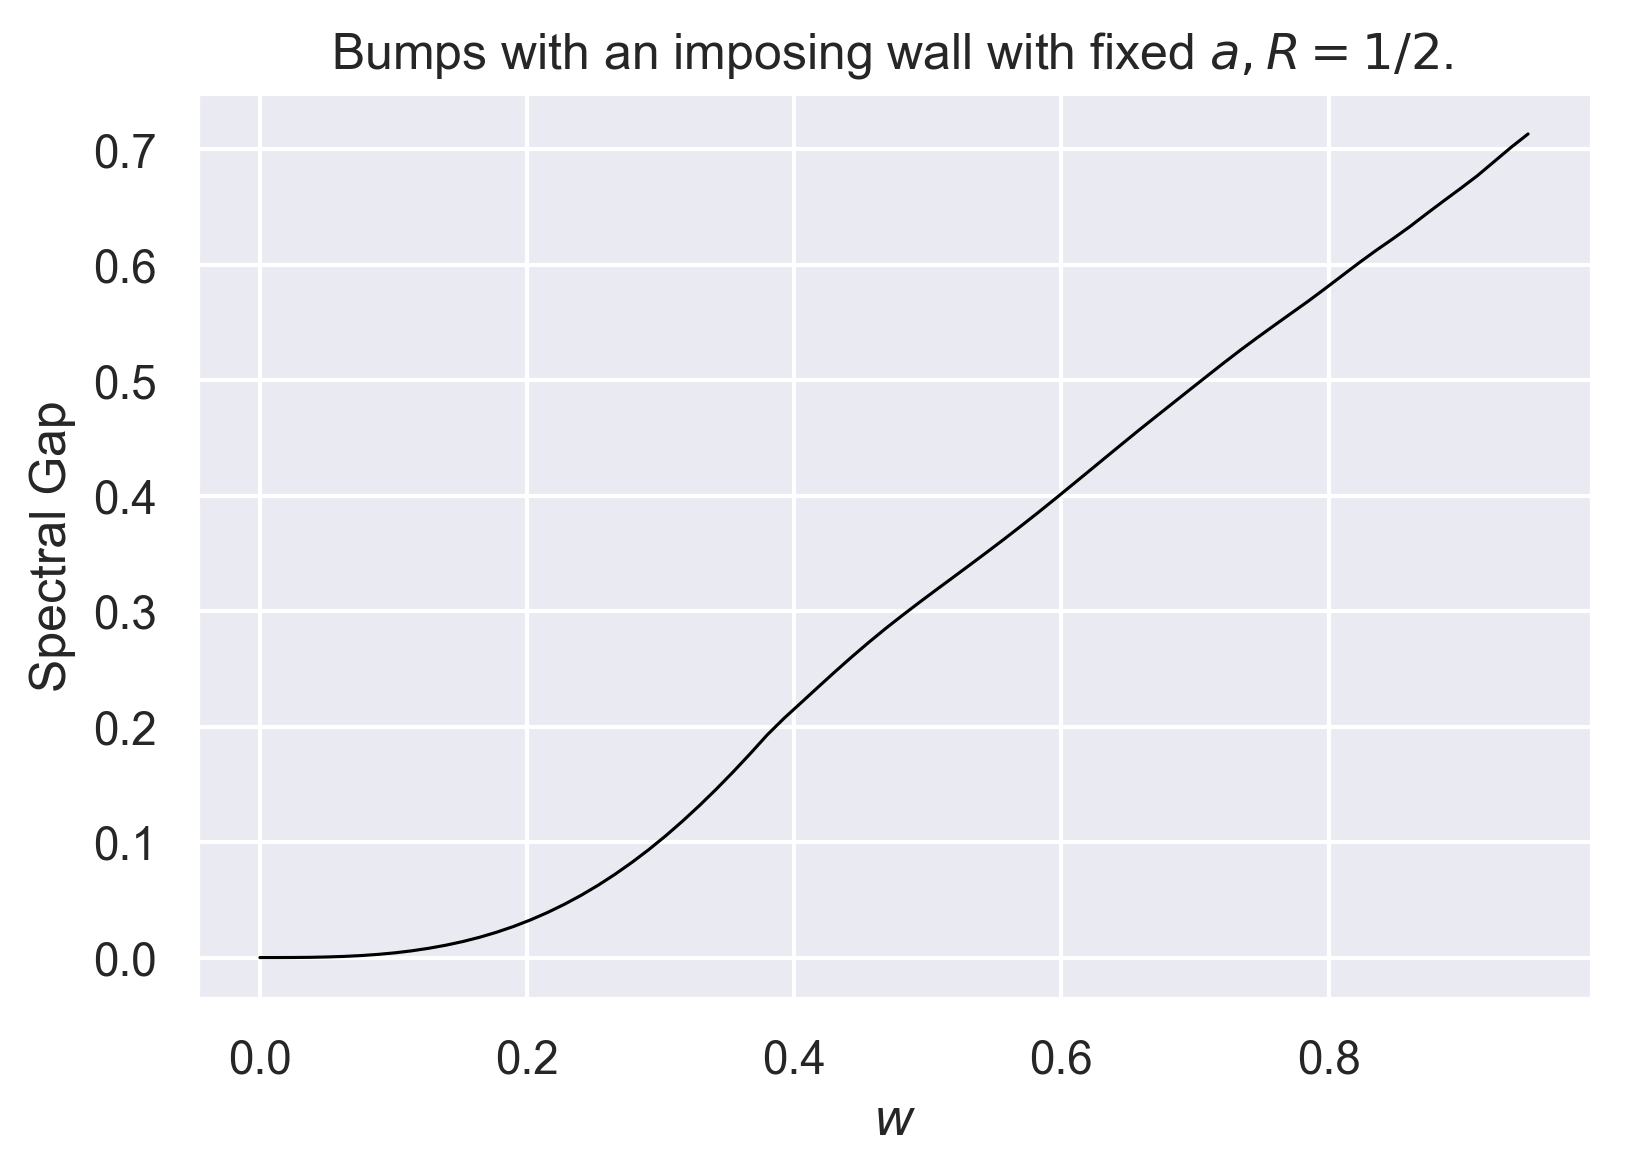

In [64]:
dot_label = "Sampled Points"

#plt.plot(widths_W, gap_W, '.', c="firebrick", label=dot_label)
plt.plot(
    widths_W,
    gap_W,
    color="black",
    lw=0.75
)
#plt.axvline(0.278, label="Wall Height > Bump", ls="--", lw=0.8)

plt.xlabel(r"$w$")
plt.ylabel("Spectral Gap")    
    
plt.title(r"Bumps with an imposing wall with fixed $a, R = 1/2$. ")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(filename=img_path_+"bumps_wallover_spectralgap.eps", bbox_inches='tight')
plt.show()


## Accommodation Coefficient: channel observable

The observable is 
    $$f(x, r, c)=2r\cot(x),$$
where $r$ is the radius of the channel and $c$ is the maximum distance we cut. Here we take $r=1/2$ and $c=7$. 

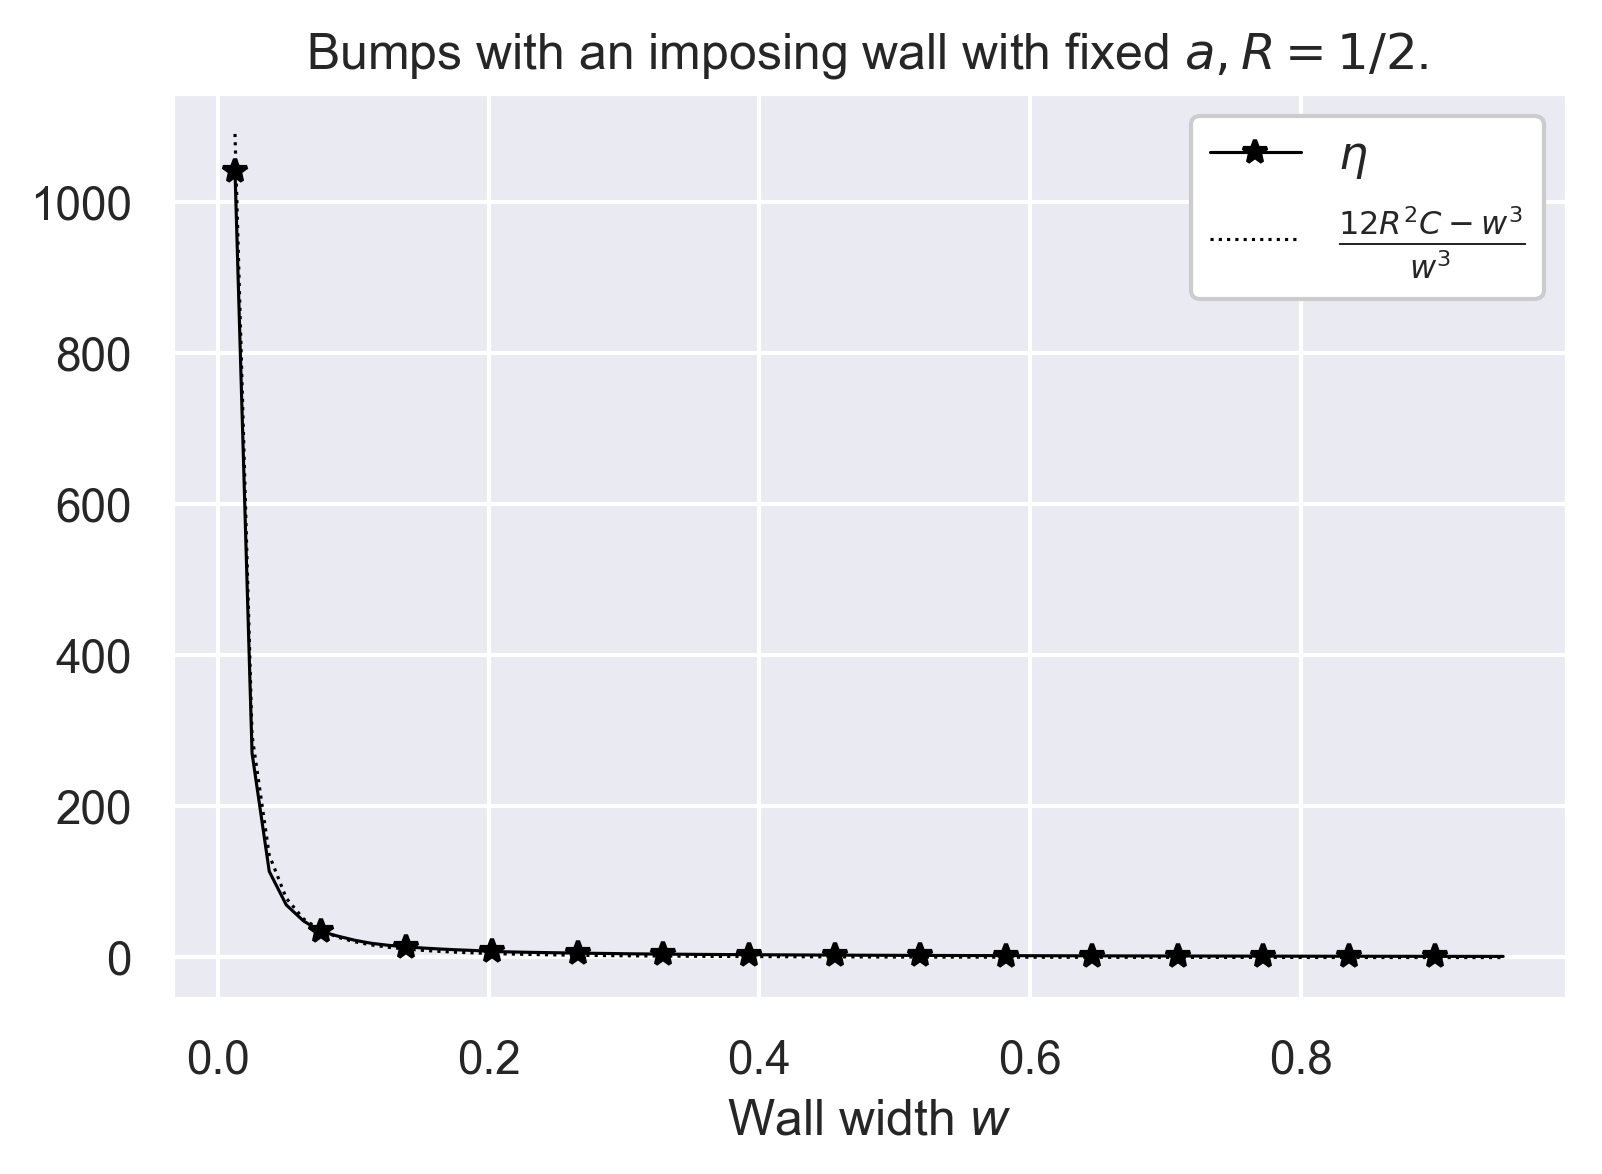

In [45]:
dot_label = "Sampled Points"


plt.plot(
    widths_W[1:],
    acc_coeff_channel_WB[1:],
    marker="*",
    markevery=5,
    color="black",
    label=r"$\eta$",
    lw=0.75
)

s=1.2
p=1

T = ((widths_W)**1.9)#+ 3*widths_W
guess = ((3/knudsen_channel)- T)/T
#guess = ((3/knudsen_channel)-((1-widths_W)**3))/((1-widths_W)**3)

# plt.plot(
#     widths_W,
#     (1+(s*widths_W)**p)/(1-(s*widths_W)**p),
#     color="black", label="guess", ls="--")

plt.plot(
    widths_W,
    guess,
    color="black",
    label=r"$\frac{12R^2C-w^3}{w^3}$",
    ls=":",
    lw=0.75
)


dot_label = "_nolegend_"
    
plt.xlabel(r"Wall width $w$")
#plt.ylabel("Accomodation coefficient")   
plt.title(r"Bumps with an imposing wall with fixed $a, R = 1/2$. ")
plt.legend(facecolor="white", framealpha=1)
plt.savefig(filename=img_path_+"bumps_wallover_varchannel.eps", bbox_inches='tight')
plt.show()

# Small Curvature: semicircles focusing

In [4]:
P_stacks = np.load(semicirc_focus_family + "p_mats.npy", allow_pickle=False)[::-1]
params = np.load(semicirc_focus_family + "keys.npy", allow_pickle=False)
theta_partition = np.load(semicirc_focus_family + "theta_partition.npy", allow_pickle=False)

In [5]:
F = cha_obs(x=theta_partition, rad=1/2, cut=c_)

In [6]:
gbc.inner_prod(F, F), knudsen_channel

(6.726534048373699, 11.012925506640414)

In [7]:
cn_ = 2

gap_widths = params[cn_:]

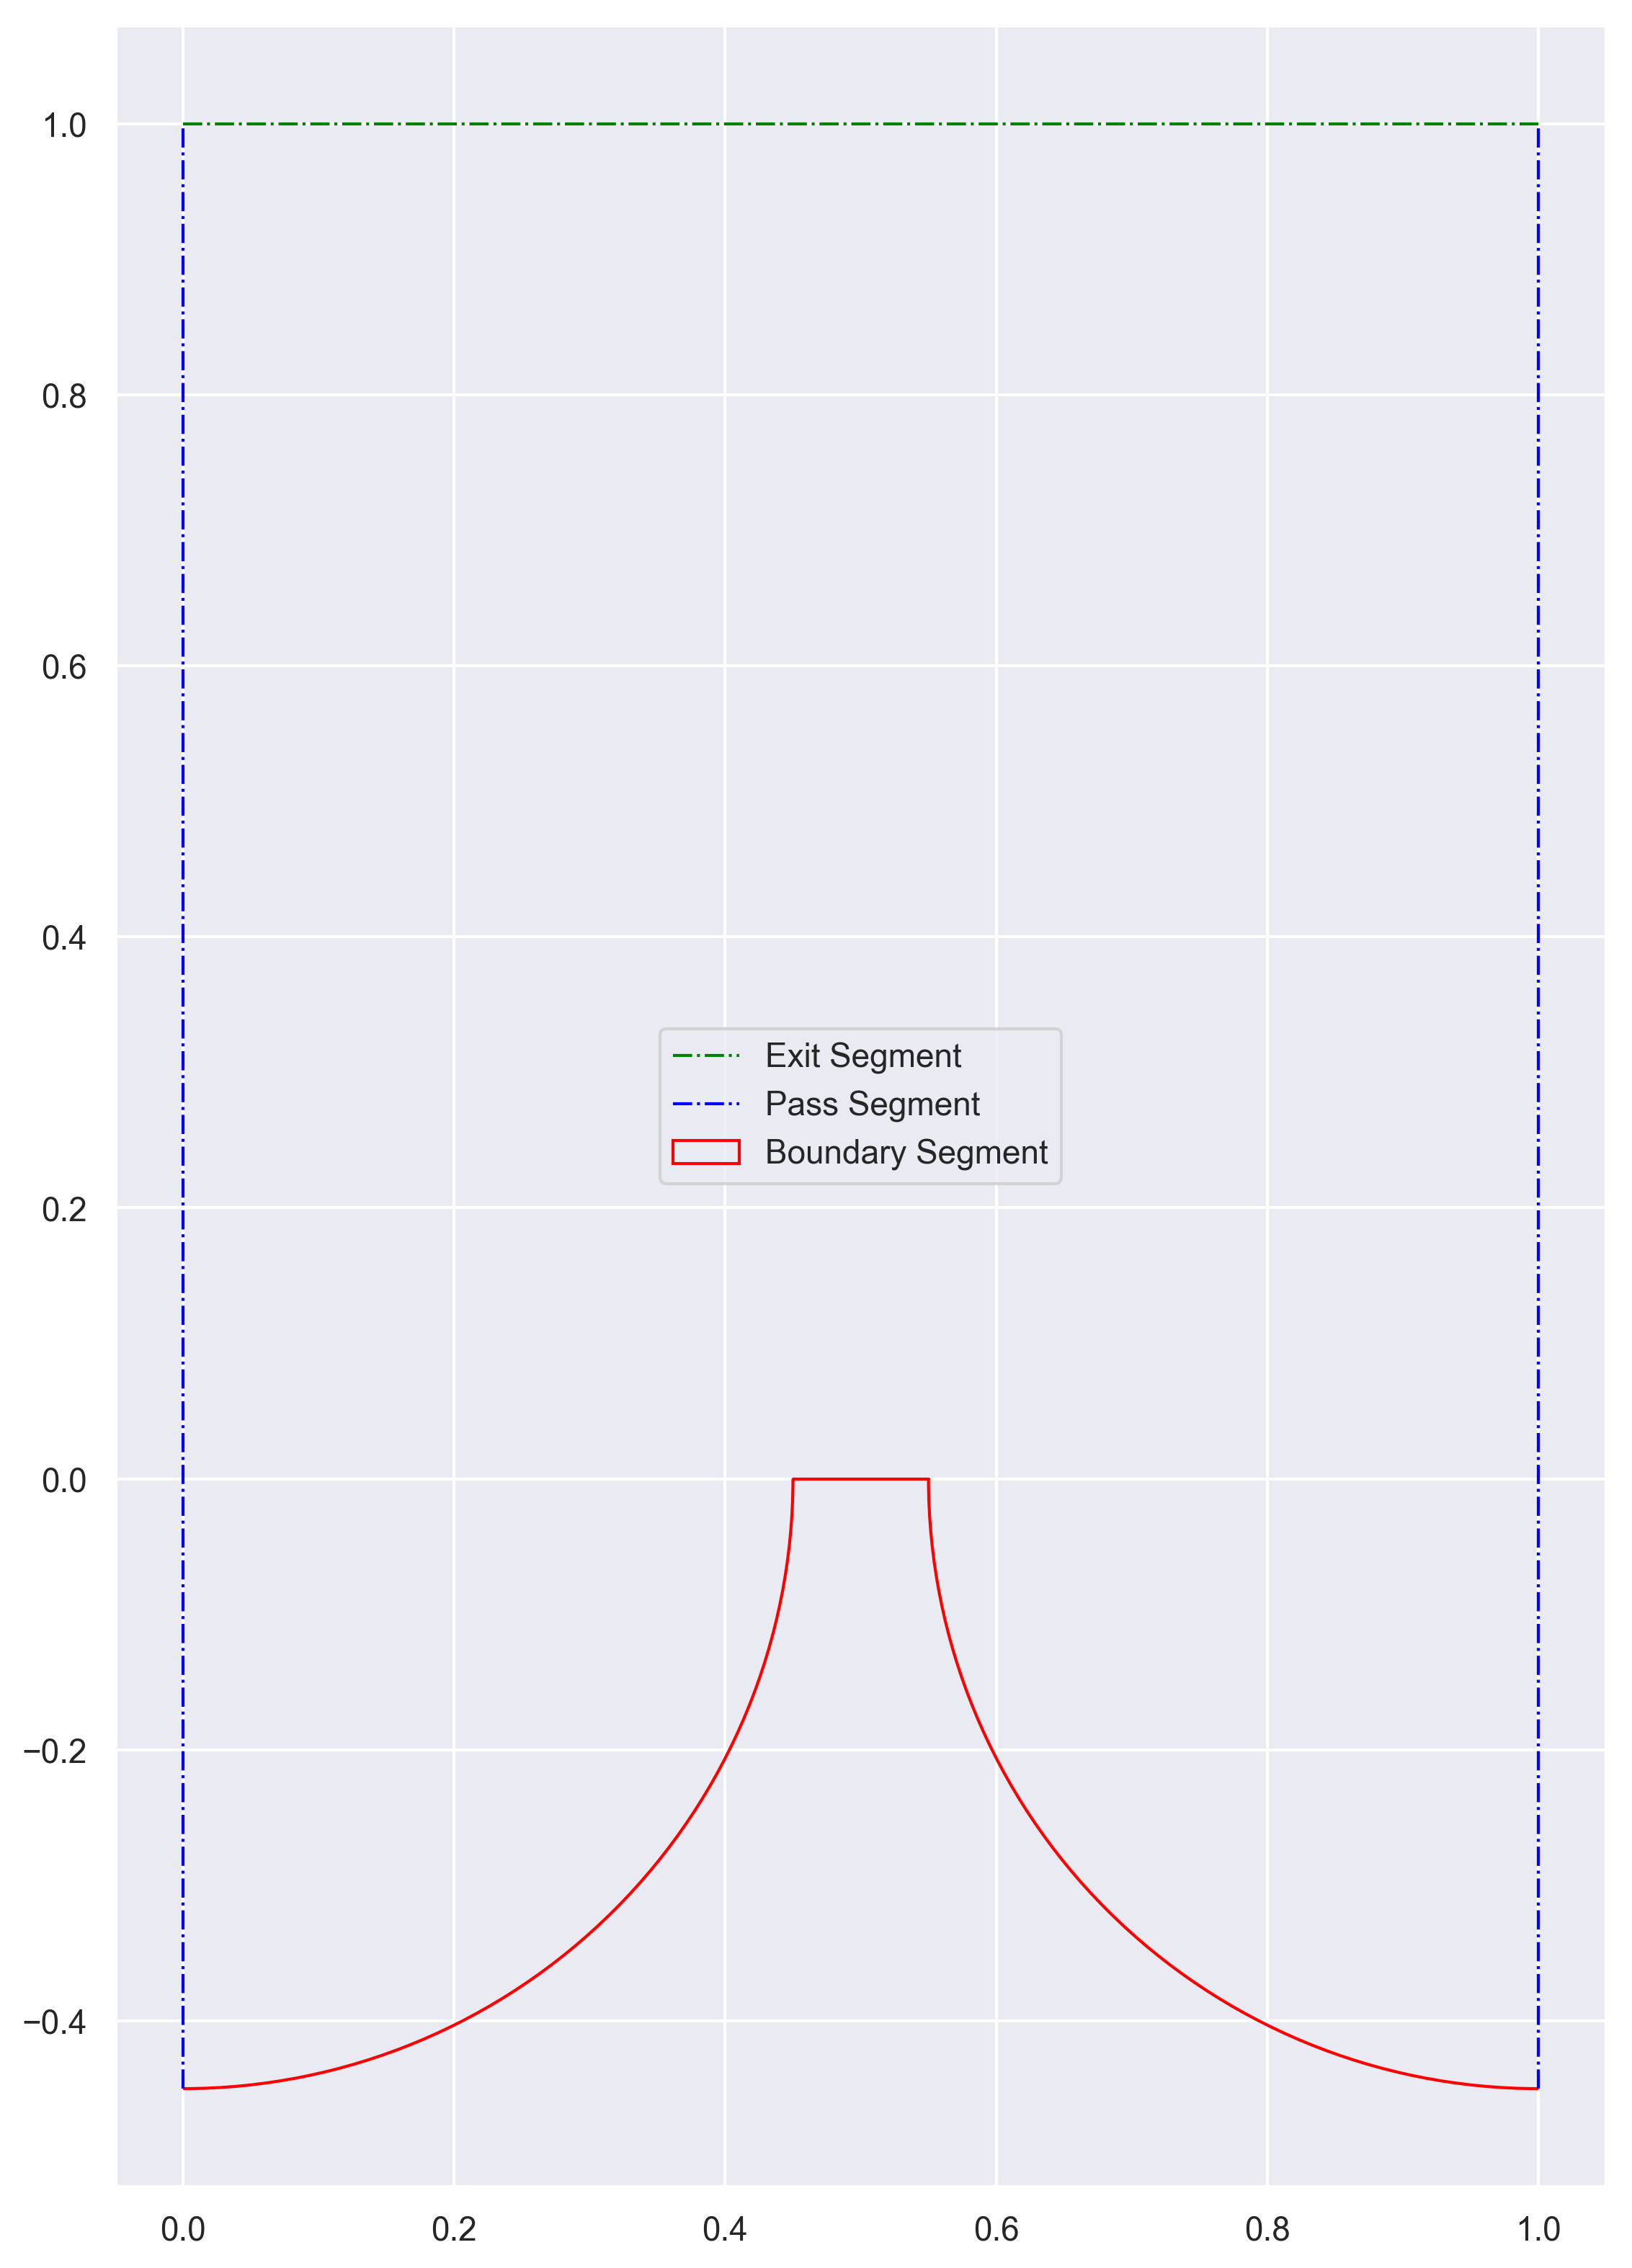

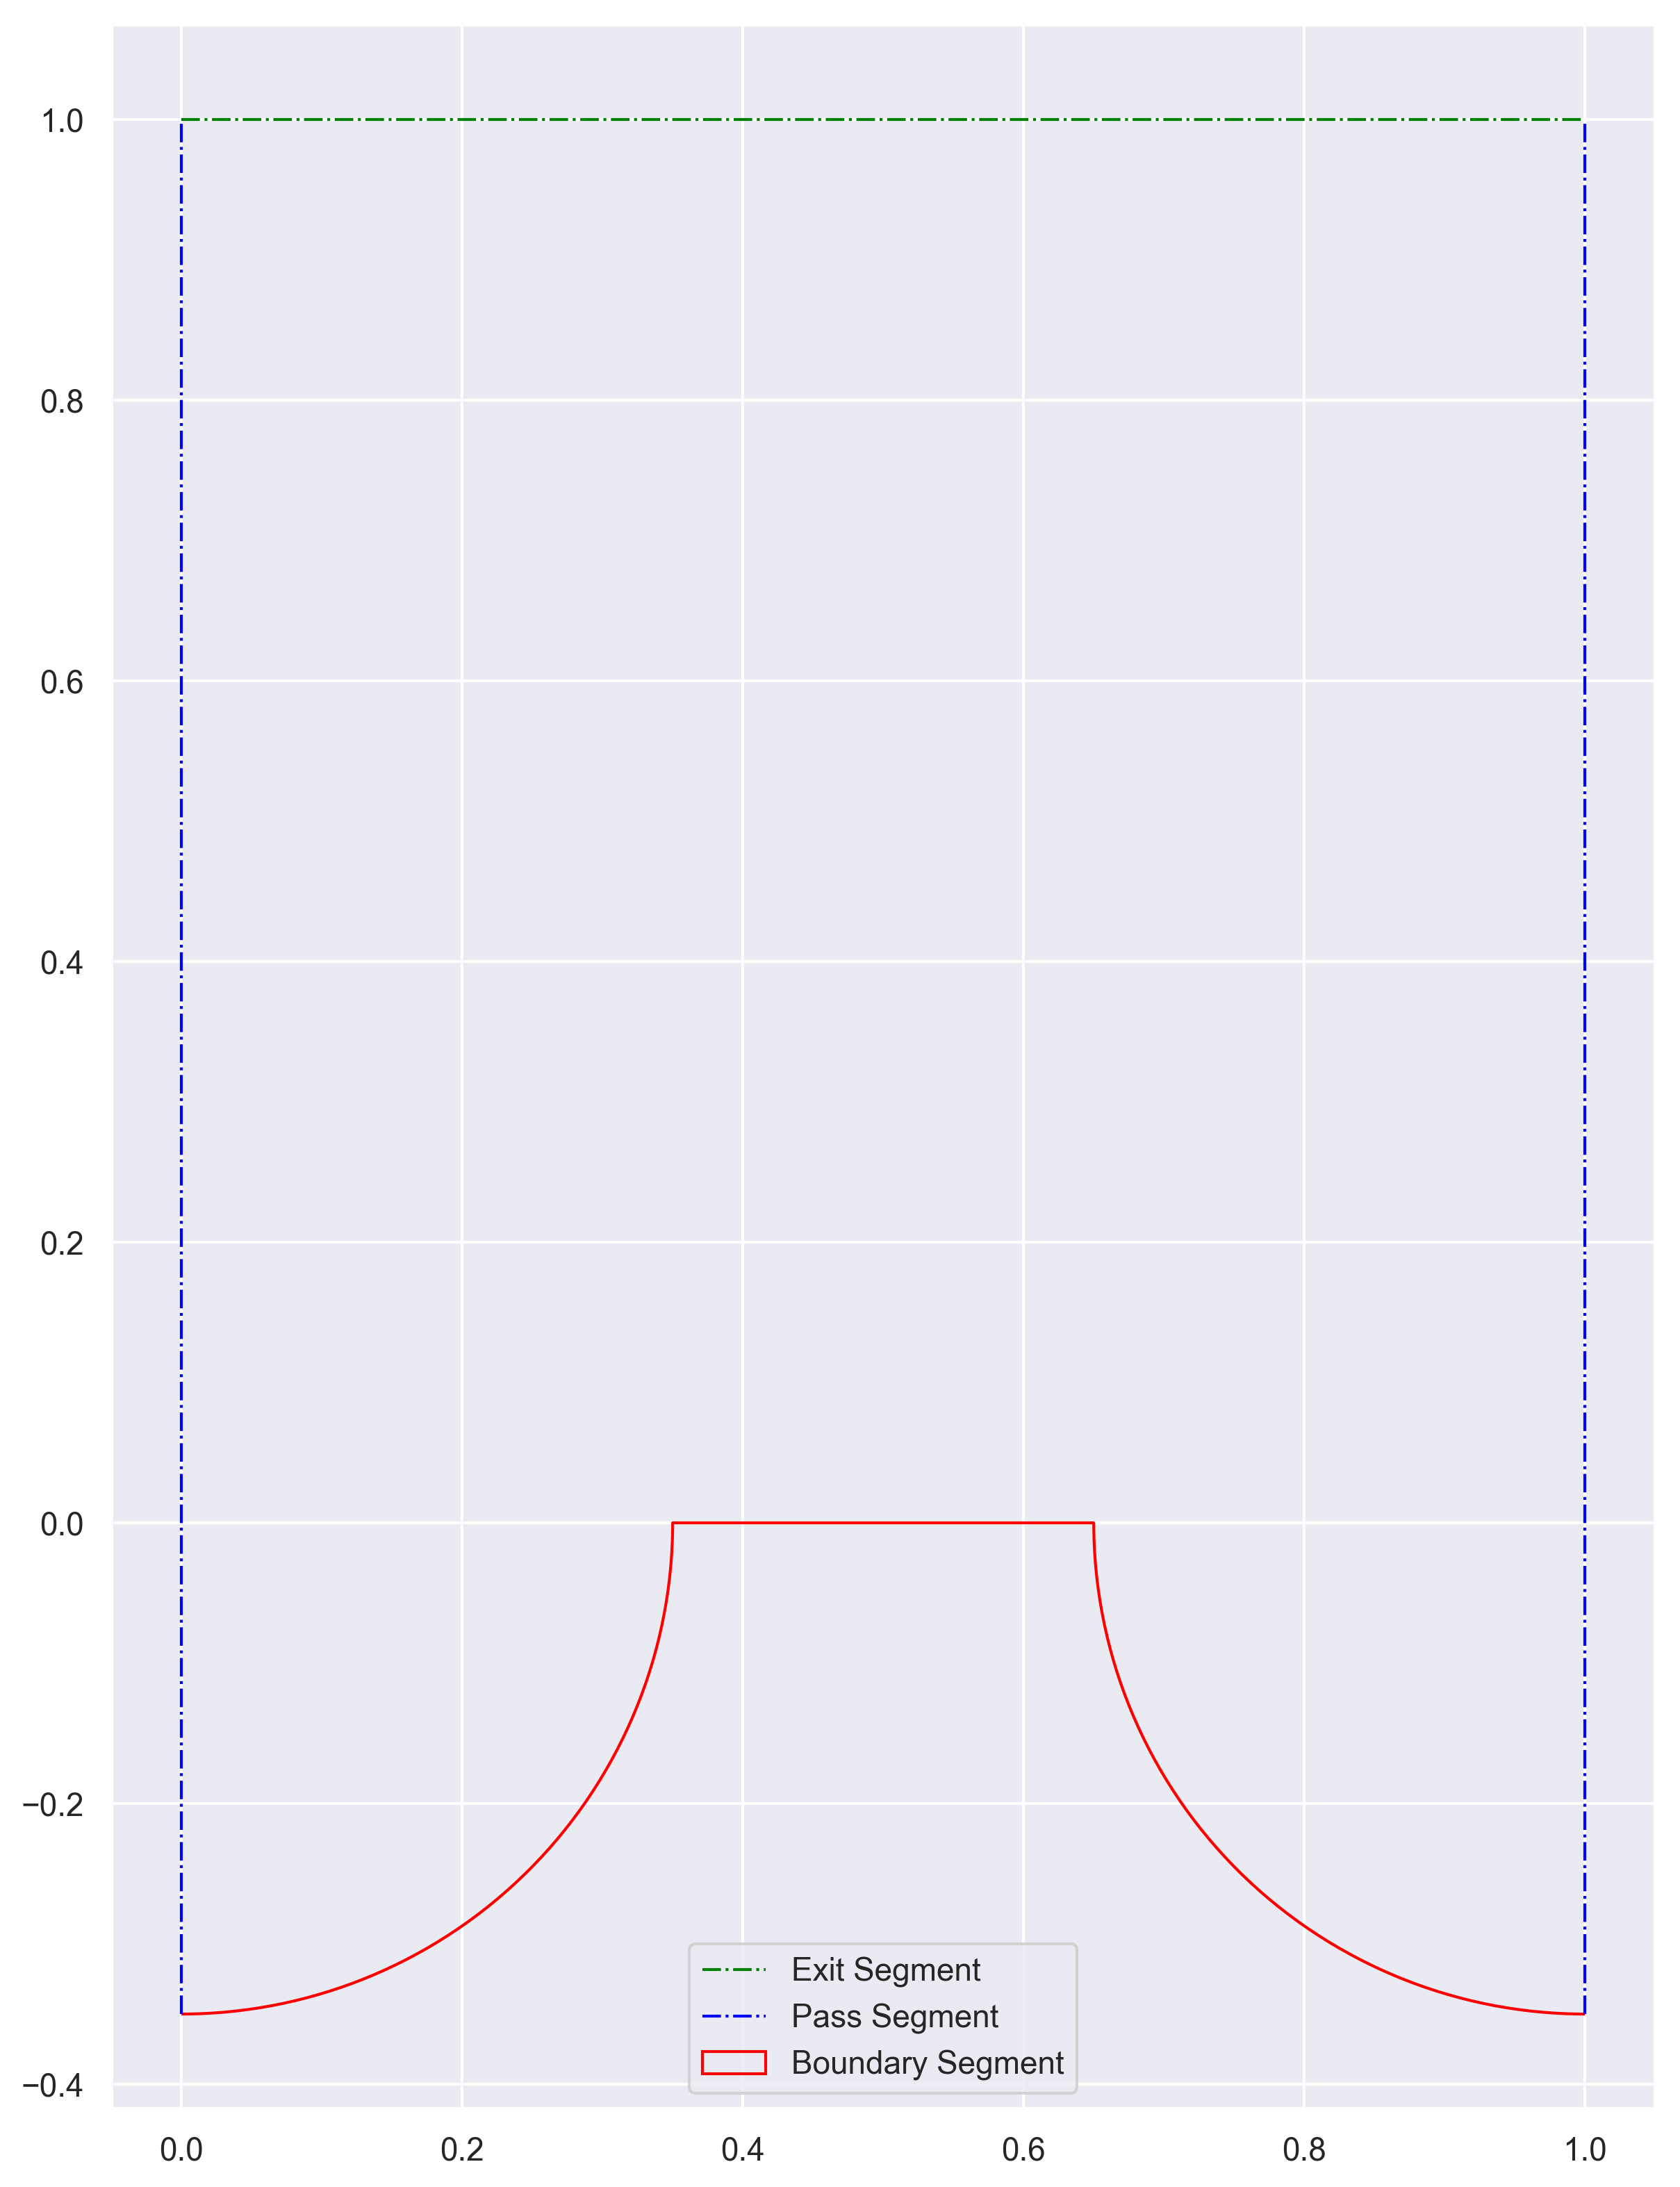

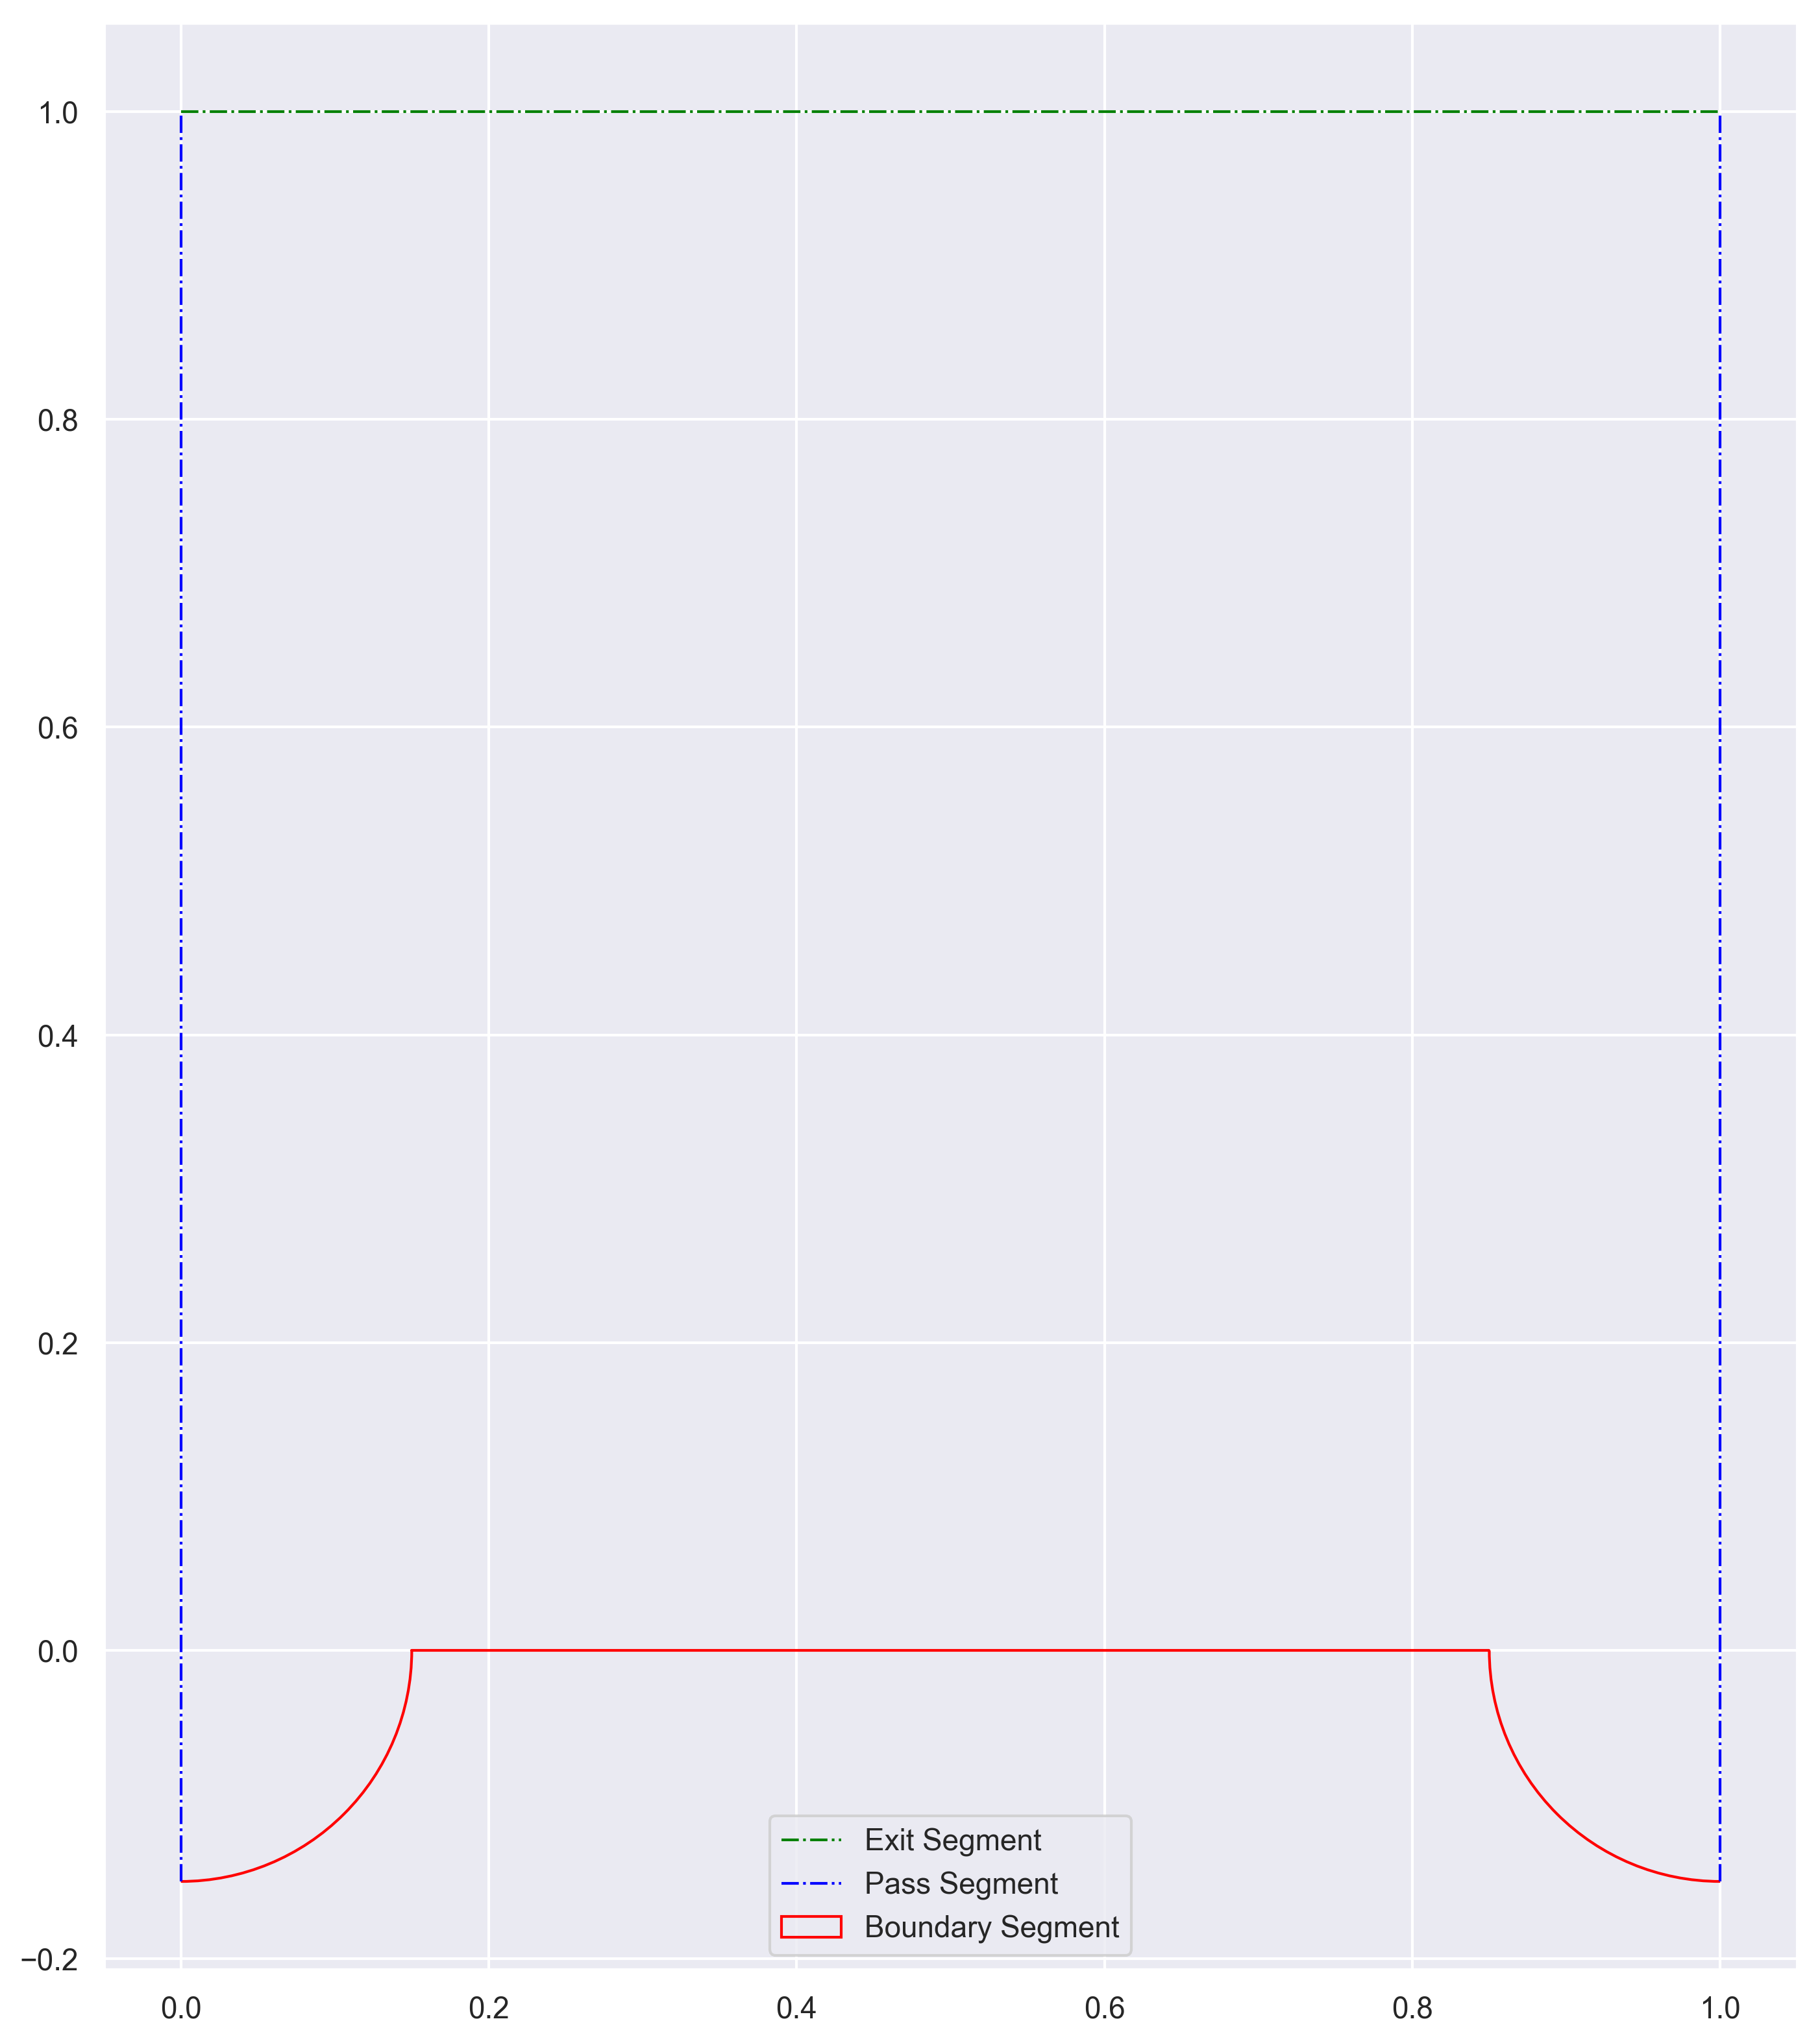

In [8]:
for h_ in [0.1, 0.3, 0.7]:
    gbc.plot_segments(
        gbc.semicircle_focus_family(gap_=h_))

In [9]:
cvar_for_holes, gaps_for_holes = [], []
for P in P_stacks:
    # compute the variance
    cvar_ = gbc.var_from_P(P_=P, angle_bins_=theta_partition,
                       observable_f=lambda x: cha_obs(x, cut=c_, rad=1/2))

    # compute the spectral gap
    spectrum = np.sort(np.real(np.linalg.eigvals(P)))
    second_eig = spectrum[-2]

    # write to array
    cvar_for_holes.append(cvar_)
    gaps_for_holes.append(1-second_eig)

In [10]:
cvar_for_holes, gaps_for_holes = cvar_for_holes[cn_:], gaps_for_holes[cn_:]

In [11]:
c_acc_coef_sfocus = np.array(cvar_for_holes)/knudsen_channel

## Spectral Gap

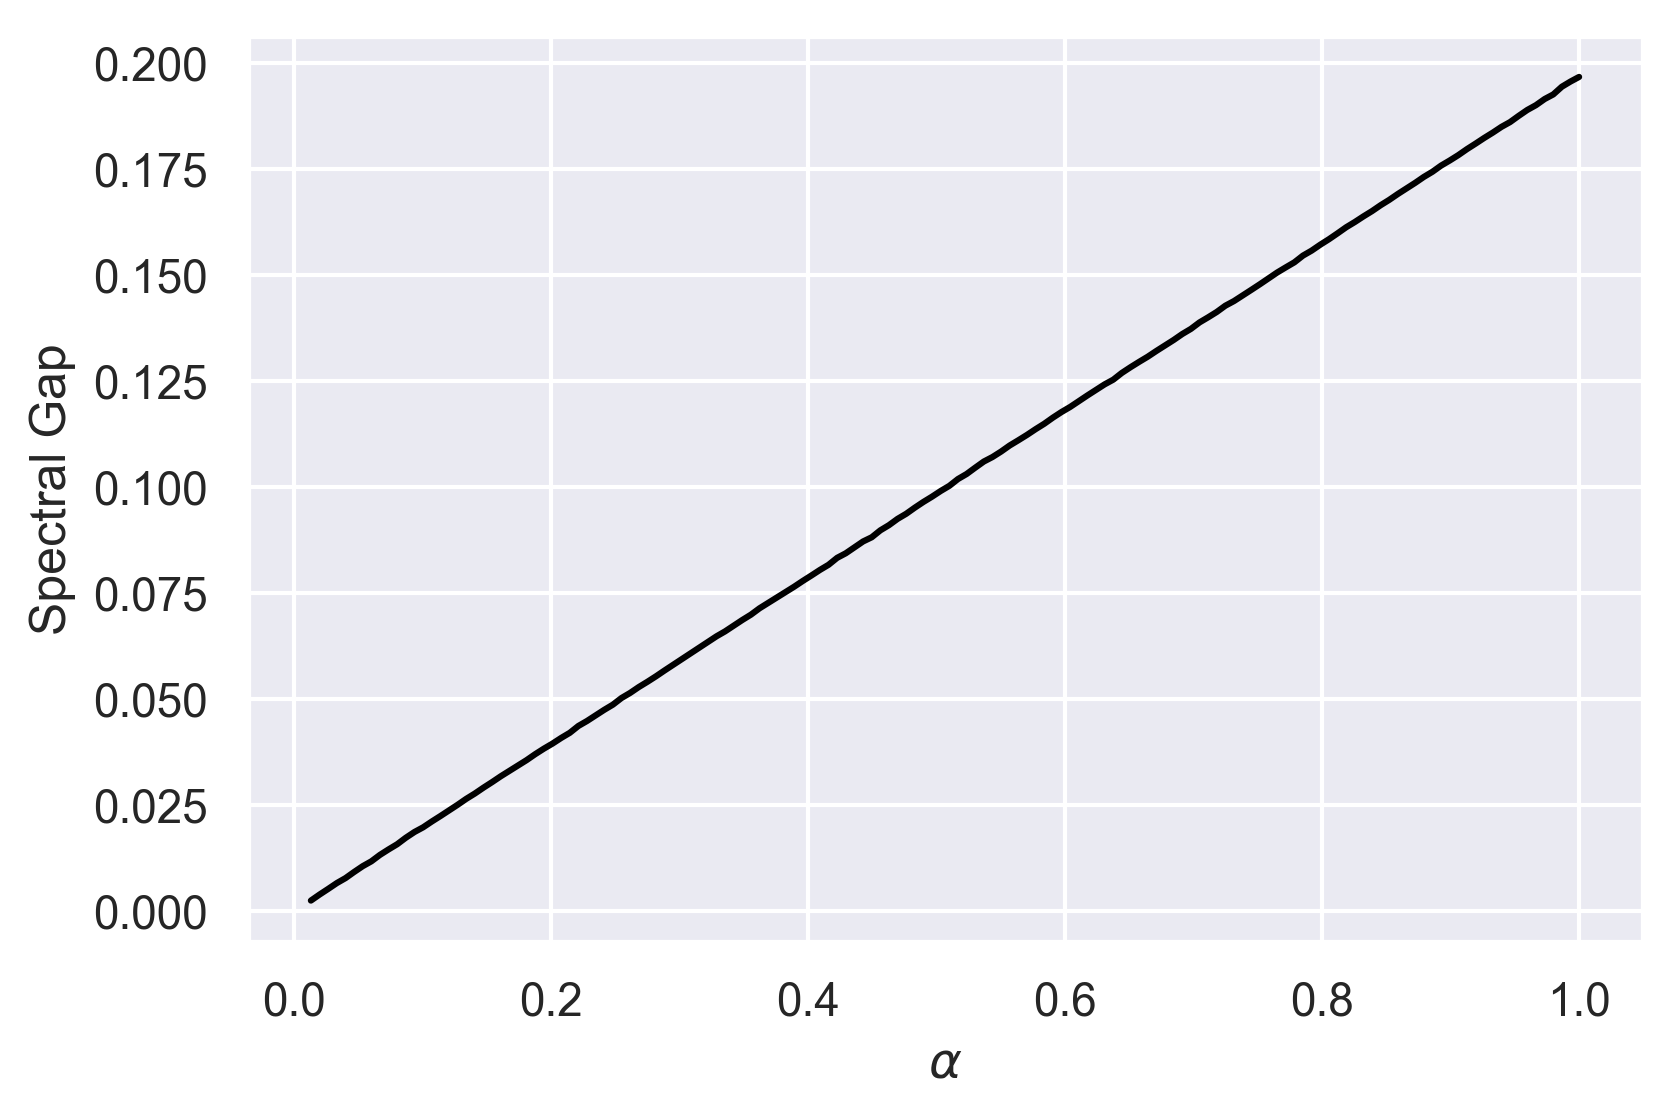

In [12]:
dot_label = "Sampled Points"

#plt.plot(gap_widths, gaps_for_holes, '.', c="firebrick", label=dot_label)
plt.plot(gap_widths, gaps_for_holes, color="black")
#plt.axvline(0.278, label="Wall Height > Bump", ls="--", lw=0.8)

plt.xlabel(r"$\alpha$")
plt.ylabel("Spectral Gap")    
    
#plt.title("Focusing bumps with flat component")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig(filename=img_path_+"semicirclefocus_spectralgap.eps", bbox_inches='tight')

plt.show()

## Accomodation Coefficient: disk observable

The observable is $$f(x)=2x-\pi$$

In [13]:
k_ = .96
g_ = ((gap_widths*k_)+1)/(1-(gap_widths*k_))


## Accomodation Coefficient: channel observable

The observable is 
    $$f(x, r, c)=2r\cot(x),$$
where $r$ is the radius of the channel and $c$ is the maximum distance we cut. Here we take $r=1/2$ and $c=7$. 

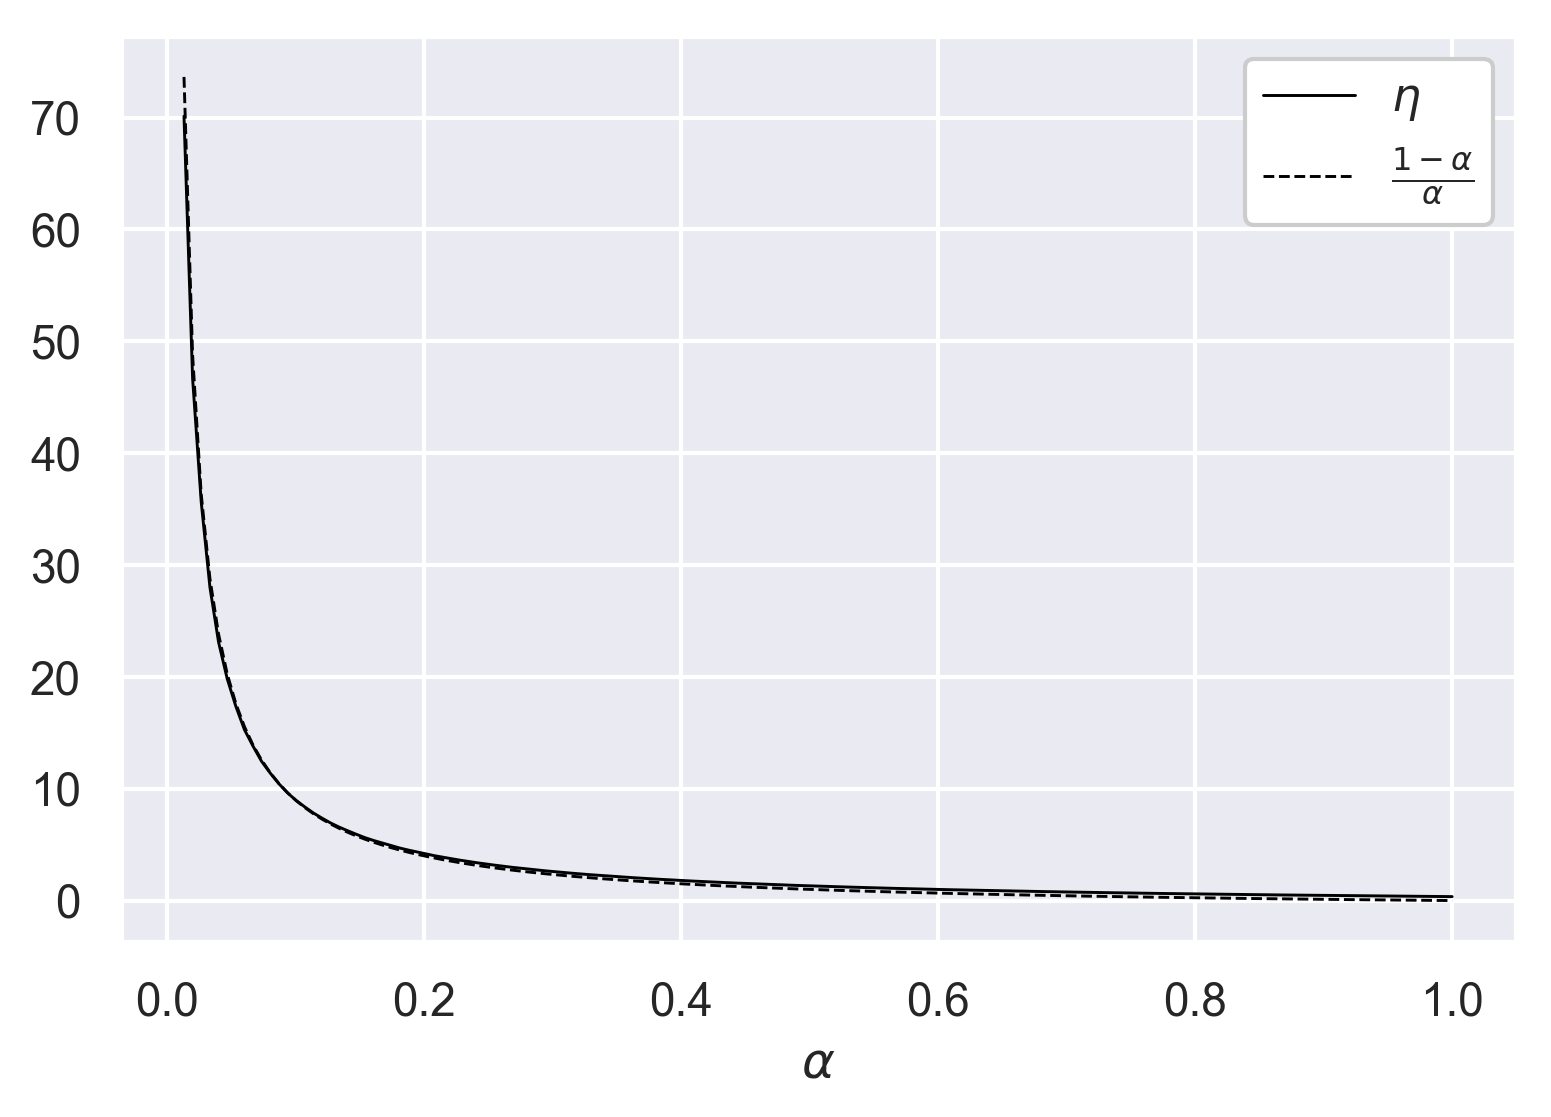

In [14]:
dot_label = "Sampled Points"


#plt.plot(gap_widths, cvar_for_holes, '.', c="firebrick", label=dot_label)
plt.plot(
    gap_widths,
    c_acc_coef_sfocus,
    color="black", 
    lw=0.7, 
    label=r"$\eta$"
)

#plt.axvline(0.278, label="Wall Height > Bump", ls="--", lw=0.8)    
dot_label = "_nolegend_"
gaps_ = np.array(gaps_for_holes)
g_ = gap_widths**(4)/((gaps_*k_))

plt.plot(
    gap_widths,
    (1-gap_widths)/(gap_widths),
    color="black",
    label=r"$\frac{1-\alpha}{\alpha}$",
    ls="--",
    lw=0.7
)

    
plt.xlabel(r"$\alpha$")
#plt.ylabel("Accomodation Coefficient")   
#plt.title("Focusing bumps with flat component")
plt.legend(loc='top right', facecolor="white", framealpha=1) #bbox_to_anchor=(1, 0.5))
plt.savefig(filename=img_path_+"semicirclefocus_varchannel.eps", bbox_inches='tight')
plt.show()

## Both Variance and Spectral Gap

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Distance between bumps, h')
ax1.set_ylabel('Spectral Gap')

ax1.plot(
    gap_widths,
    gaps_for_holes,
    color="black",
    label="Spectral Gap"
)
ax1.tick_params(axis='y', labelcolor="black")
ax1.legend(loc='center left')



ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.grid(False)

color = 'tab:blue'
ax2.set_ylabel('Variance')  # we already handled the x-label with ax1
ax2.plot(
    gap_widths,
    acc_coef_semicirclefocus,
    color="black", 
    ls="-.",
    label="Variance"
)
ax2.tick_params(axis='y', labelcolor="black")
ax2.legend(loc='center right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.title("Spectral gap and variance for the semicircle family")

plt.show()

# Bumps from Paper

In [4]:
P_stacks = np.load(paper_family + "p_mats.npy", allow_pickle=False)
params = np.load(paper_family + "keys.npy", allow_pickle=False)
theta_partition = np.load(paper_family + "theta_partition.npy", allow_pickle=False)

In [5]:
p_heights_ = params[:,0]

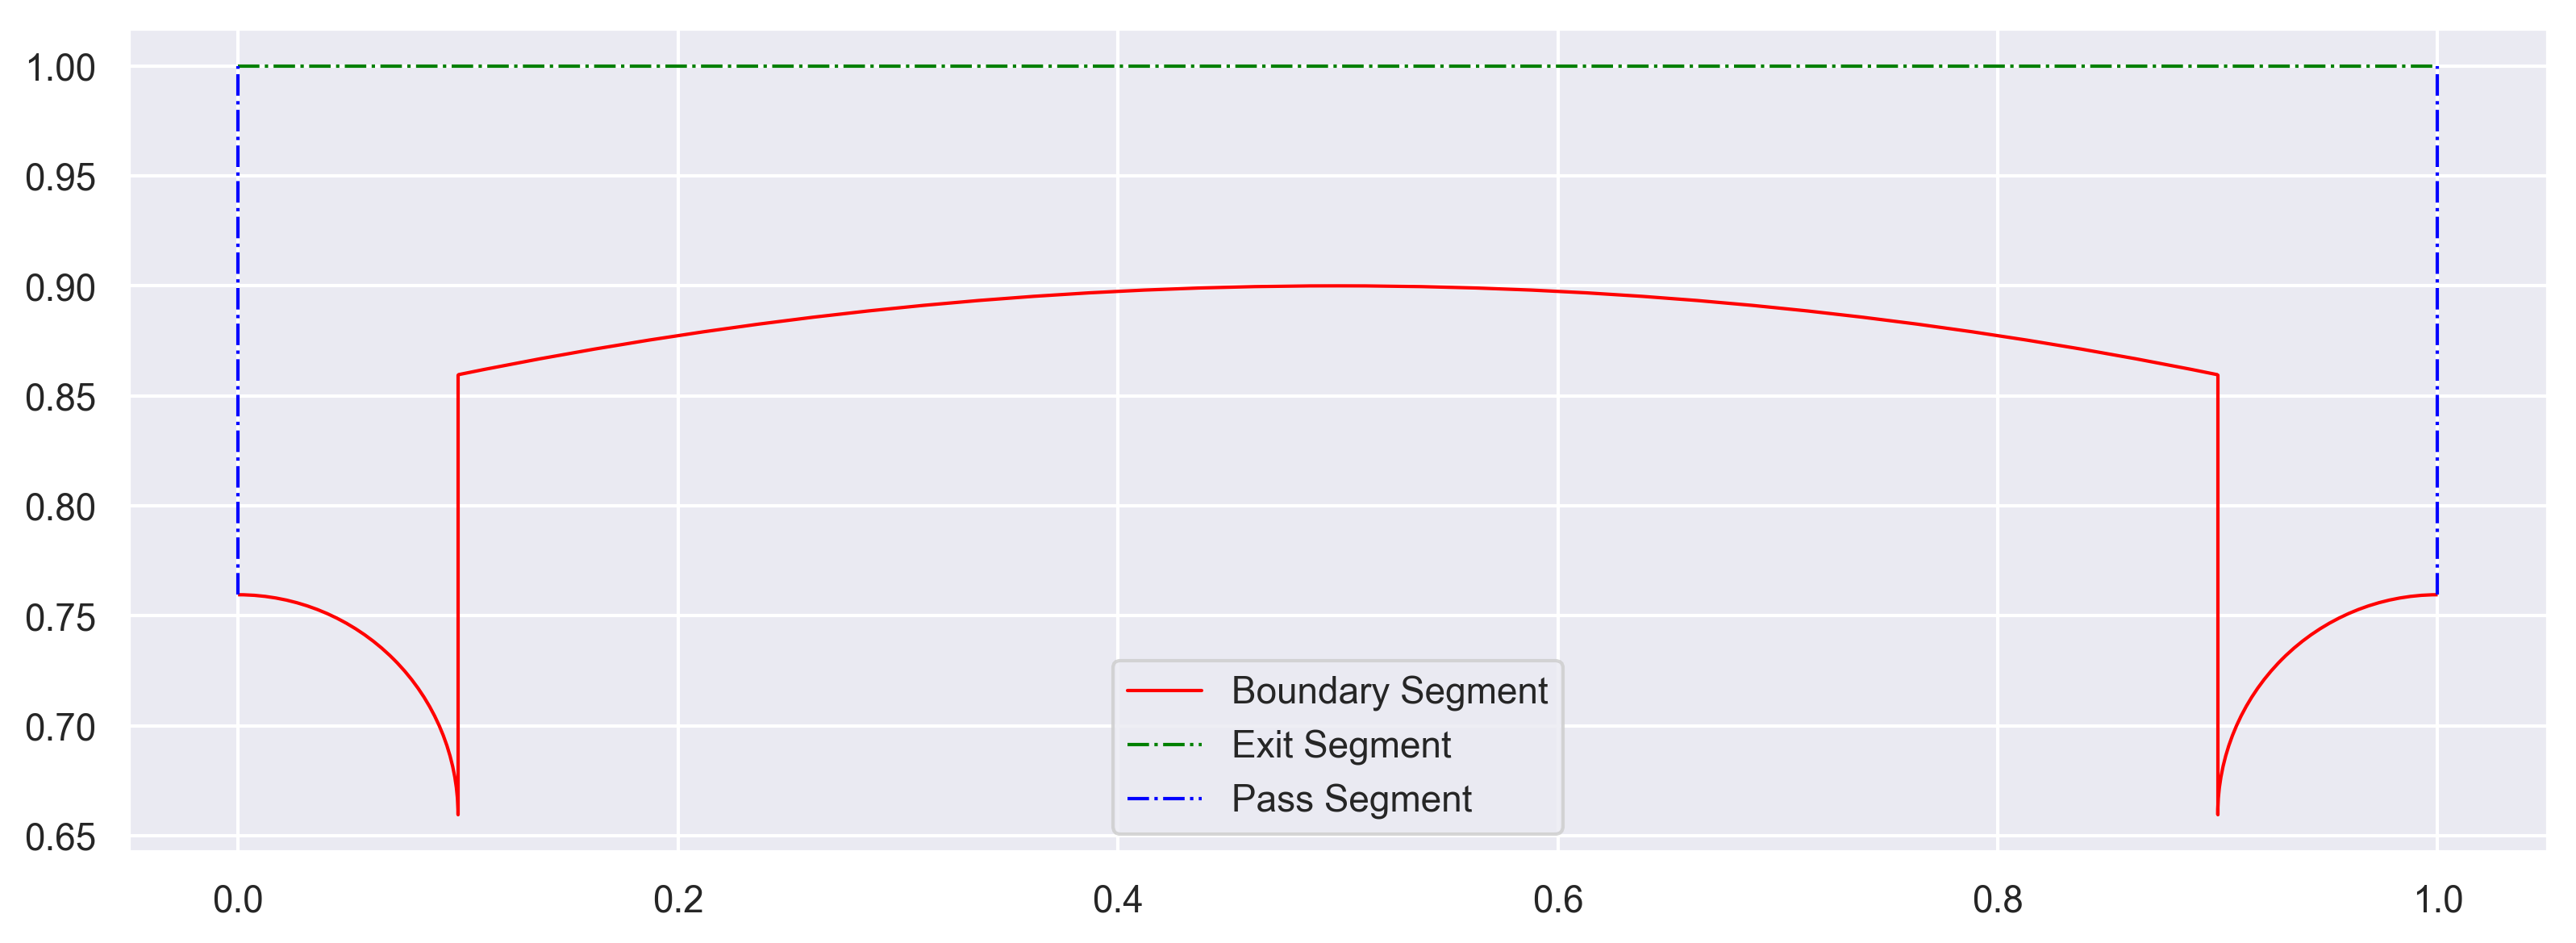

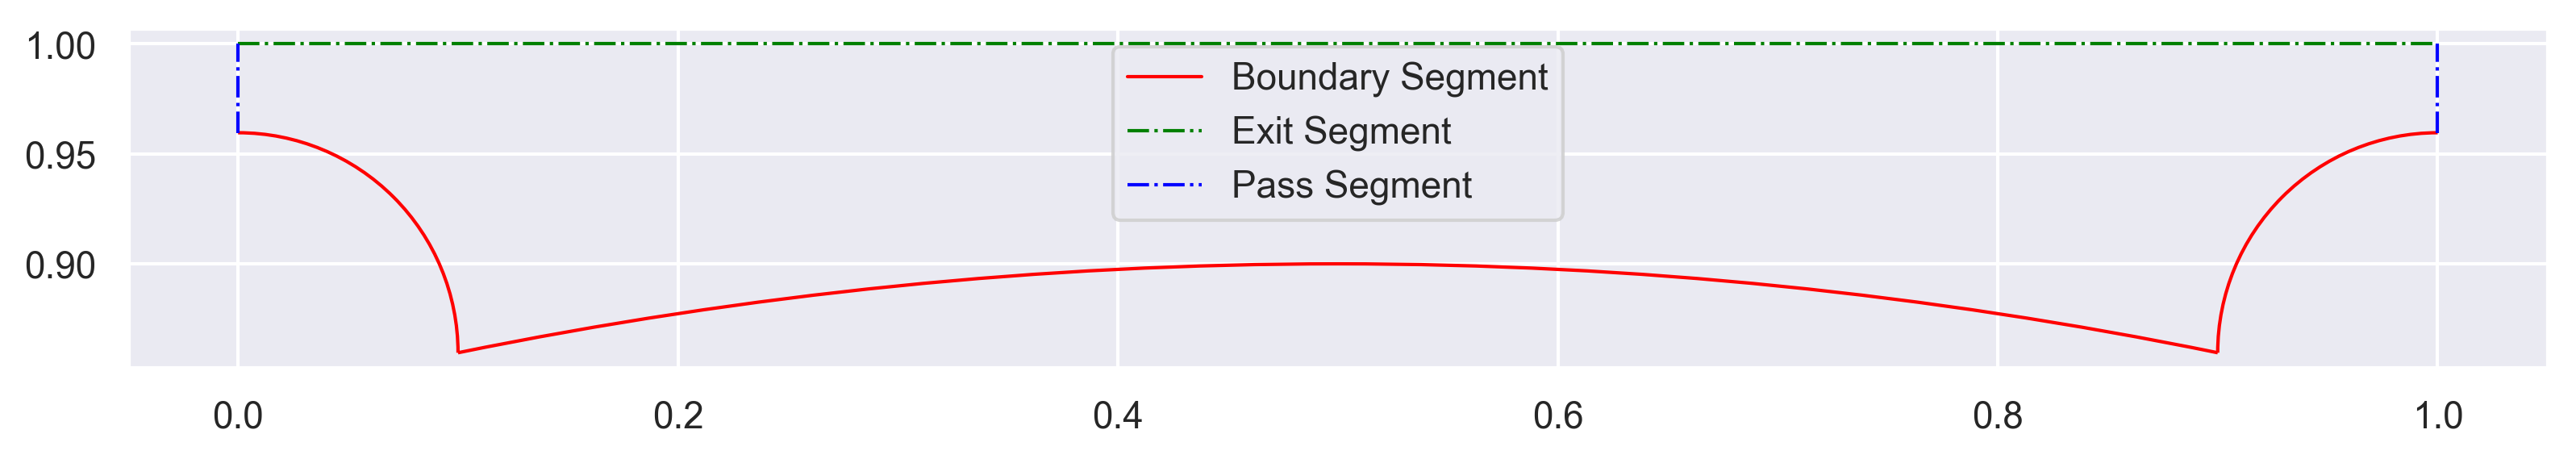

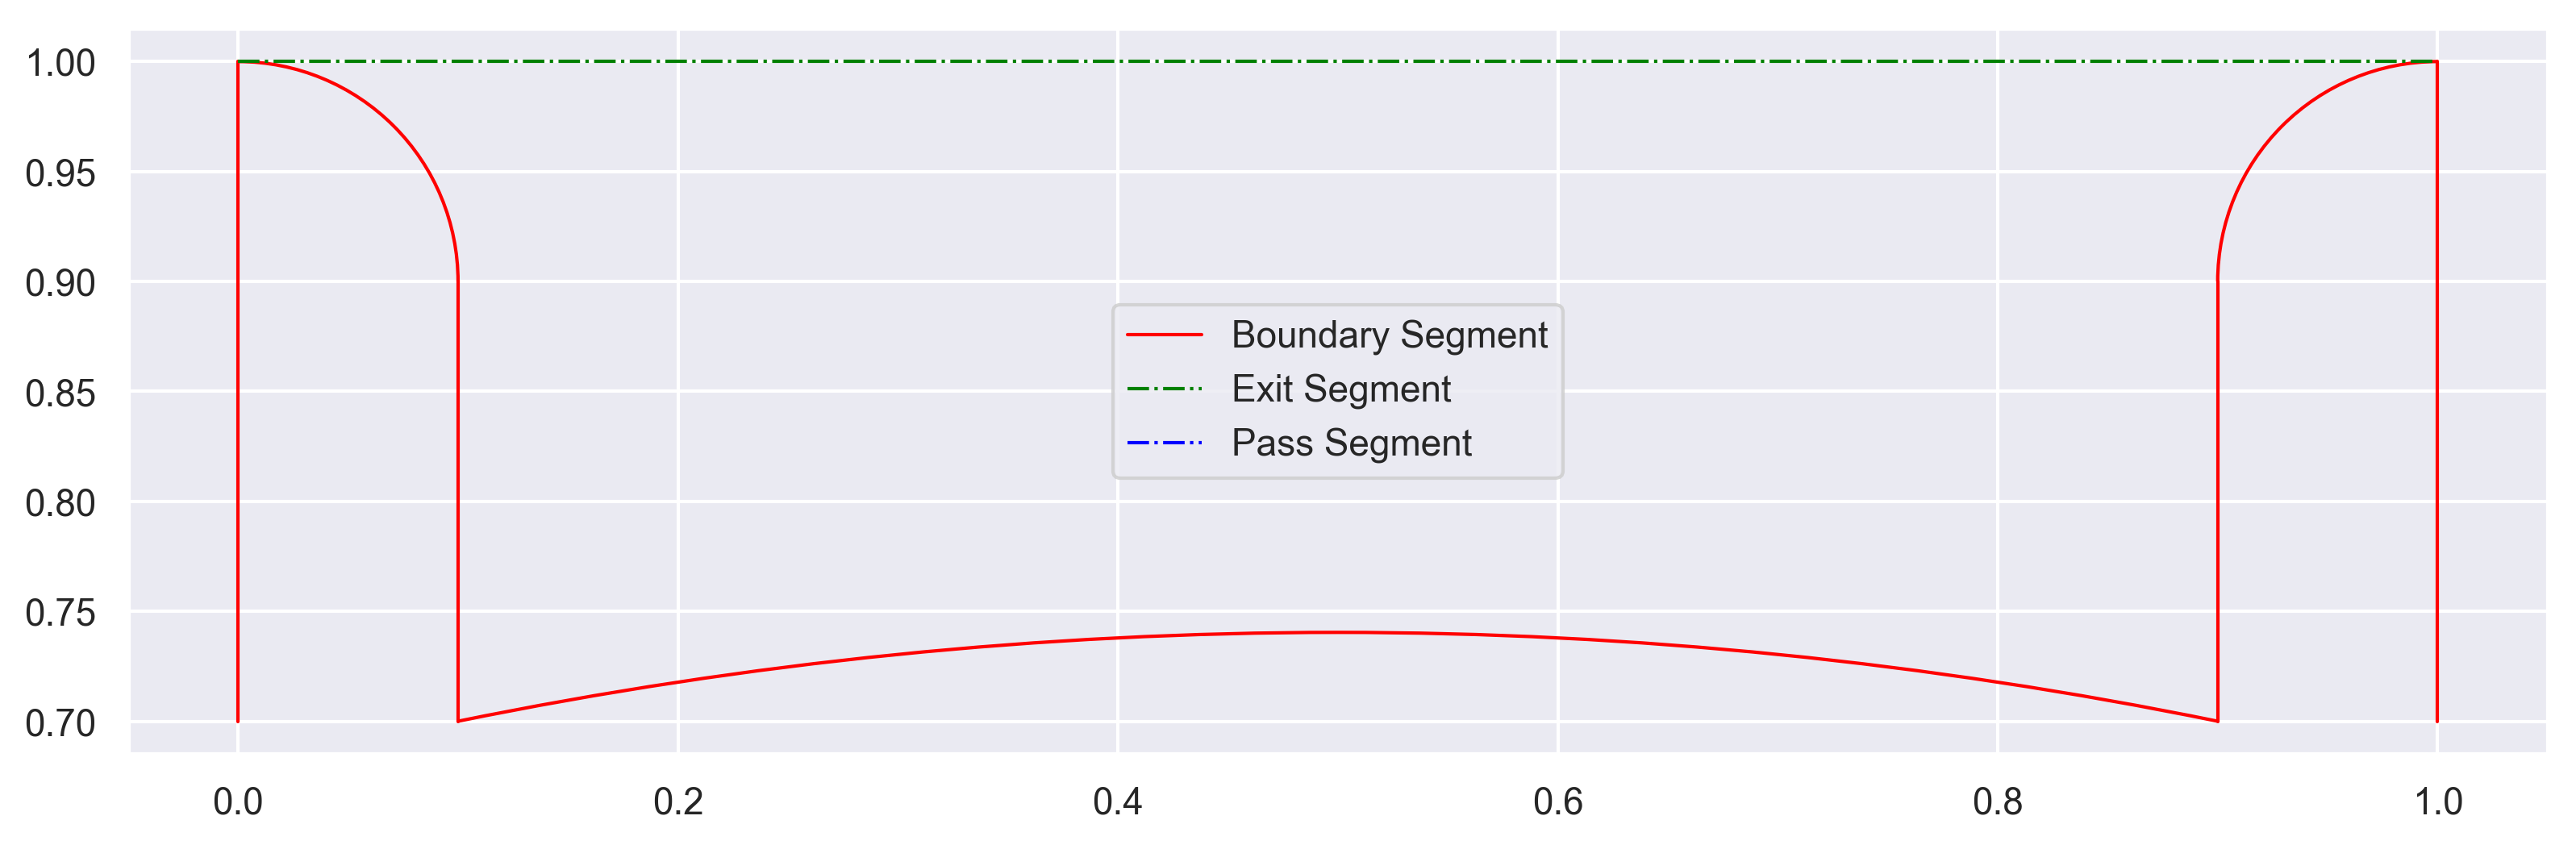

In [6]:
for h_ in [-0.2, 0, 0.2]:
    gbc.plot_segments(gbc.arc_with_arc_walls(
        radius_=2,
        width_=0.1,
        height_=h_))

In [6]:
svar_for_bfp, cvar_for_bfp, gaps_for_bfp = [], [], []
for P in P_stacks:
    # compute the variance
    svar_ = gbc.var_from_P(P_=P, angle_bins_=theta_partition, observable_f=sph_obs)
    cvar_ = gbc.var_from_P(P_=P, angle_bins_=theta_partition,
                       observable_f=lambda x: cha_obs(x, cut=7, rad=1/2))

    # compute the spectral gap
    spectrum = np.sort(np.real(np.linalg.eigvals(P)))
    second_eig = spectrum[-2]

    # write to array
    svar_for_bfp.append(svar_)
    cvar_for_bfp.append(cvar_)
    gaps_for_bfp.append(1-second_eig)

In [7]:
acc_coeff_2curves = np.array(svar_for_bfp[::-1])/(np.pi**2-8)
acc_coeff_2curves_ch = np.array(cvar_for_bfp[::-1])/knudsen_channel

## Spectral Gap

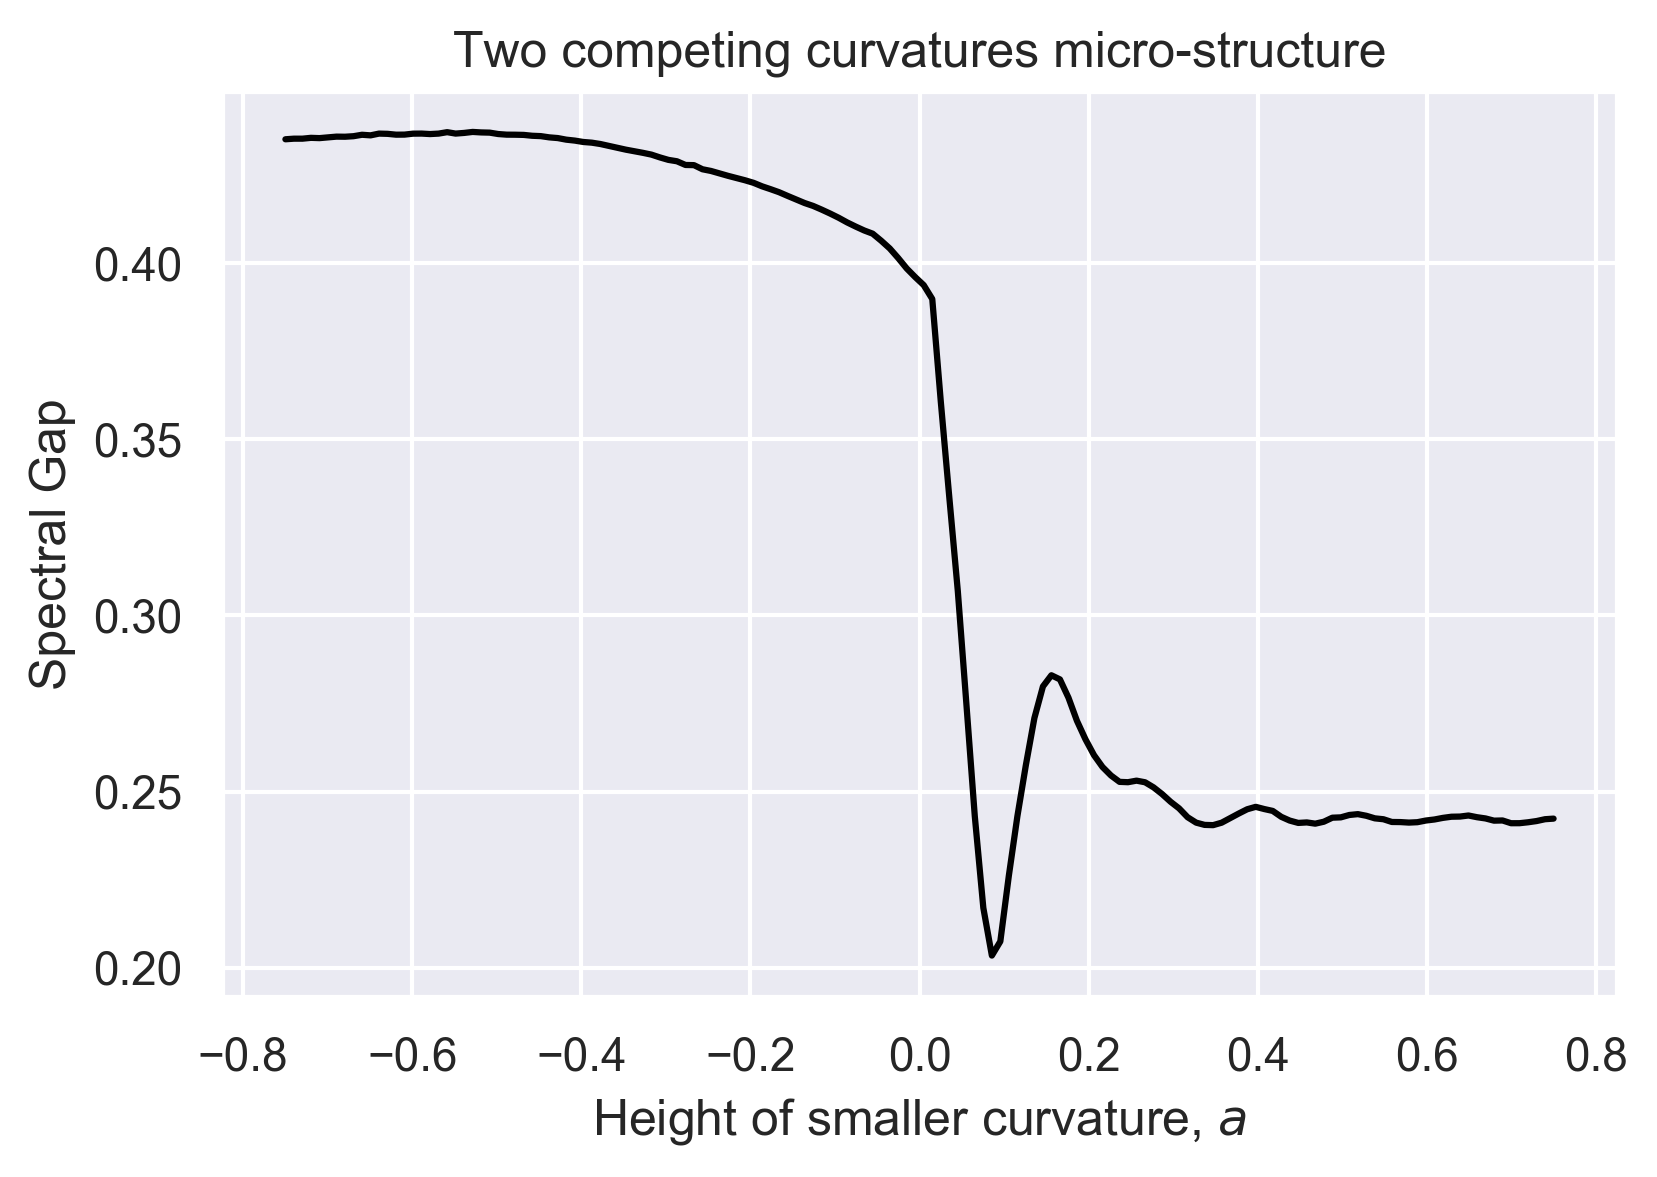

In [8]:
dot_label = "Sampled Points"

#plt.plot(p_heights_, gaps_for_bfp[::-1], '.', c="firebrick", label=dot_label)
plt.plot(p_heights_, gaps_for_bfp[::-1], color="black")

#plt.xl(p_heights_[::-1])
#plt.axvline(0.278, label="Wall Height > Bump", ls="--", lw=0.8)

plt.xlabel(r"Height of smaller curvature, $a$")
plt.ylabel("Spectral Gap")    
    
plt.title("Two competing curvatures micro-structure")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(filename=img_path_+"two_curves_spectralgap.eps", bbox_inches='tight')
plt.show()

## Variance: channel observable

The observable is 
    $$f(x, r, c)=2r\cot(x),$$
where $r$ is the radius of the channel and $c$ is the maximum distance we cut. Here we take $r=1/2$ and $c=7$. 

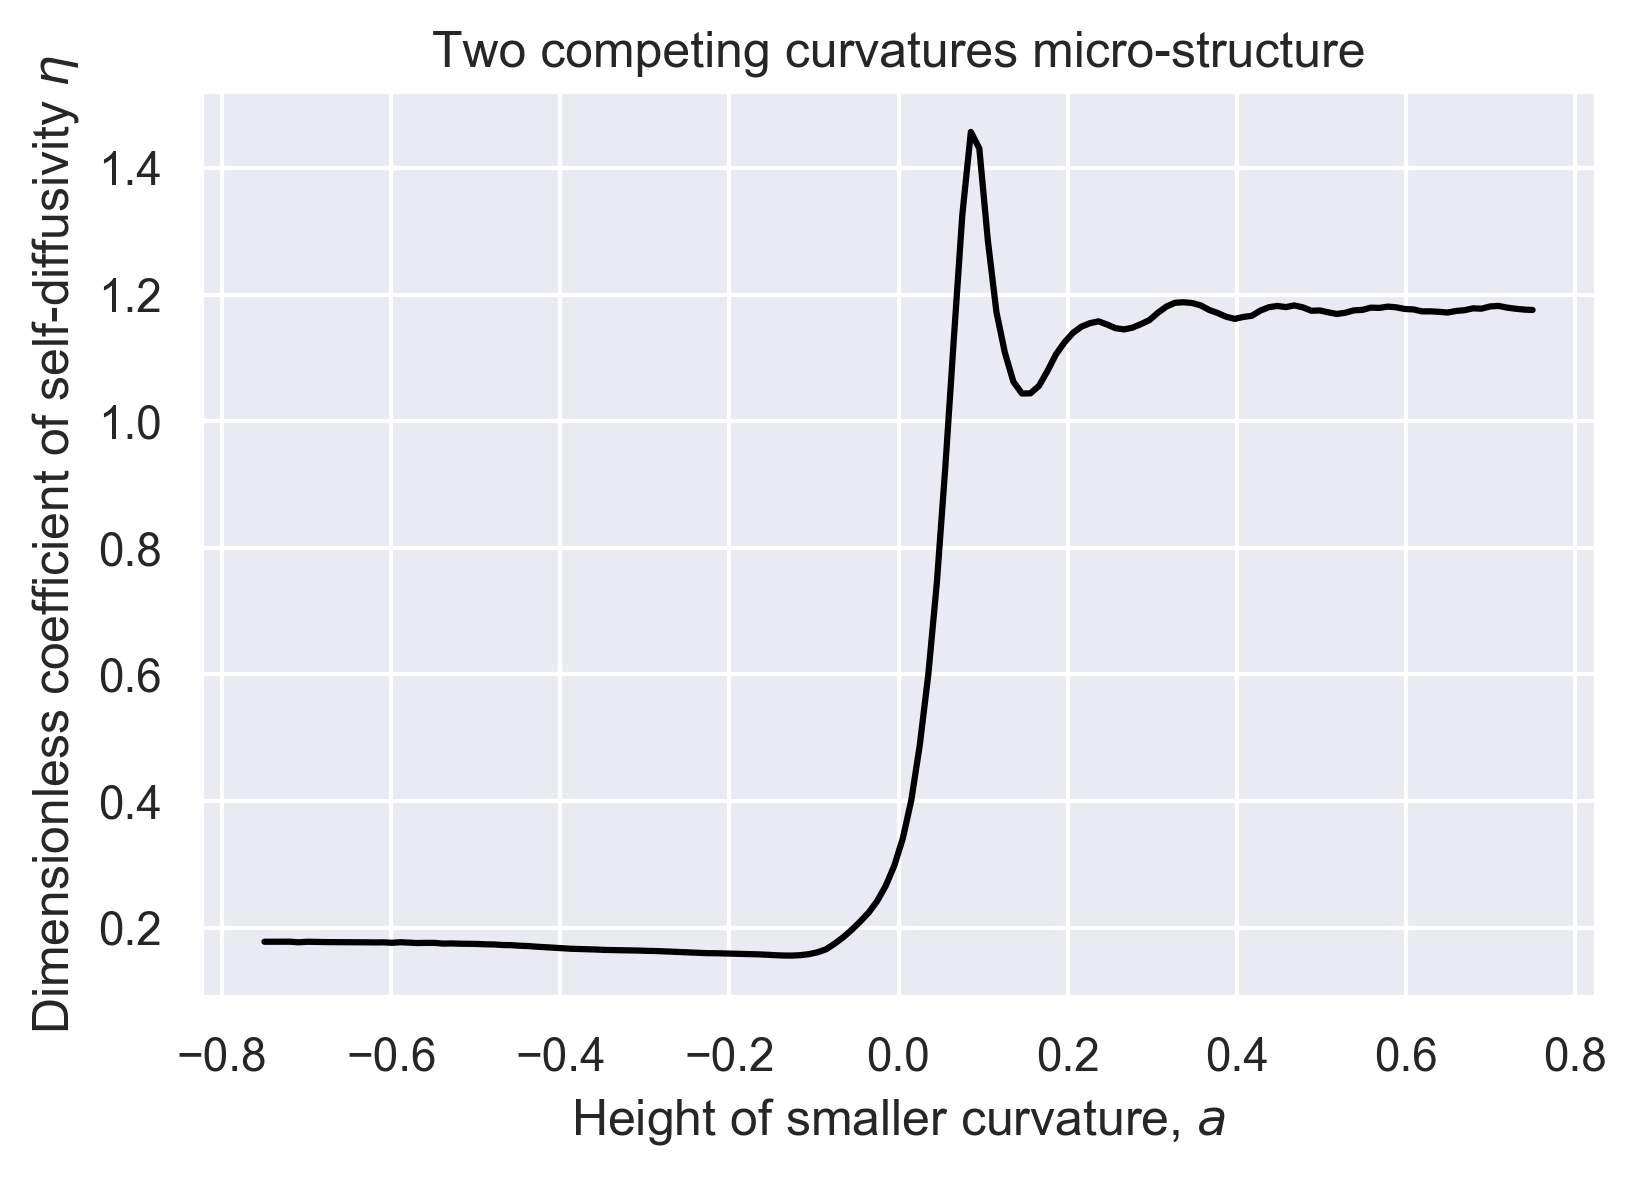

In [9]:
dot_label = "Sampled Points"


#plt.plot(p_heights_, svar_for_bfp[::-1], '.', c="firebrick", label=dot_label)
plt.plot(p_heights_, acc_coeff_2curves_ch, color="black")
#plt.axvline(0.278, label="Wall Height > Bump", ls="--", lw=0.8)    
dot_label = "_nolegend_"
    
plt.xlabel(r"Height of smaller curvature, $a$")
plt.ylabel(r"Dimensionless coefficient of self-diffusivity $\eta$")   
plt.title("Two competing curvatures micro-structure")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(filename=img_path_+"two_curves_varch.eps", bbox_inches='tight')
plt.show()

## Both Variance and Spectral Gap

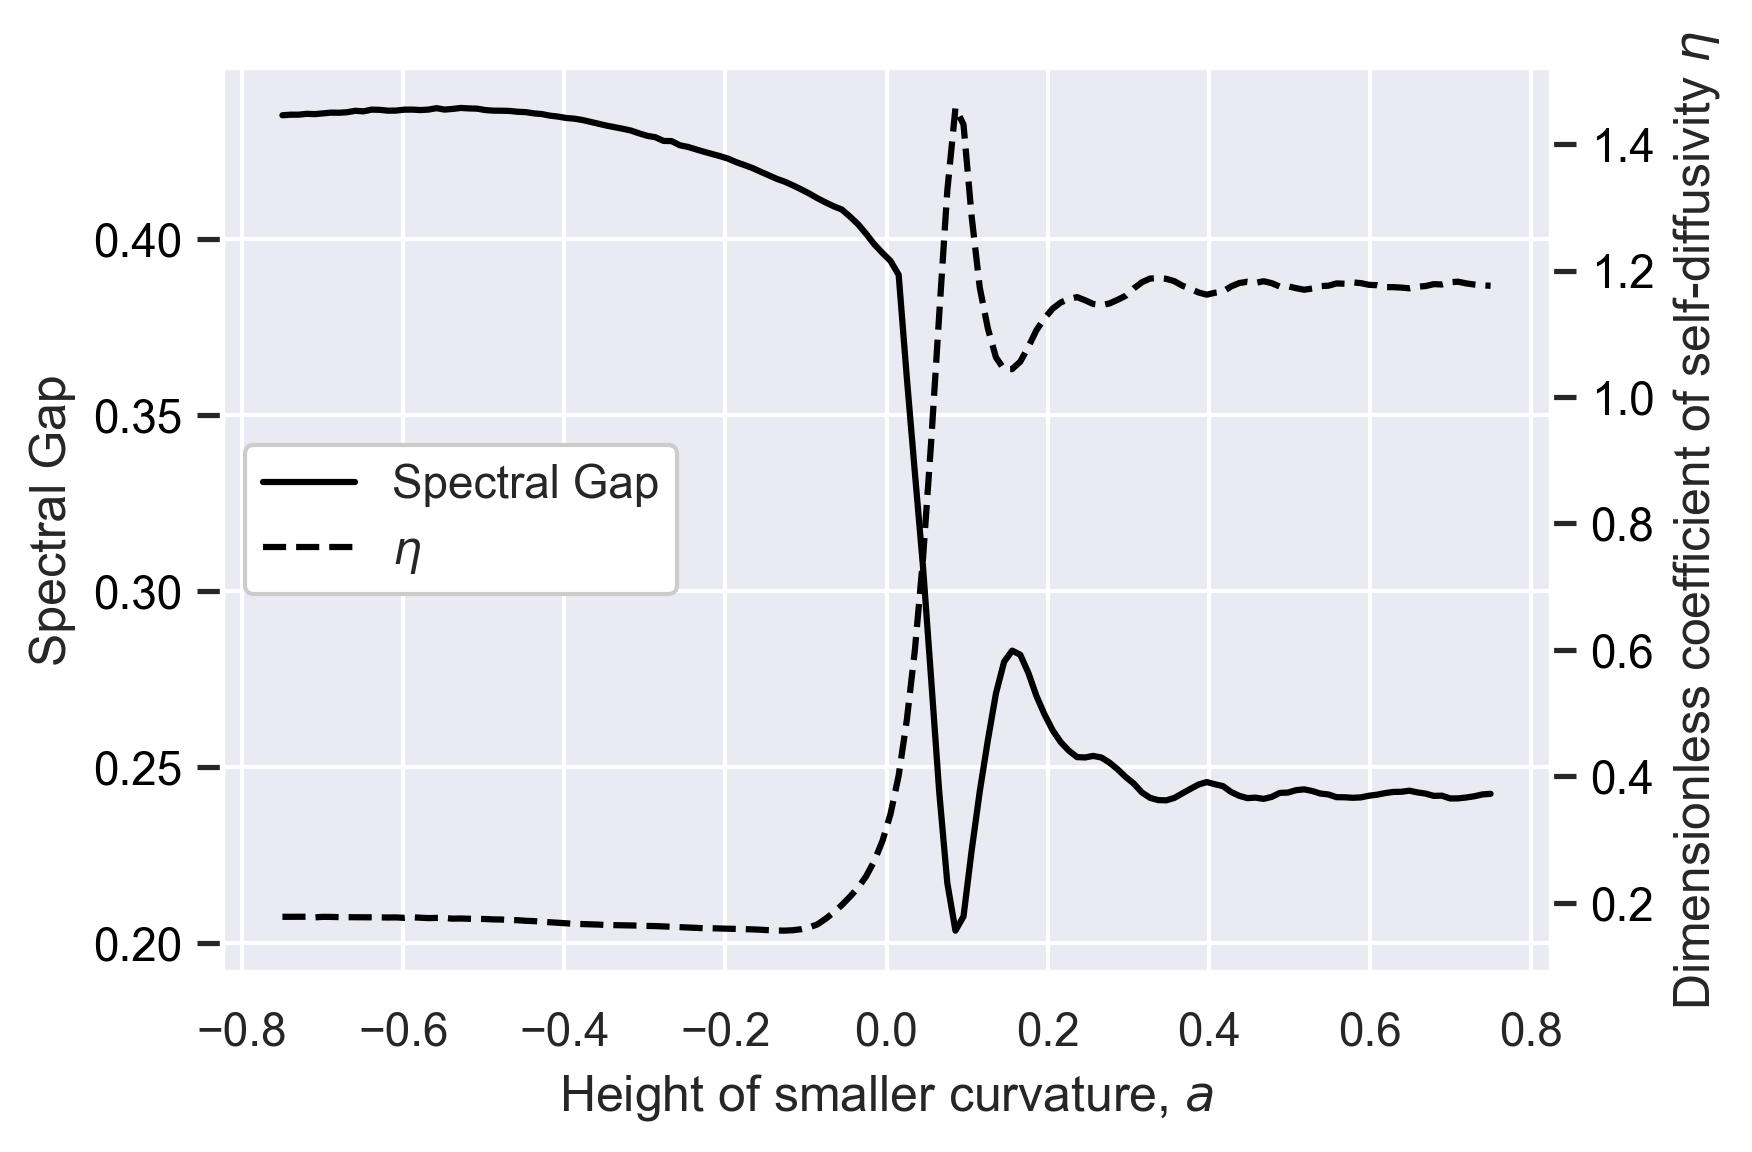

In [11]:
fig, ax1 = plt.subplots()

color = 'tab:red'

ax1.set_xlabel(r"Height of smaller curvature, $a$")
ax1.set_ylabel('Spectral Gap')

A1 = ax1.plot(
    p_heights_,
    gaps_for_bfp[::-1],
    color="black",
    label="Spectral Gap"
)
ax1.tick_params(axis='y', labelcolor="black")
ax1.legend(loc='center left')



ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.grid(False)

color = 'tab:blue'
ax2.set_ylabel(r'Dimensionless coefficient of self-diffusivity $\eta$')  # we already handled the x-label with ax1
A2 = ax2.plot(
    p_heights_,
    acc_coeff_2curves_ch,
    color="black", 
    ls="--",
    label=r"$\eta$"
)
ax2.tick_params(axis='y', labelcolor="black")
#ax2.legend(loc='center right')

# added these three lines
lns = A1+A2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='center left', facecolor='white', framealpha=1)


fig.tight_layout()  # otherwise the right y-label is slightly clipped

#plt.title(r"Spectral gap and $\eta$ for the two curvature family")

plt.savefig(filename=img_path_+"two_curves_both.eps", bbox_inches='tight')
plt.show()